### Lab2: In this lab we will calculate the bias and variance for different prediction models and determine the best model for a synthetic dataset


#### Usefull imports

In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
import numpy as np 
import random 
import pickle 
import pandas as pd
import matplotlib.pyplot as plt


#### Some global variables that can be used to check specific outputs

In [4]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the graphs

## STEP 1: LOADING THE DATASET AND VISUALISING IT

## Load the dataset

Here we load the data_set from data.pkl file. The dataset contains pairs of points <x,y>.

In [5]:
#TODO: read dataset (data.pkl) using pandas.read_pickle. Note: this command will return a numpy array 
data_set = pd.read_pickle('data.pkl')
#TODO: print the size of the dataset i.e the length of the numpy array
data_set_size =  data_set.shape
print(data_set_size )


#if we print the type we will find it as a numpy array cause read_pickle does not convert it to pandas data frame.
#print(type(data_set))



(5000, 2)


In [6]:
if(debug==1):
    #TODO: print the first 5 elements of the dataset 
    print(data_set[:5,:])
    

[[0.00000000e+00 2.00000000e+00]
 [1.00000000e-03 2.02599961e+00]
 [2.00000000e-03 2.05199691e+00]
 [3.00000000e-03 2.07798956e+00]
 [4.00000000e-03 2.10397524e+00]]


## Split The Dataset Into X and Y

Here we split the <x,y> pairs into x and y separate arrays

In [7]:
#TODO: store x and y in seperate arrays
x = data_set[:,0]
y = data_set[:,1]
# x.shape
# y.shape

In [8]:
if(debug==1):
    #TODO: print the first 5 elements of x and y
    print("X: ", x[:5])
    print("Y: ",y[:5])

X:  [0.    0.001 0.002 0.003 0.004]
Y:  [2.         2.02599961 2.05199691 2.07798956 2.10397524]


## Graphing the given dataset

Here we plot the given dataset, just to get the feel of the dataset provided.

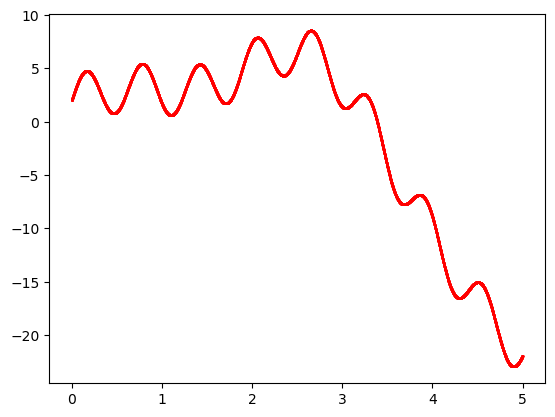

In [9]:
#TODO: plot the dataset
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=2)
plt.show()

## STEP 2: RESAMPLING DATA SETS

### Split The Dataset Into Testing And Training Datasets

This line splits the dataset into the testing and training datasets in the ratio 1:9

In [10]:
#TODO: split the dataset into training set and testing set with ratio 9:1 using tran_test_split function while shuffling the dataset Note: set random_state = 3
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1, random_state=3)
#TODO: save the size of the training and testing sets 
test_data_size = len(xTest)
train_data_size = len(xTrain)
print(type(yTest.shape))

<class 'tuple'>


In [11]:
if(debug==1):
    #TODO: print the size of the training and testing sets
    print(test_data_size)
    print(train_data_size)

500
4500


## Split The Training Dataset Into 10 Different Training Datasets

Here, we run a loop 10 times and store the train dataset values from start_in to the end_in as a numpy array in a list (X_train_data_sets and Y_train_data_sets), and update the values of start_in and end_in in each iteration of the loop.

In [12]:
X_train_data_sets = list()
Y_train_data_sets = list()
start_in = 0
train_data_sets_size = int(train_data_size/10)
end_in = train_data_sets_size
for i in range(10):
    #TODO: Append xTrain data from start index to end index to X_train_data_sets
    X_train_data_sets.append(xTrain[start_in:end_in])
    #TODO: Append yTrain data from start index to end index to y_train_data_sets
    Y_train_data_sets.append(yTrain[start_in:end_in])
    #TODO: Update the start index and the end index to start from where the last dataset finished
    start_in = end_in
    end_in += train_data_sets_size

In [13]:
if(debug==1):
    #TODO: Print the size of the splitted datasets Hint: all of them have the same size 
    print(train_data_sets_size)

450


### Graphing Each Of The Training Datasets

Here we graph each of the training datasets separately. (to check if the datasets are sampled properly)

Training set  0


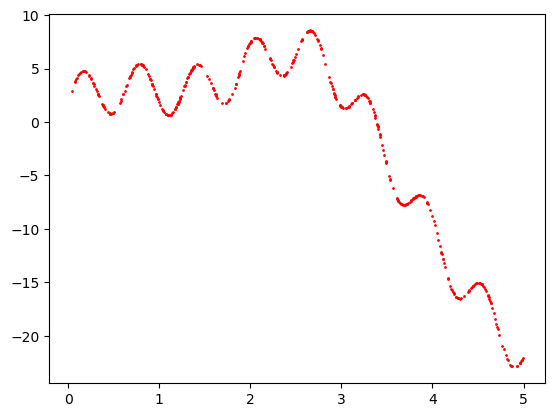

Training set  1


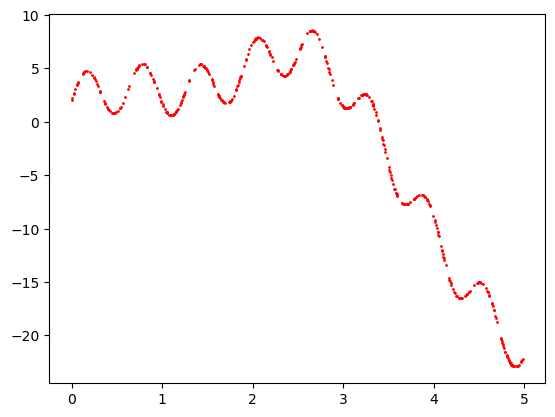

Training set  2


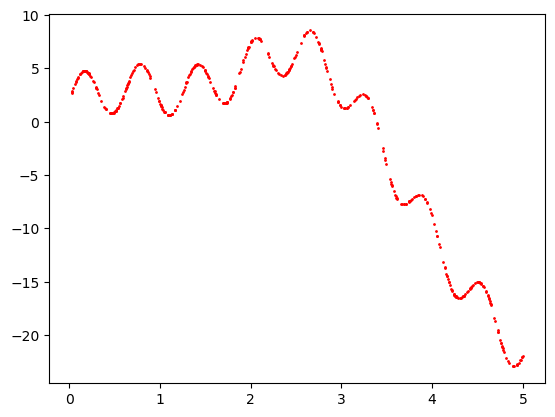

Training set  3


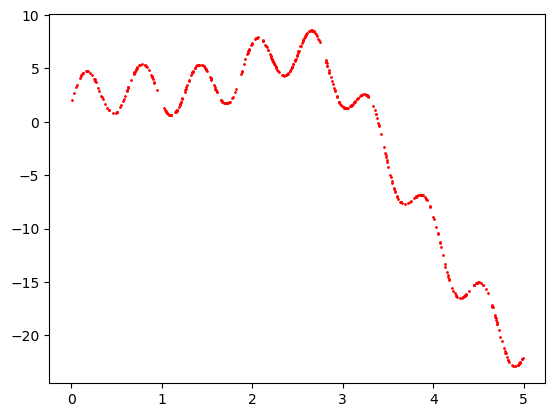

Training set  4


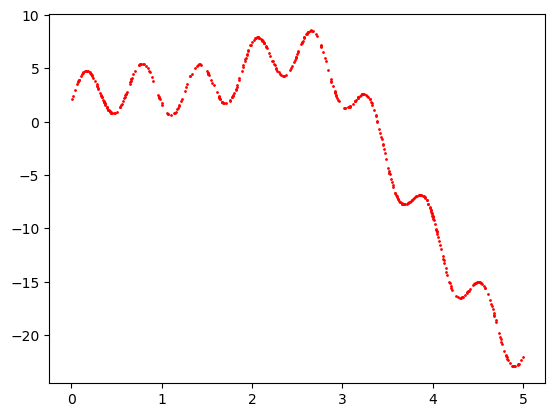

Training set  5


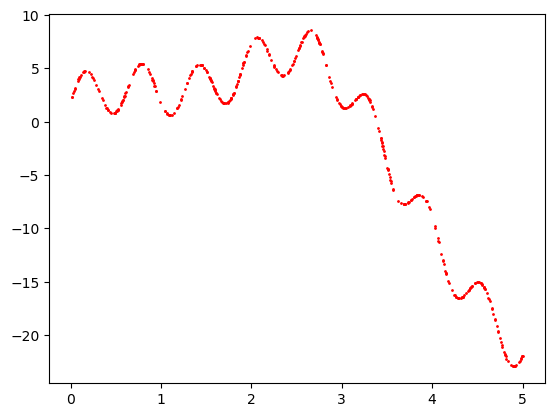

Training set  6


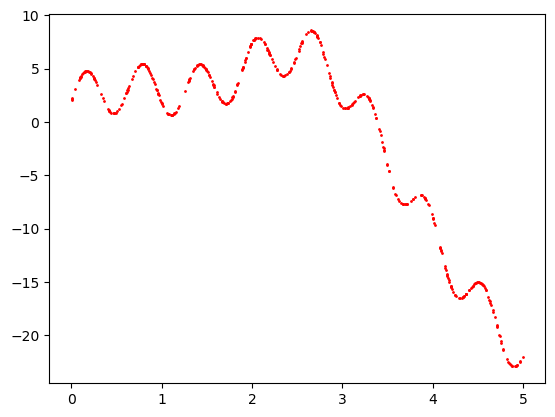

Training set  7


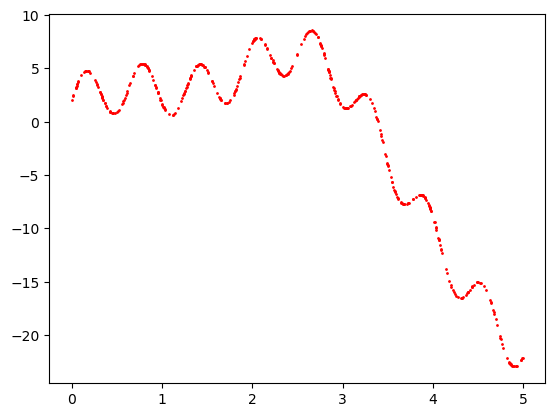

Training set  8


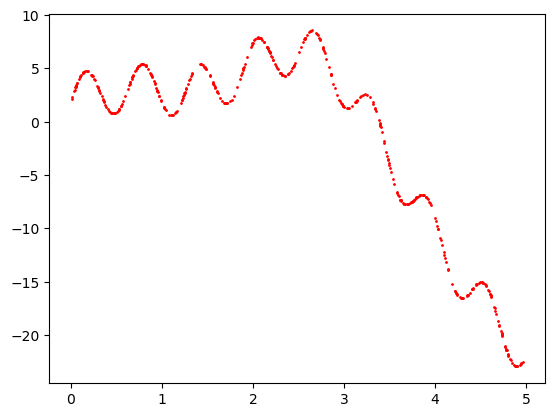

Training set  9


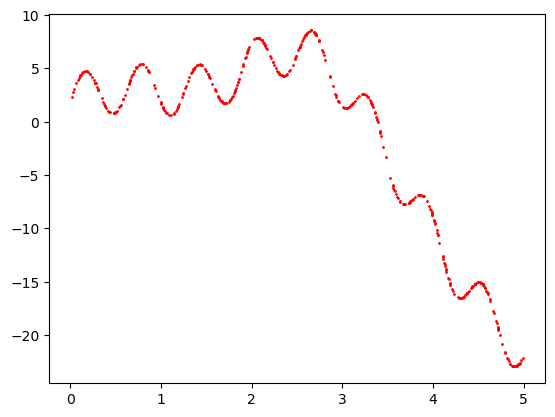

In [14]:
if(debug==1):
    for i in range(10):
        print("Training set ",i)
        fig = plt.figure()
        #TODO plot the current dataset, use red dots and markersize = 2
        plt.plot(X_train_data_sets[i], Y_train_data_sets[i], 'r.', markersize=2)
        plt.show()

### STEP 3: TRAINING A MODEL

#### Plotting A Graph Of The Trained Polynomial Regression Model

Here, we take each of the training datasets, and plot the training dataset points and the values predicted by the model on the test dataset points, to visualise the provided data.
For each training set, 9 graphs are plotted, each corresponding to the model of each degree (from 0 to 9)

In [17]:
# this code just explain the line that we will use in the next cell that [:np.newaxis] converts the 1D array to a 2D array cause that is how sckiti_learn need it
# for i in range(10):
#     x = X_train_data_sets[i][:, np.newaxis]  # transposing it
#     print(x.shape)

TRAINING SET  0


<Figure size 640x480 with 0 Axes>

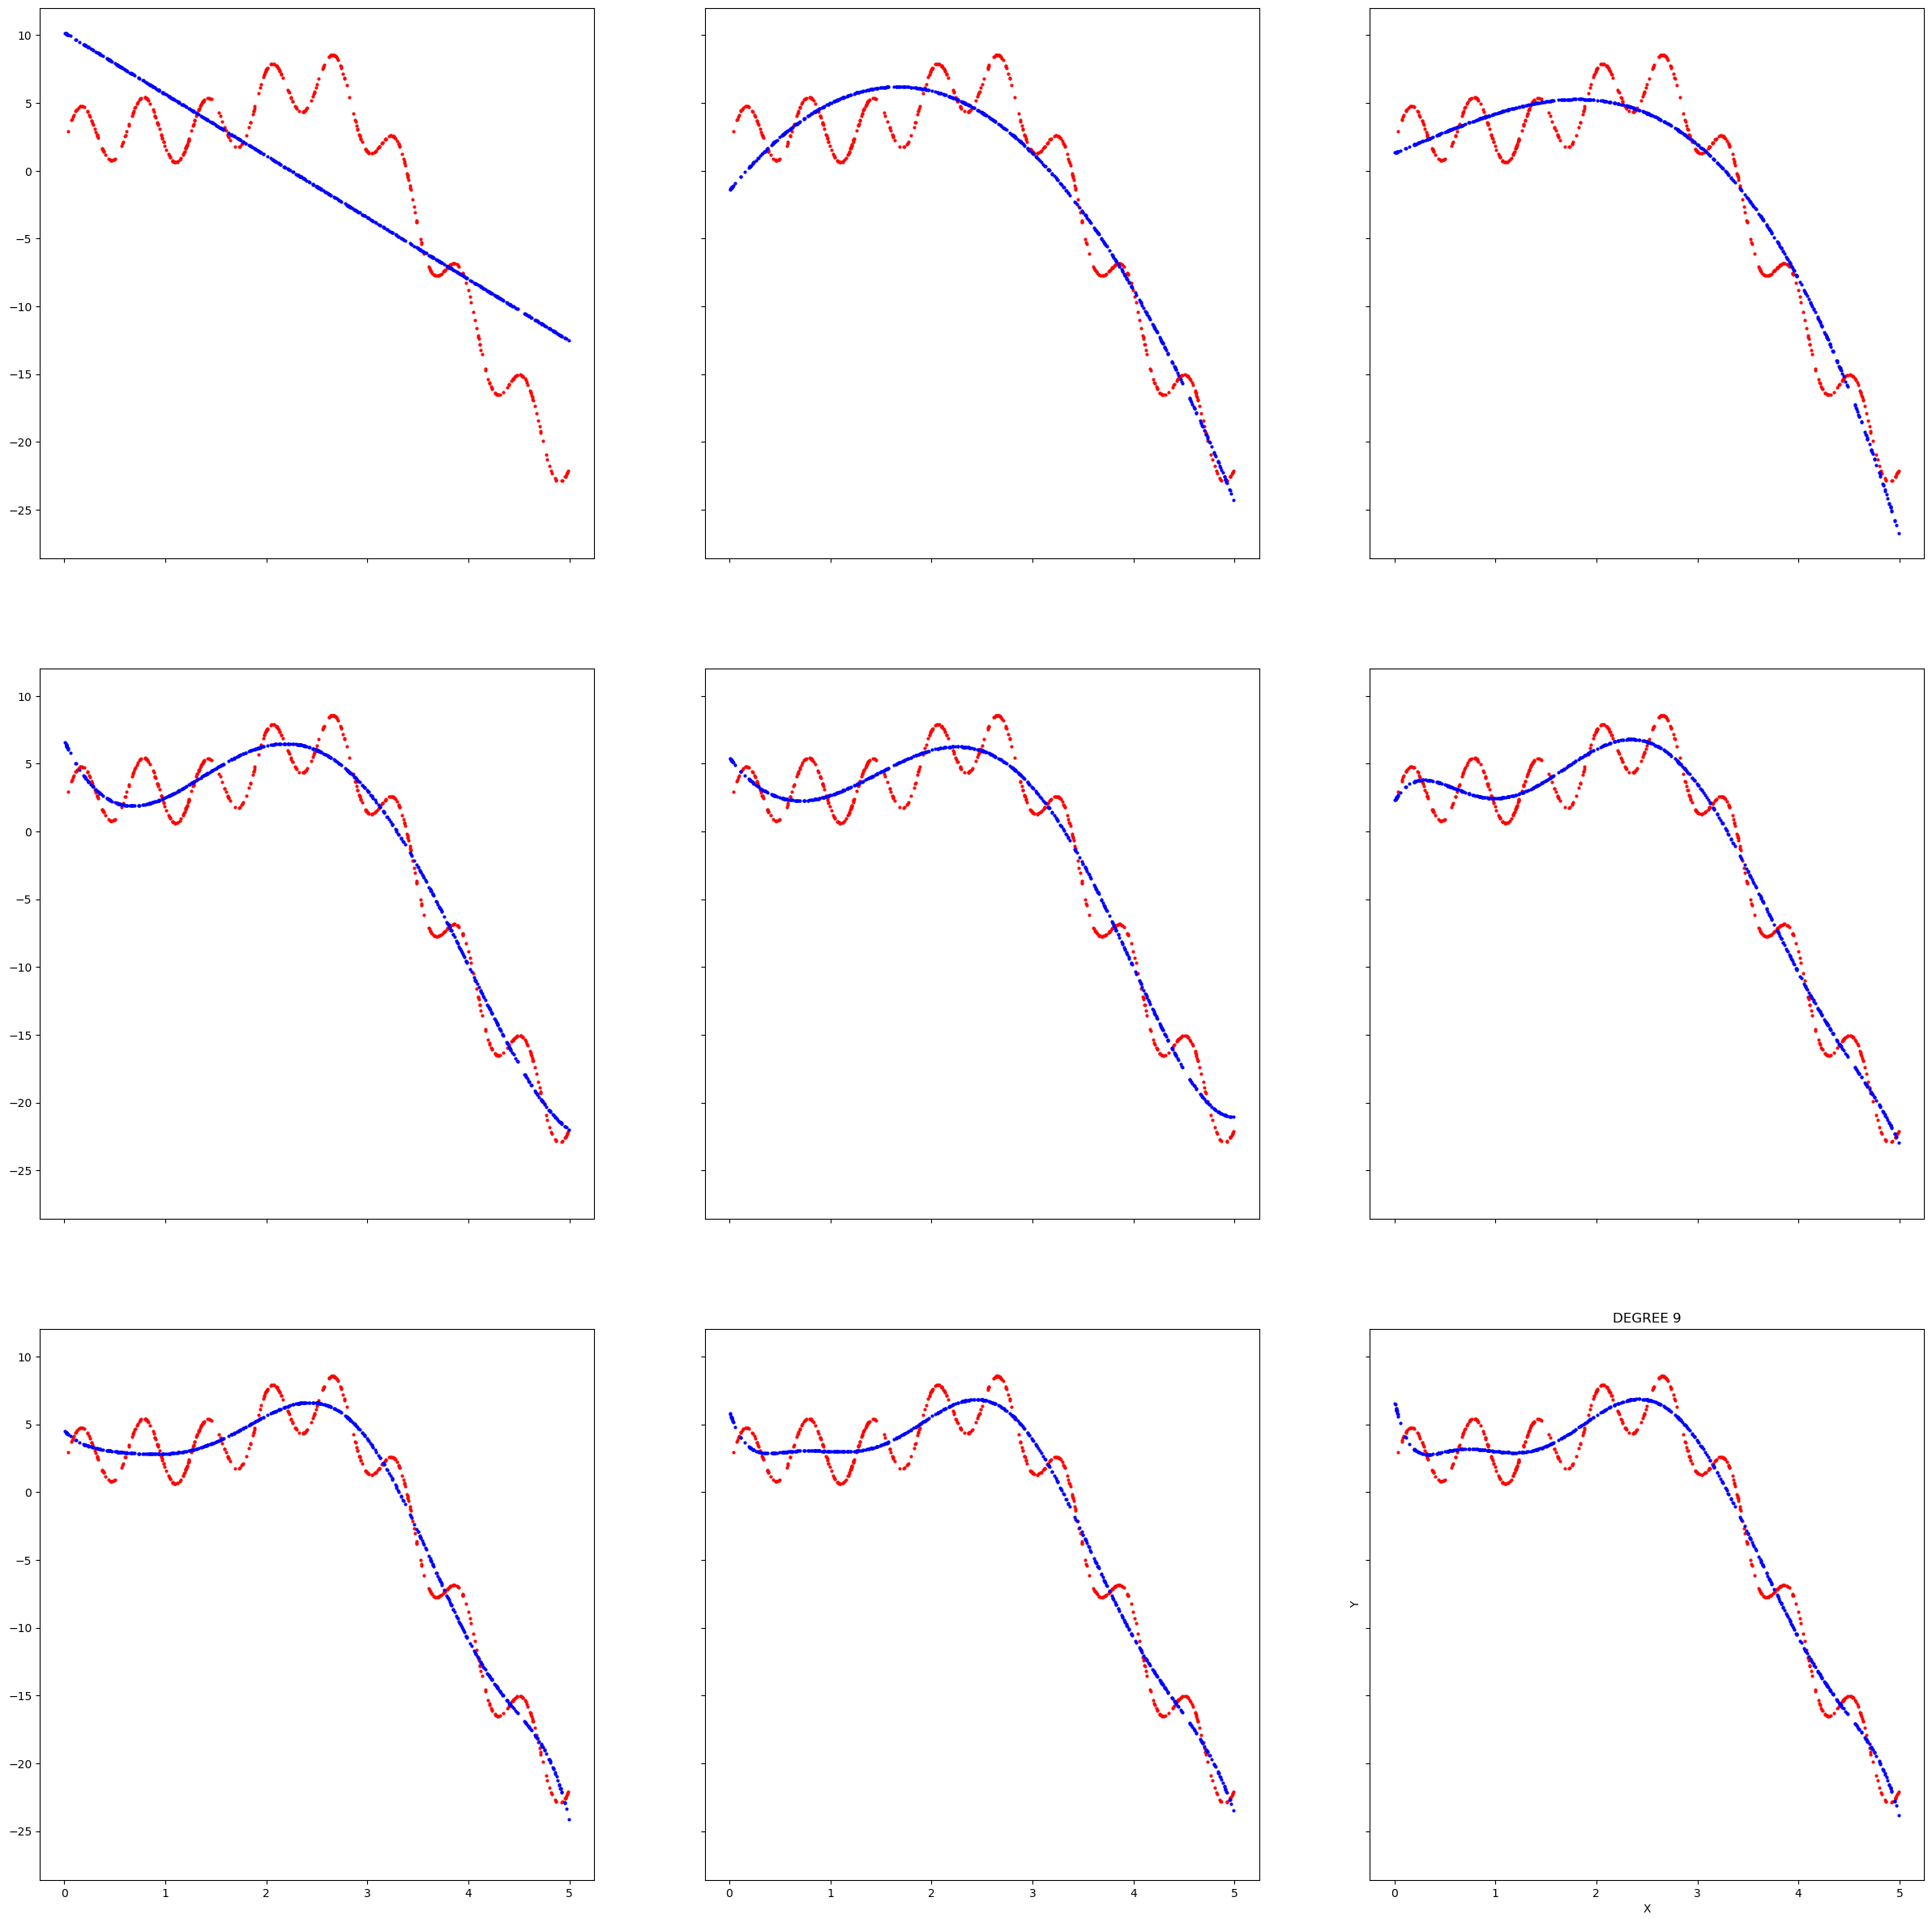

TRAINING SET  1


<Figure size 640x480 with 0 Axes>

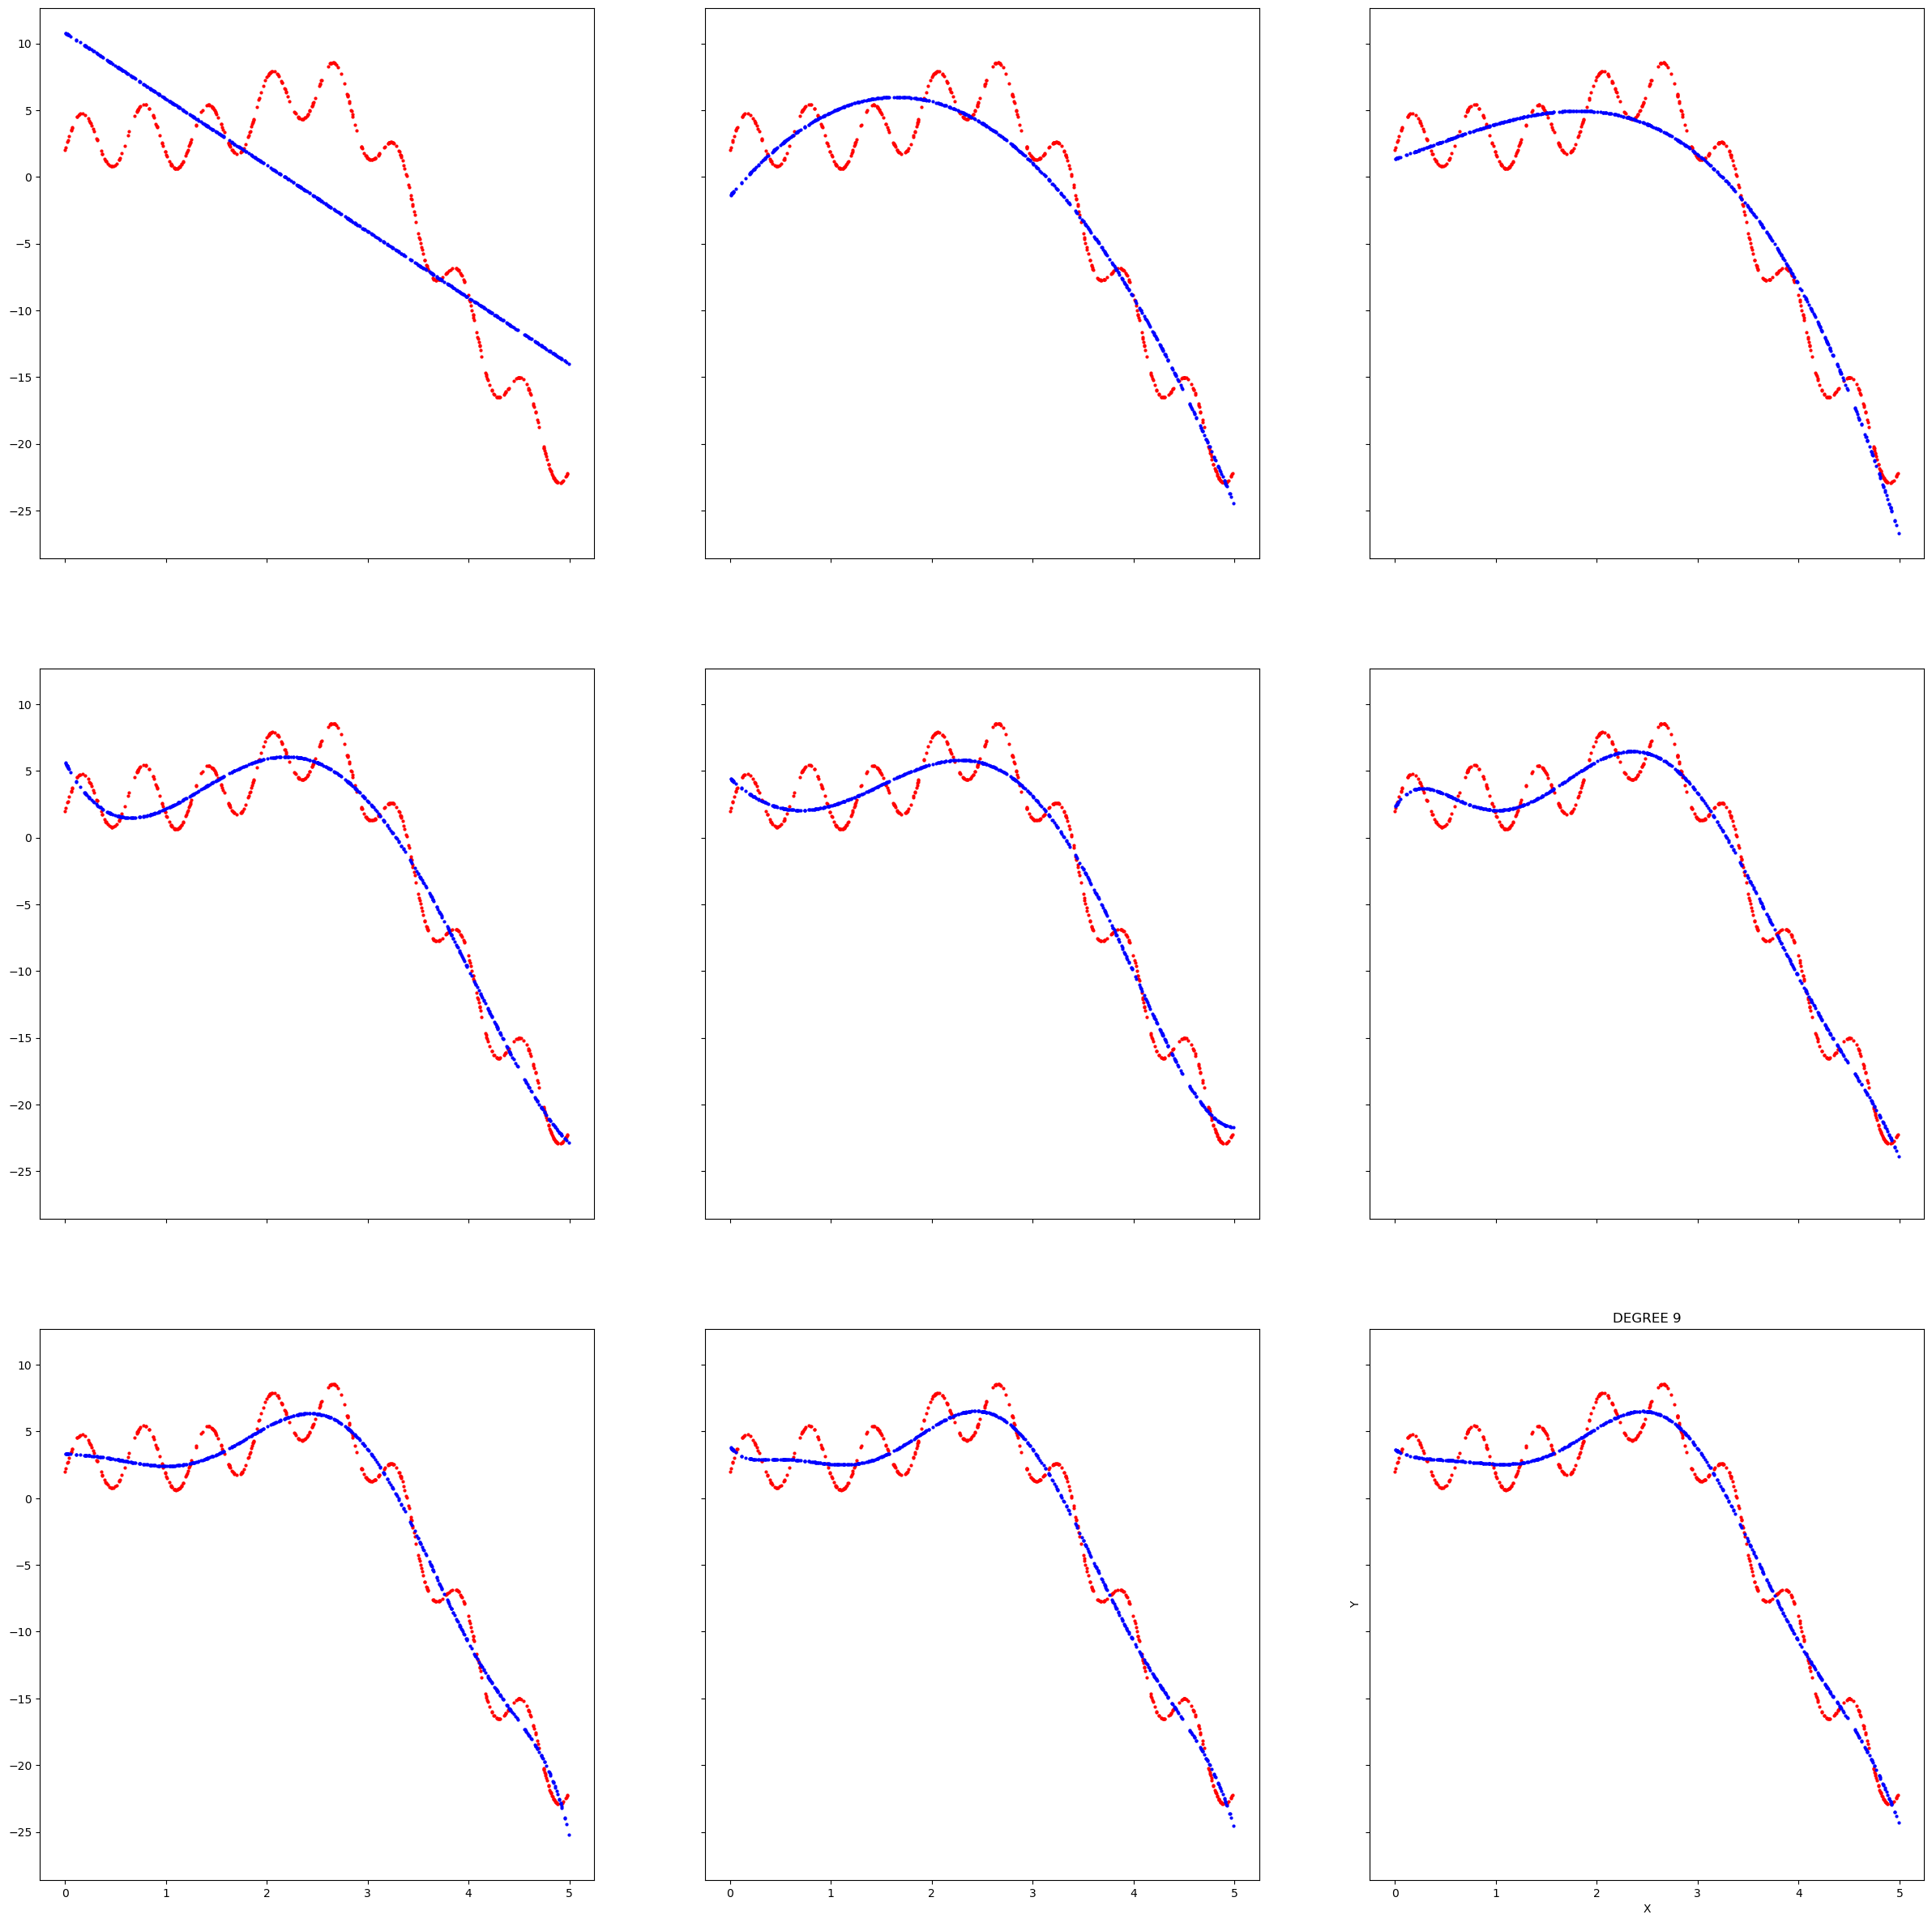

TRAINING SET  2


<Figure size 640x480 with 0 Axes>

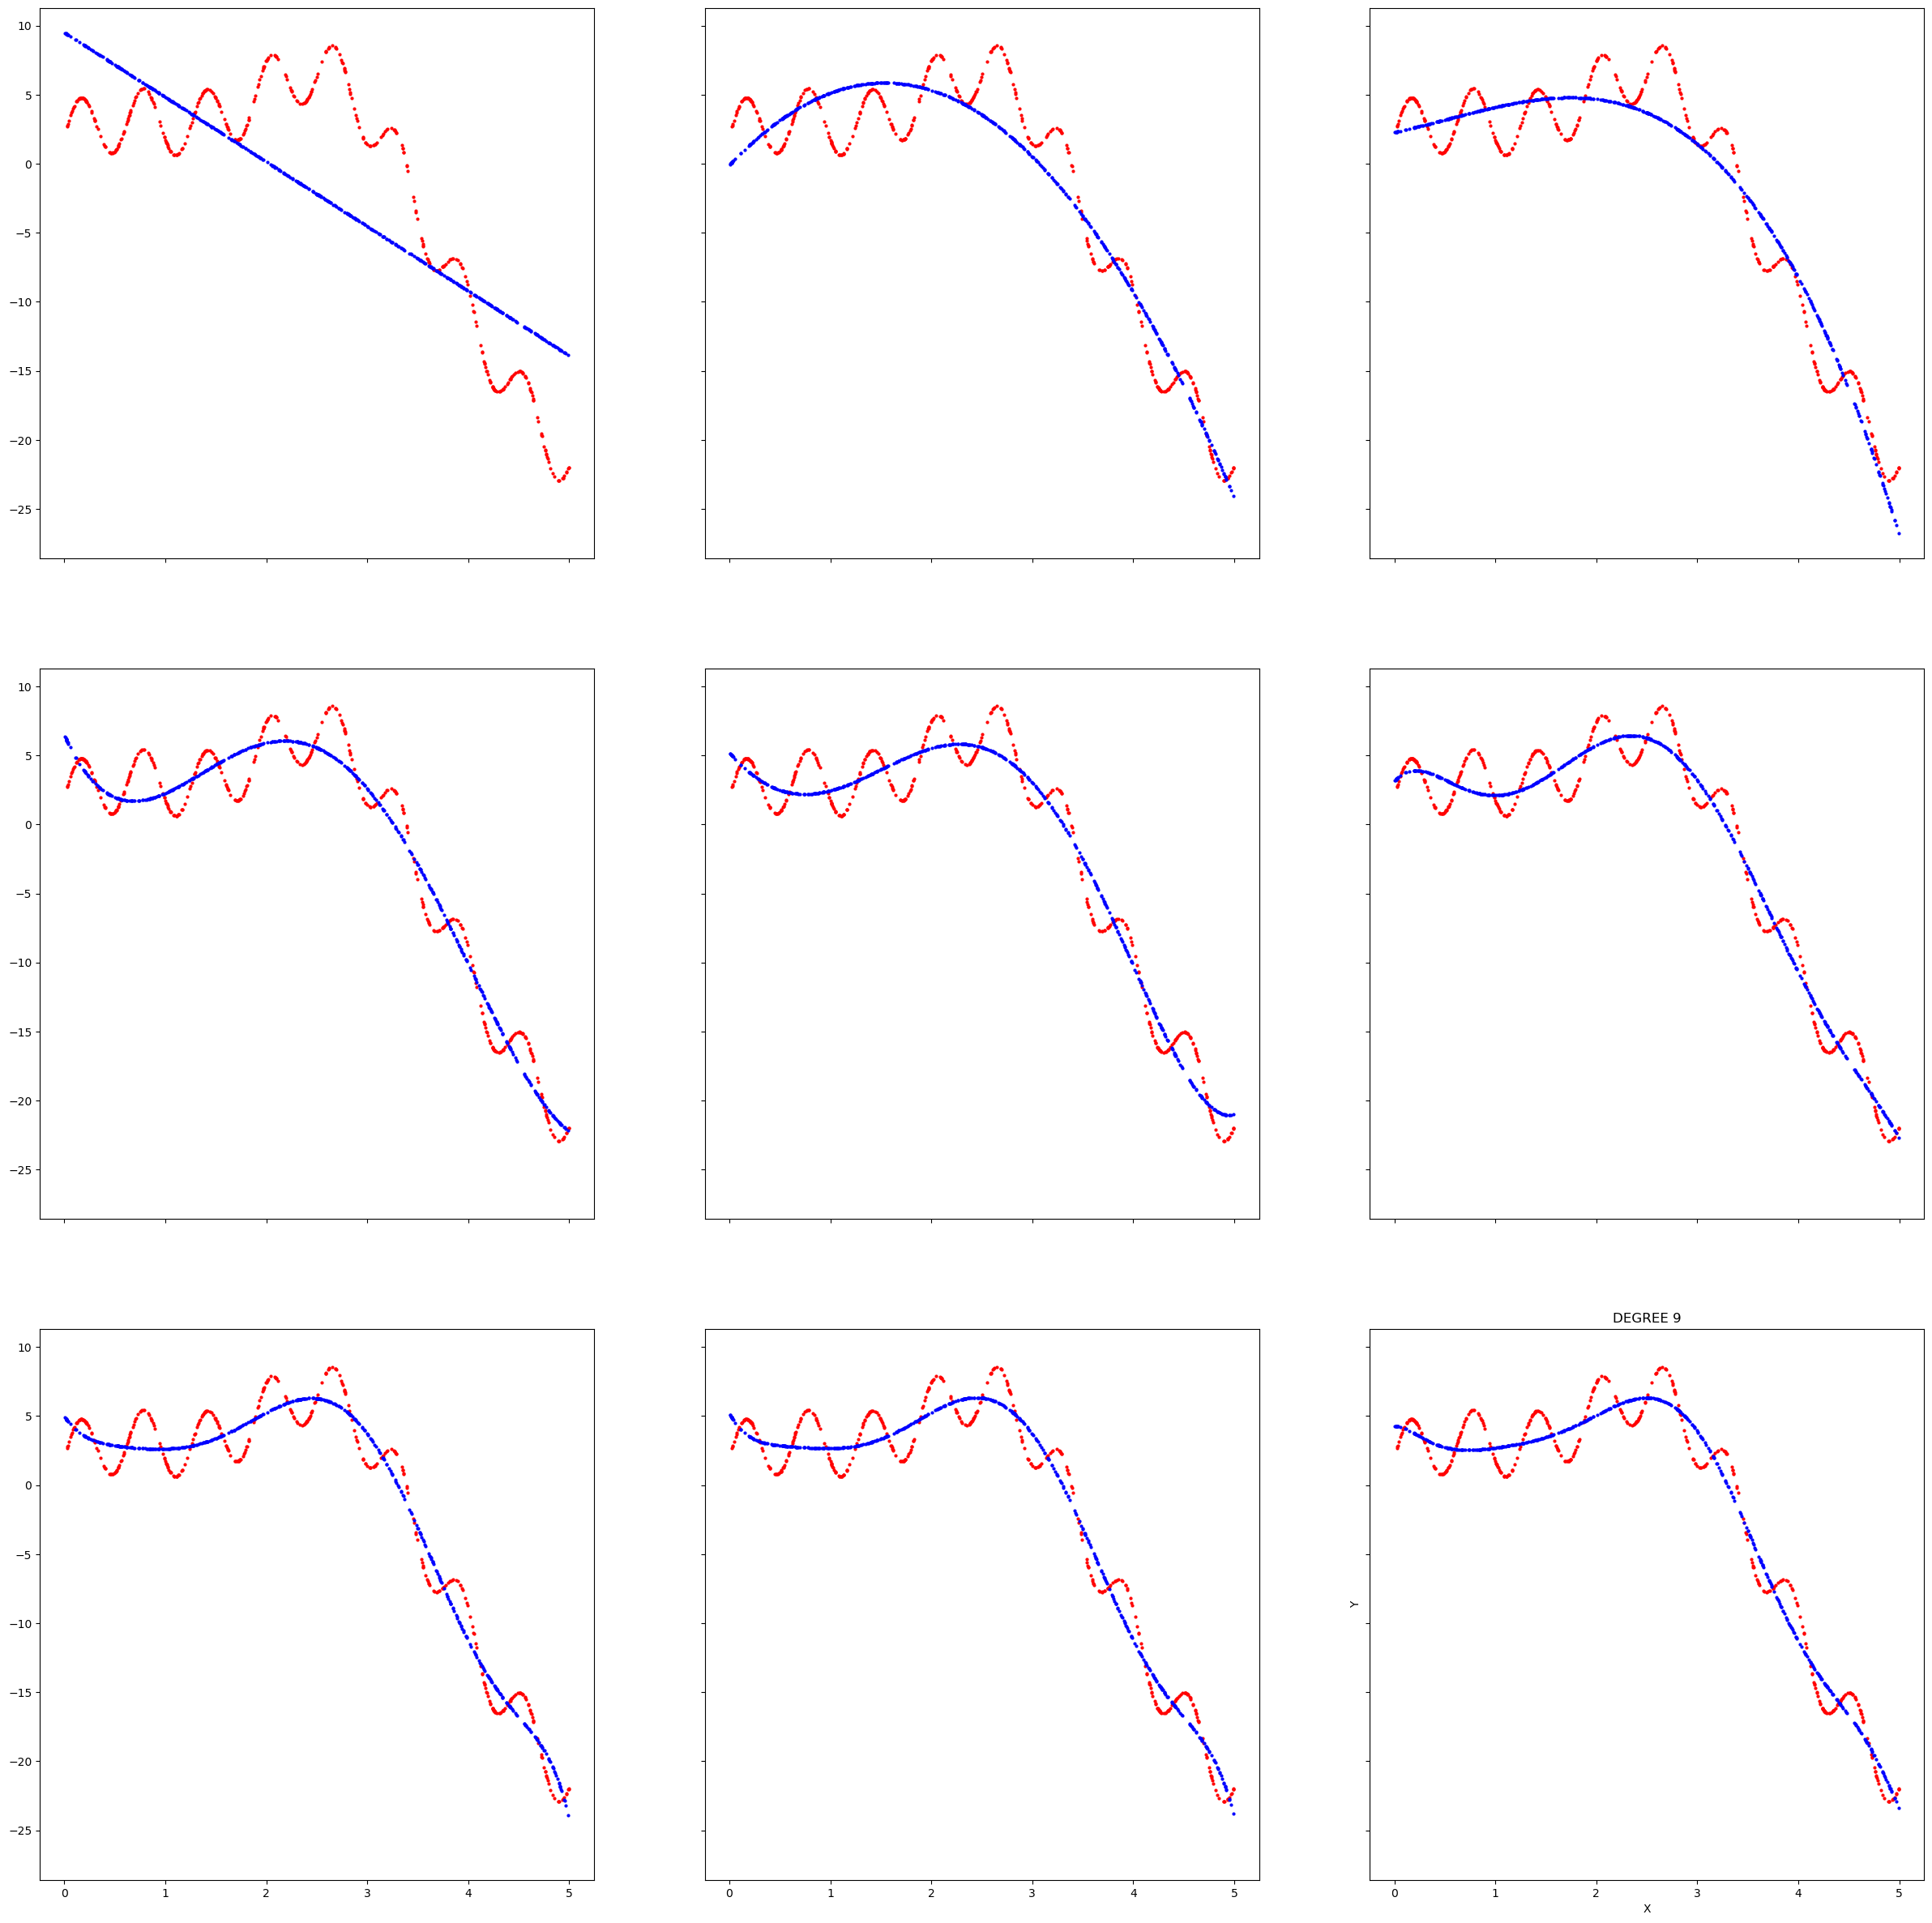

TRAINING SET  3


<Figure size 640x480 with 0 Axes>

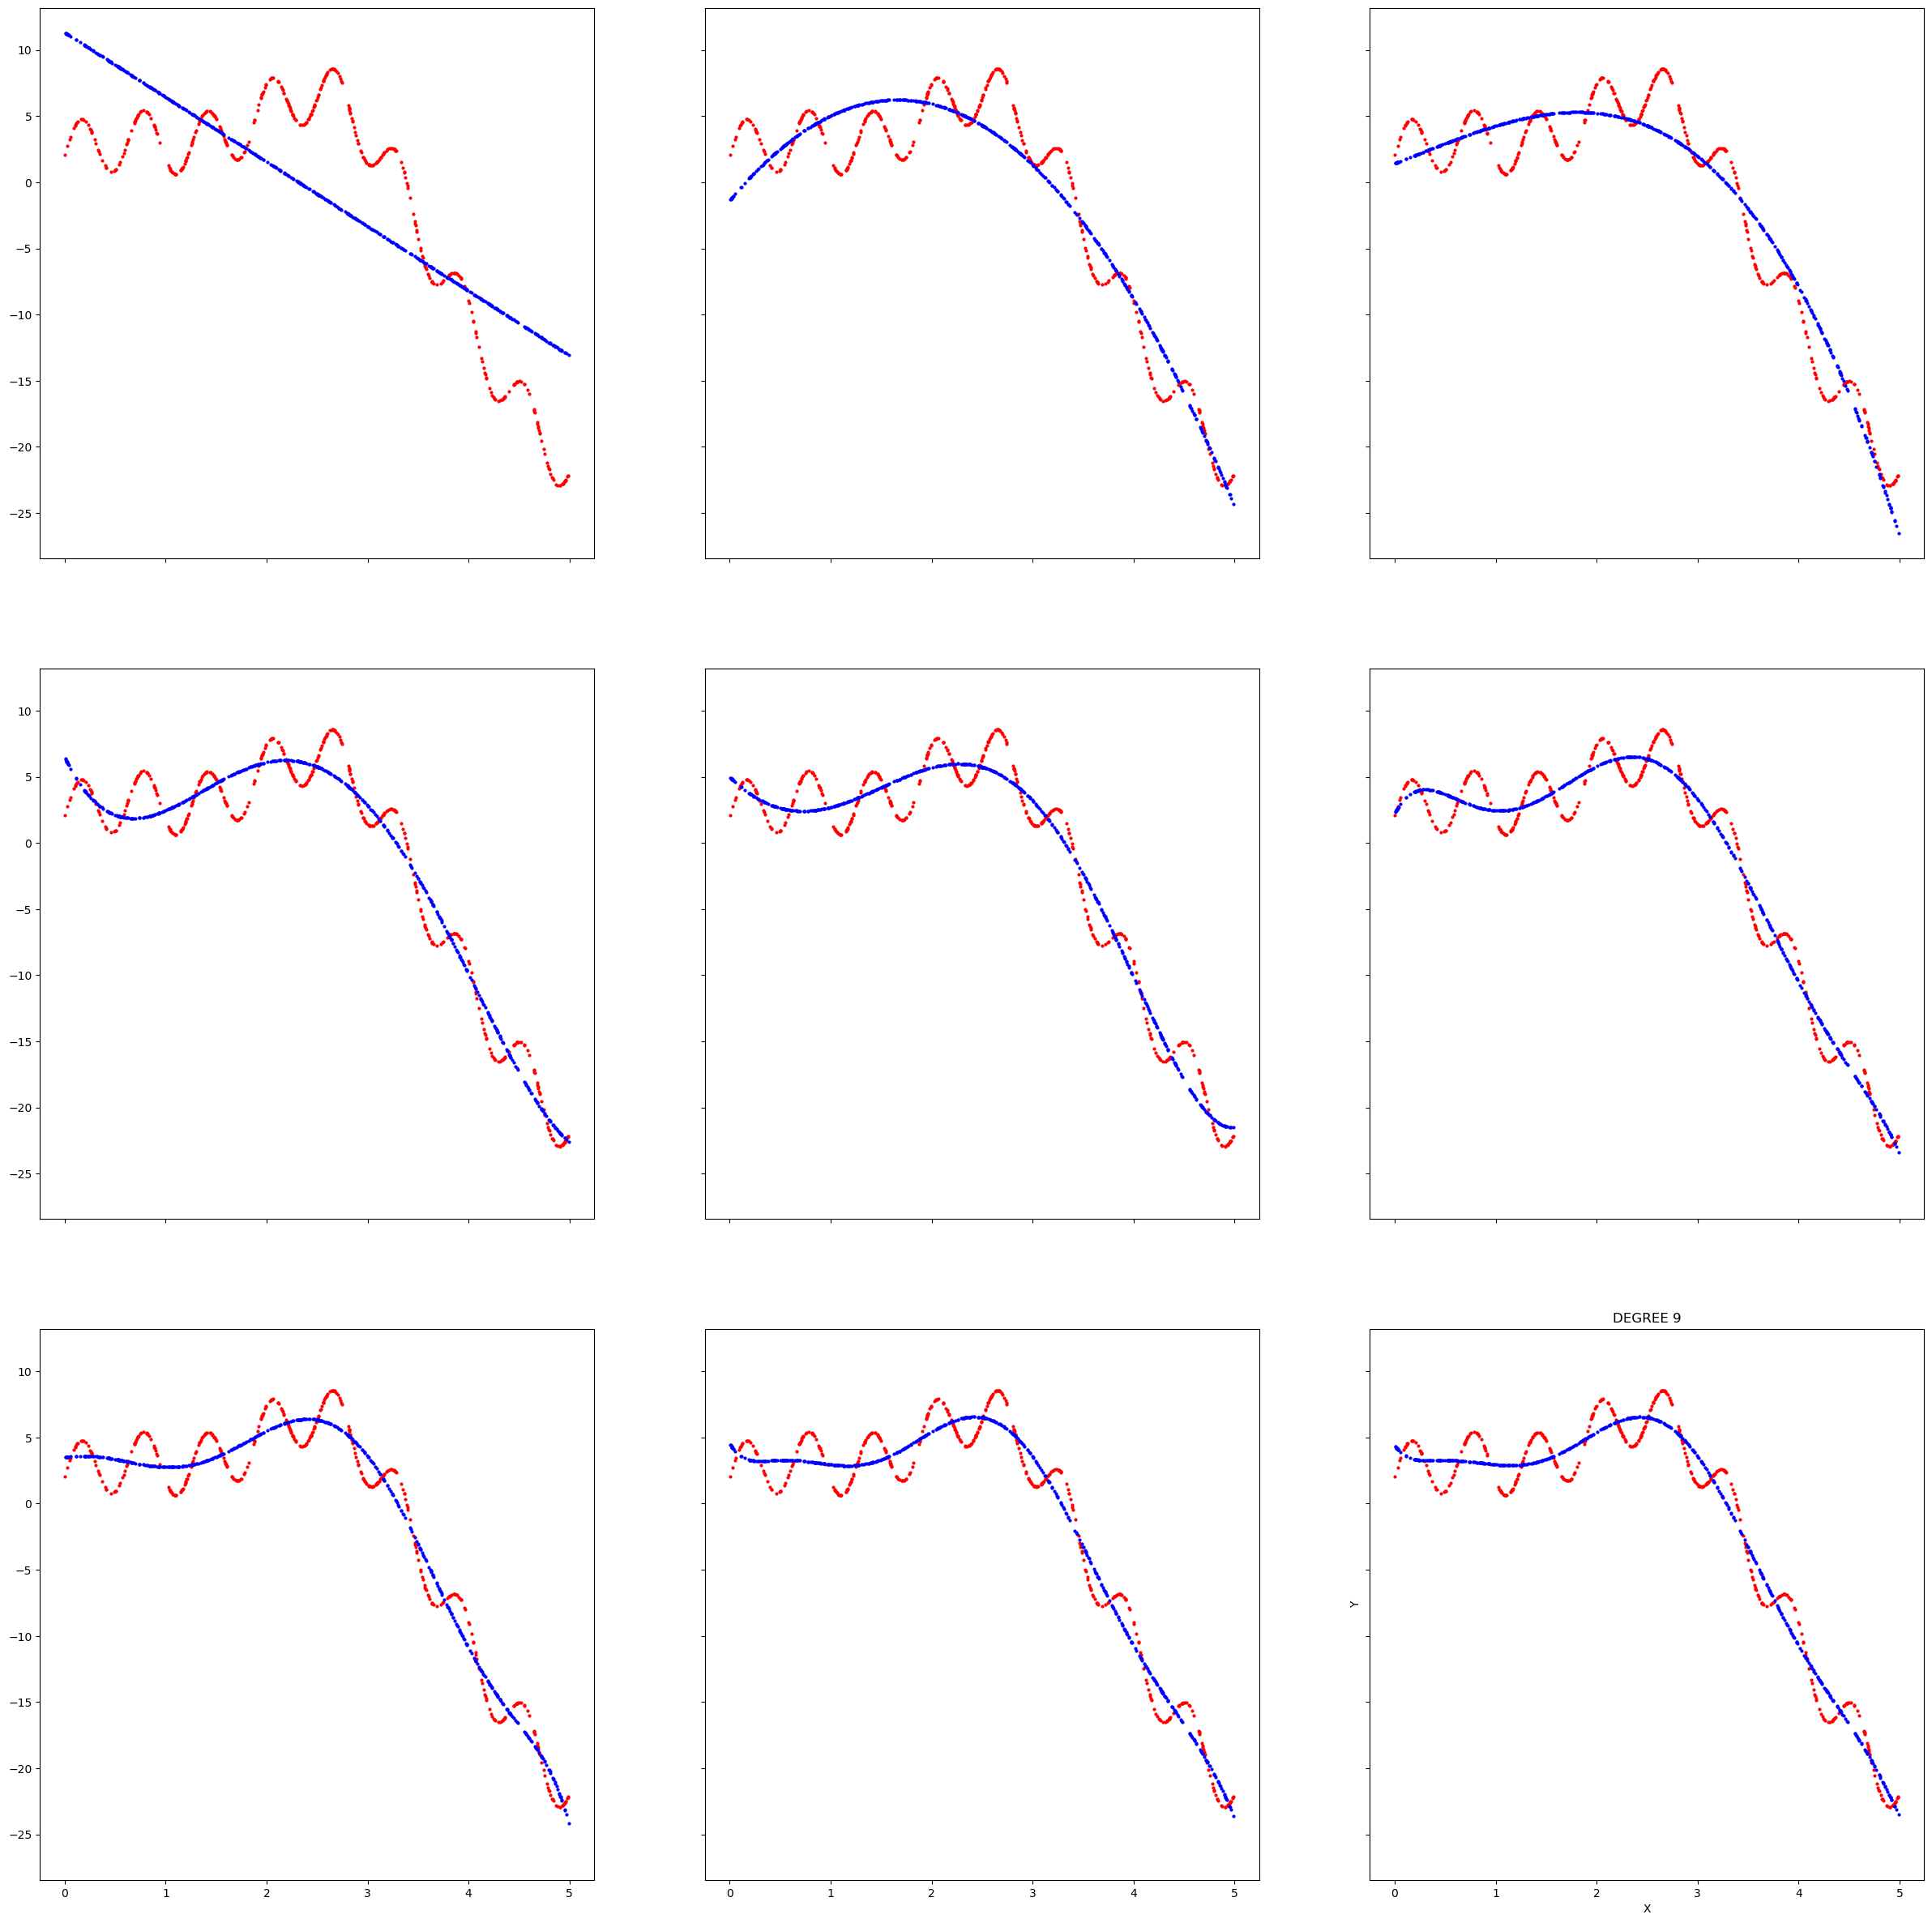

TRAINING SET  4


<Figure size 640x480 with 0 Axes>

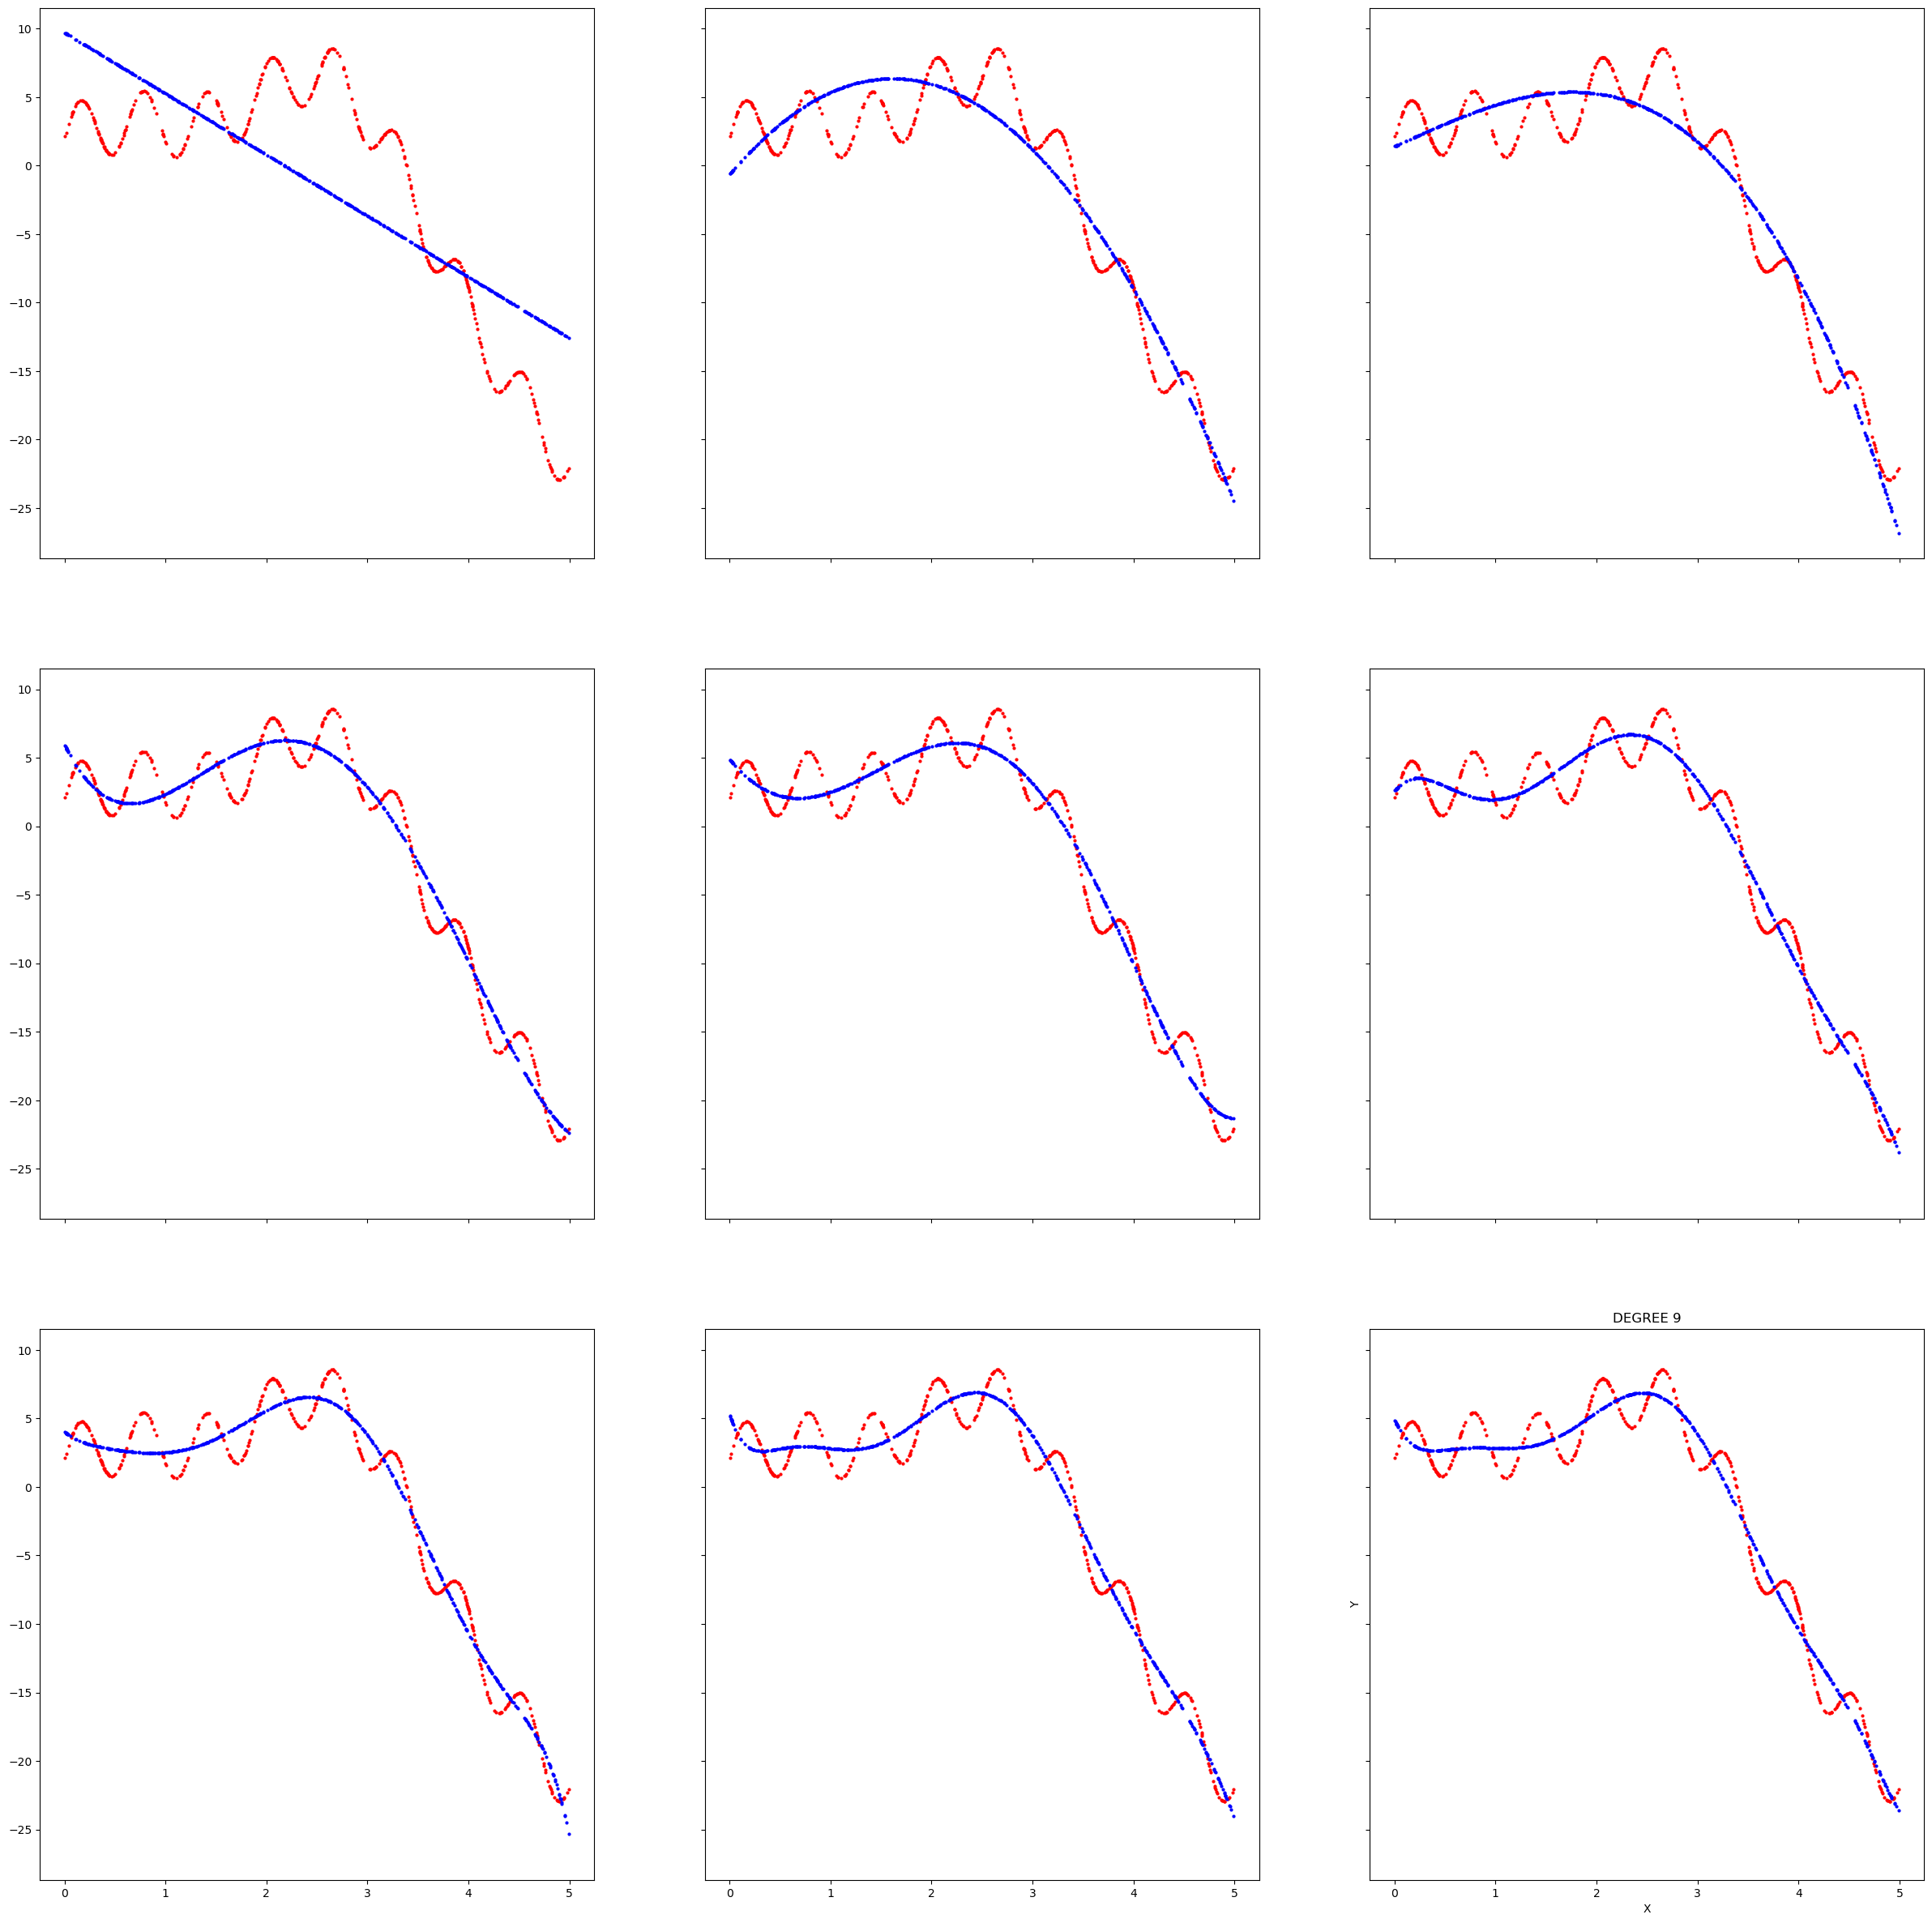

TRAINING SET  5


<Figure size 640x480 with 0 Axes>

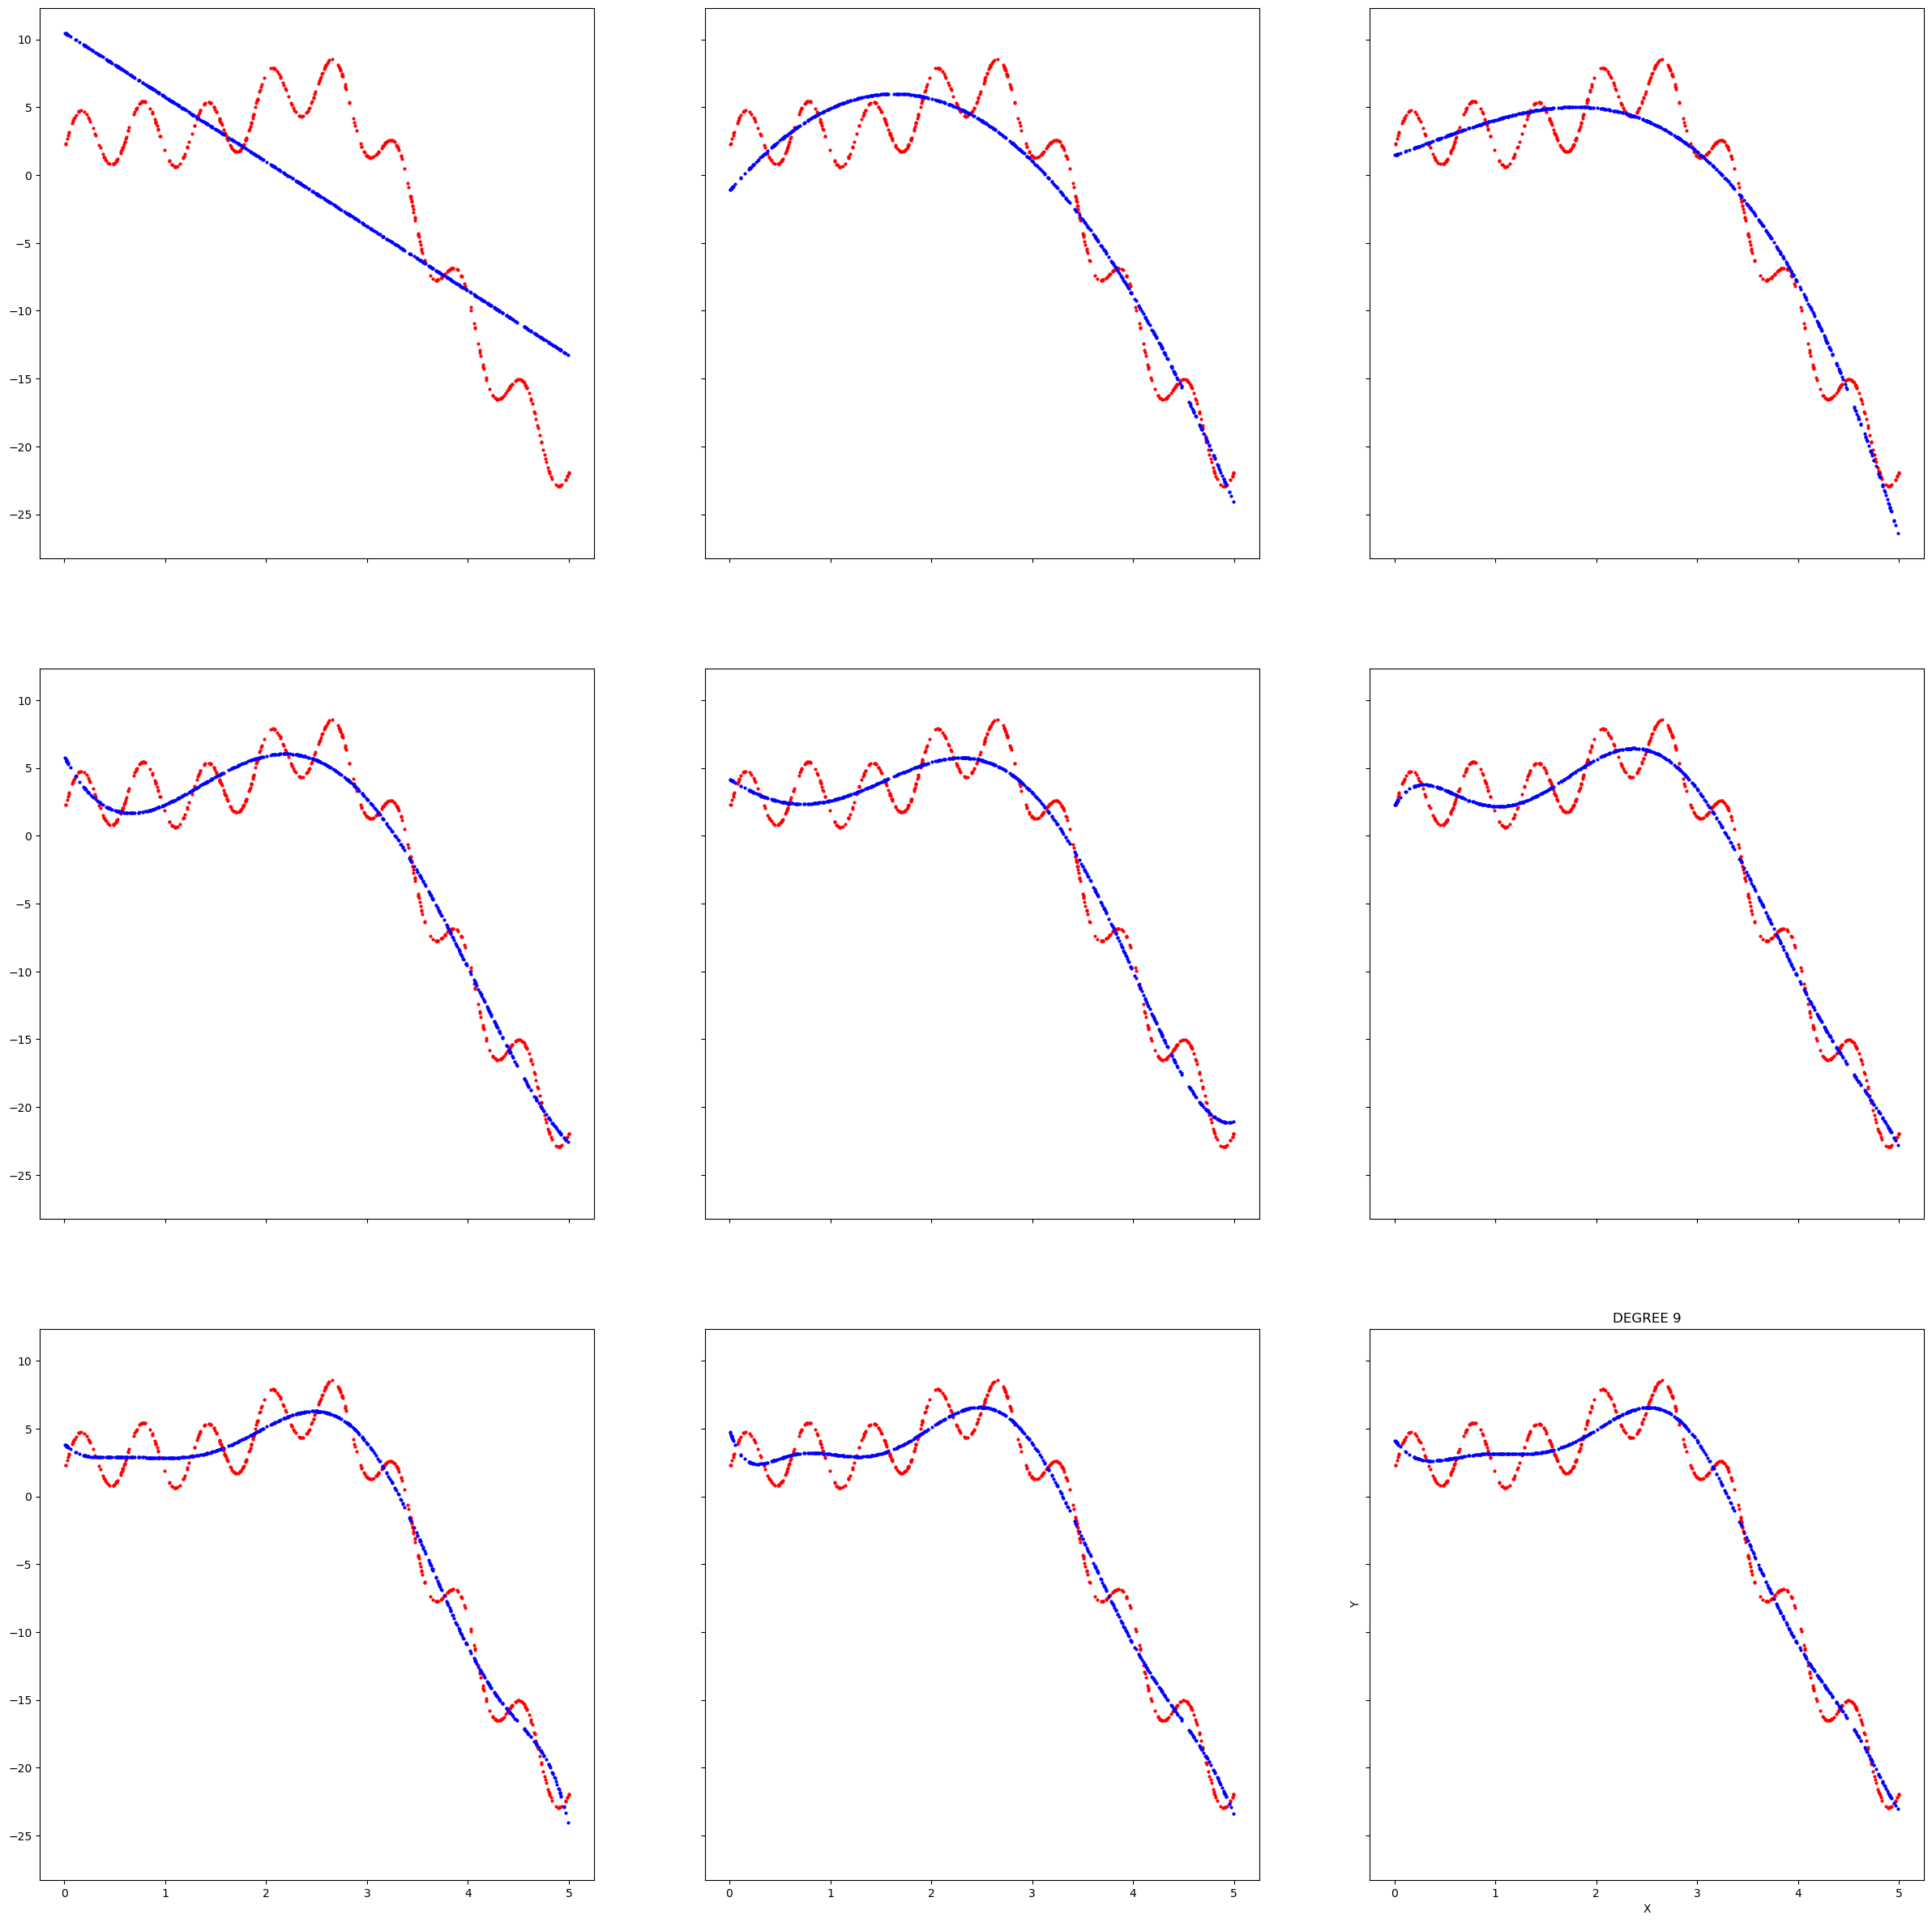

TRAINING SET  6


<Figure size 640x480 with 0 Axes>

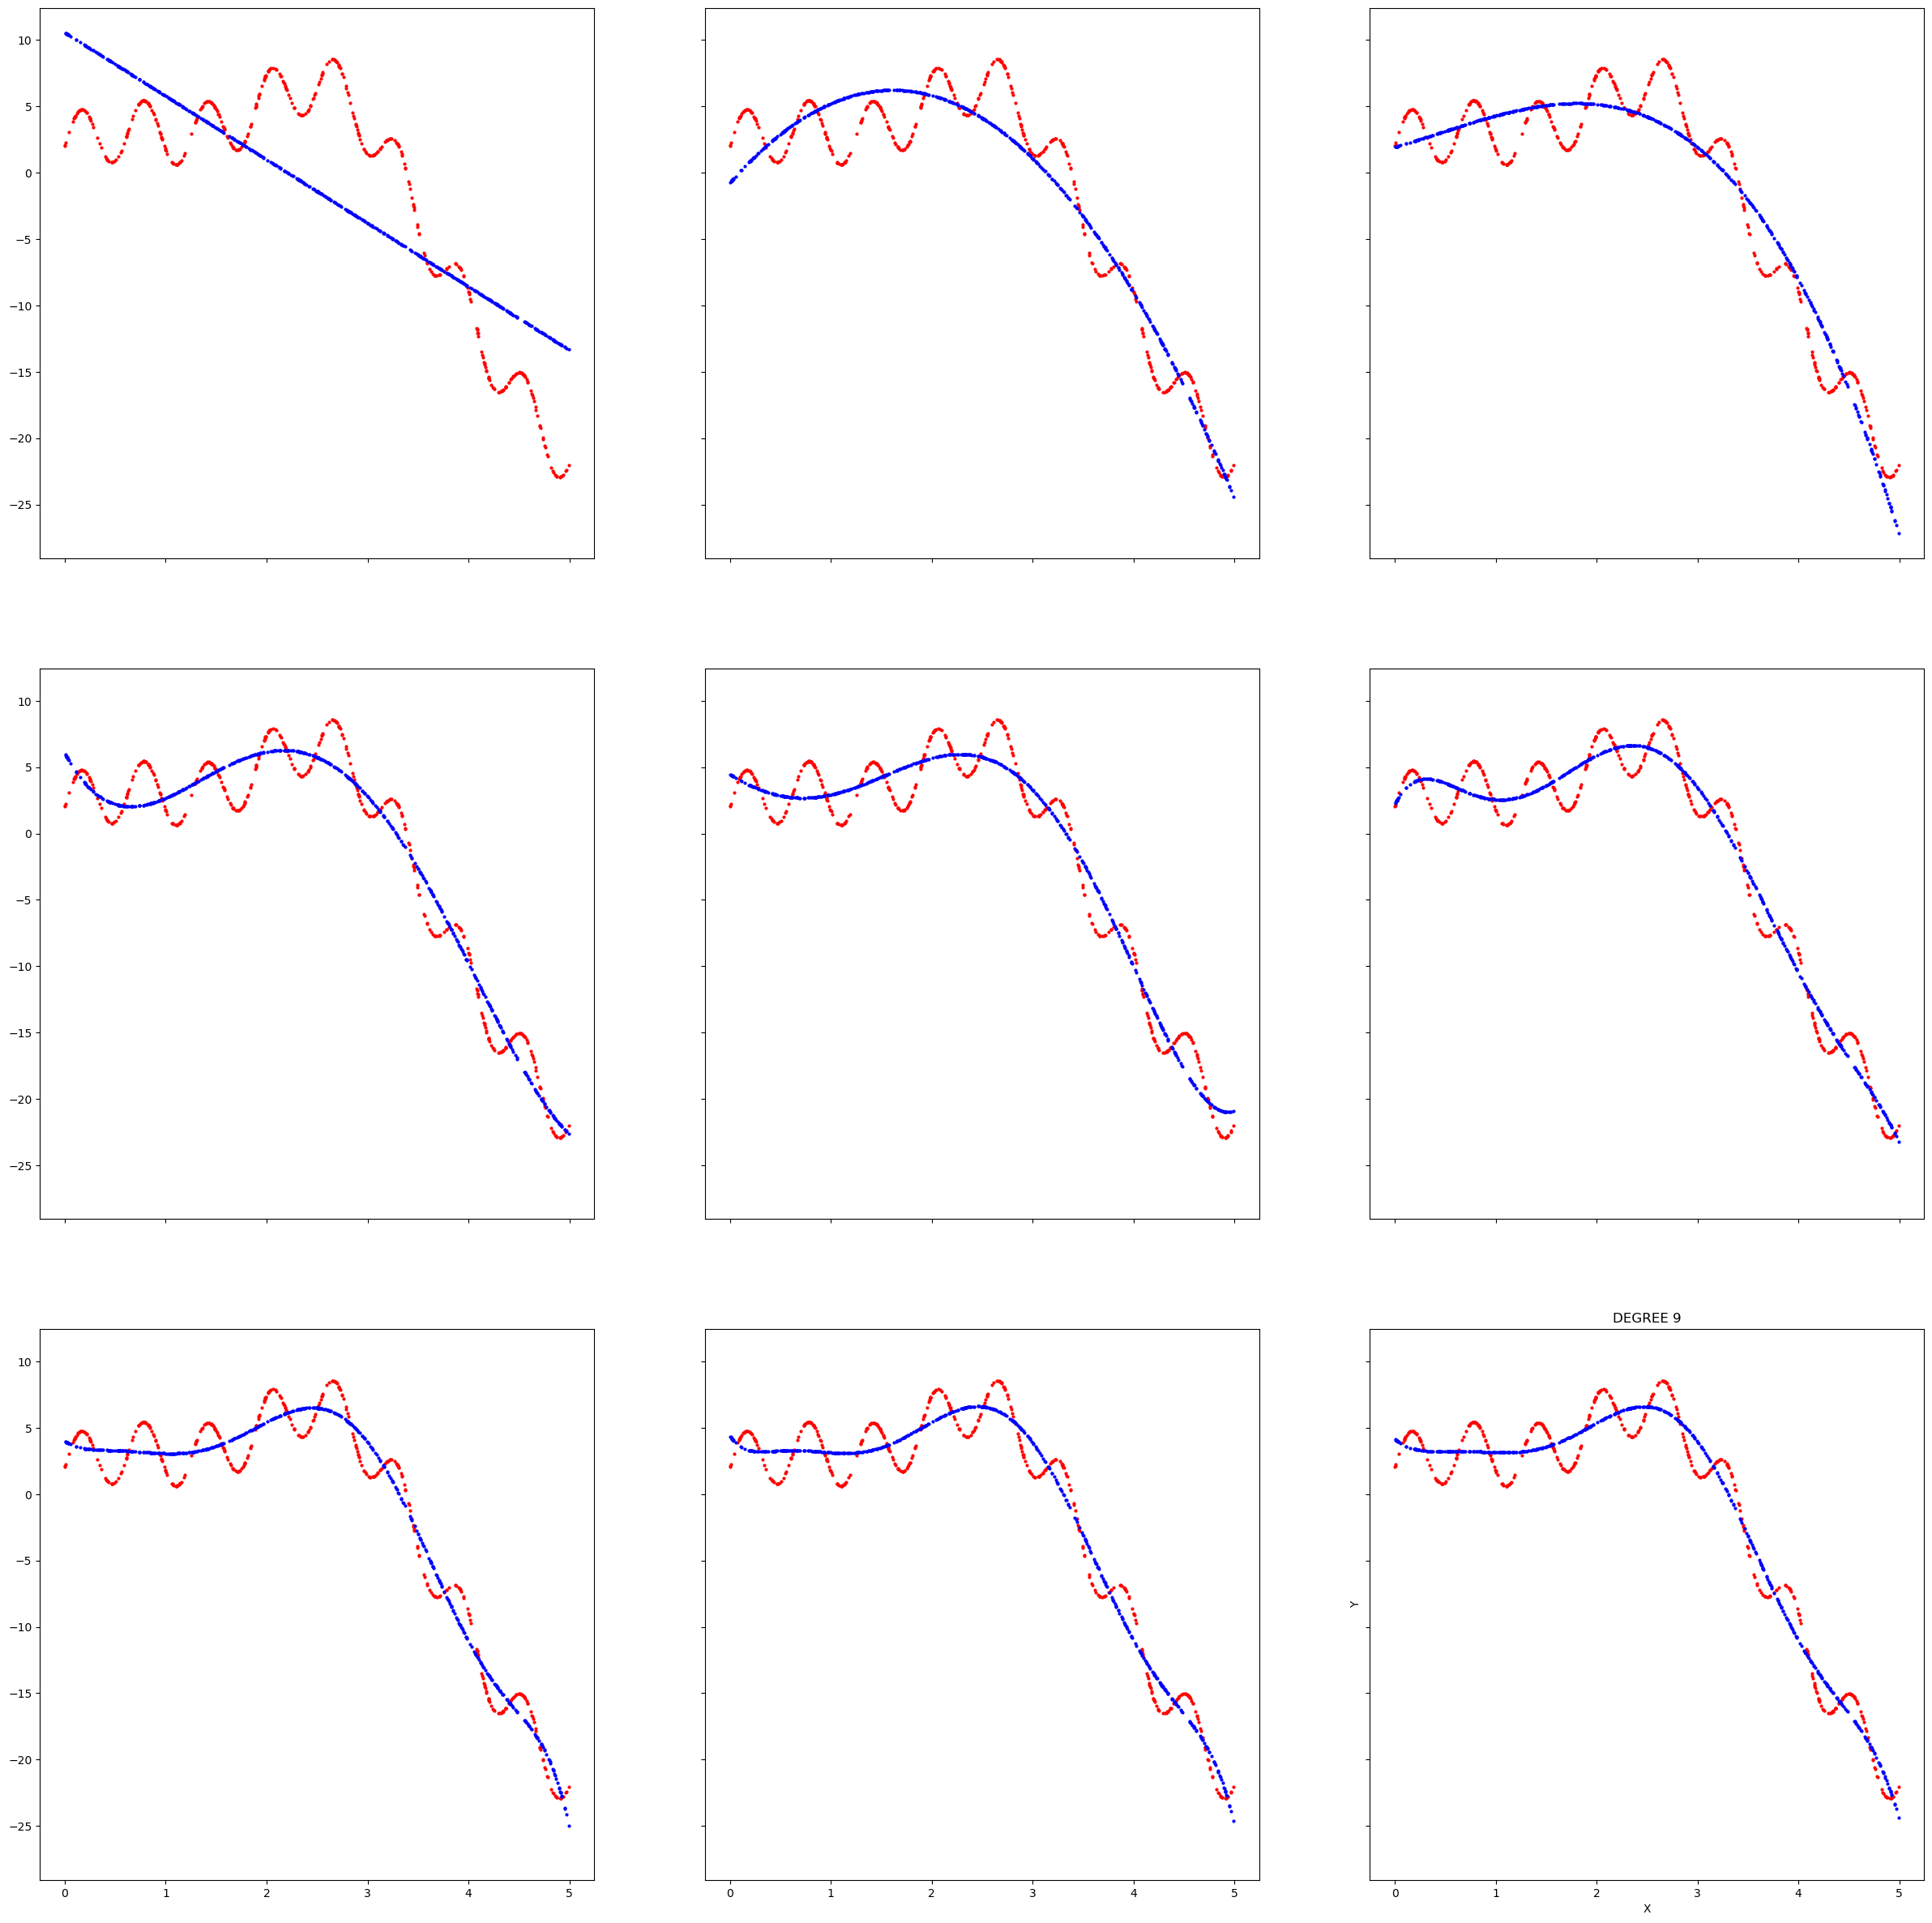

TRAINING SET  7


<Figure size 640x480 with 0 Axes>

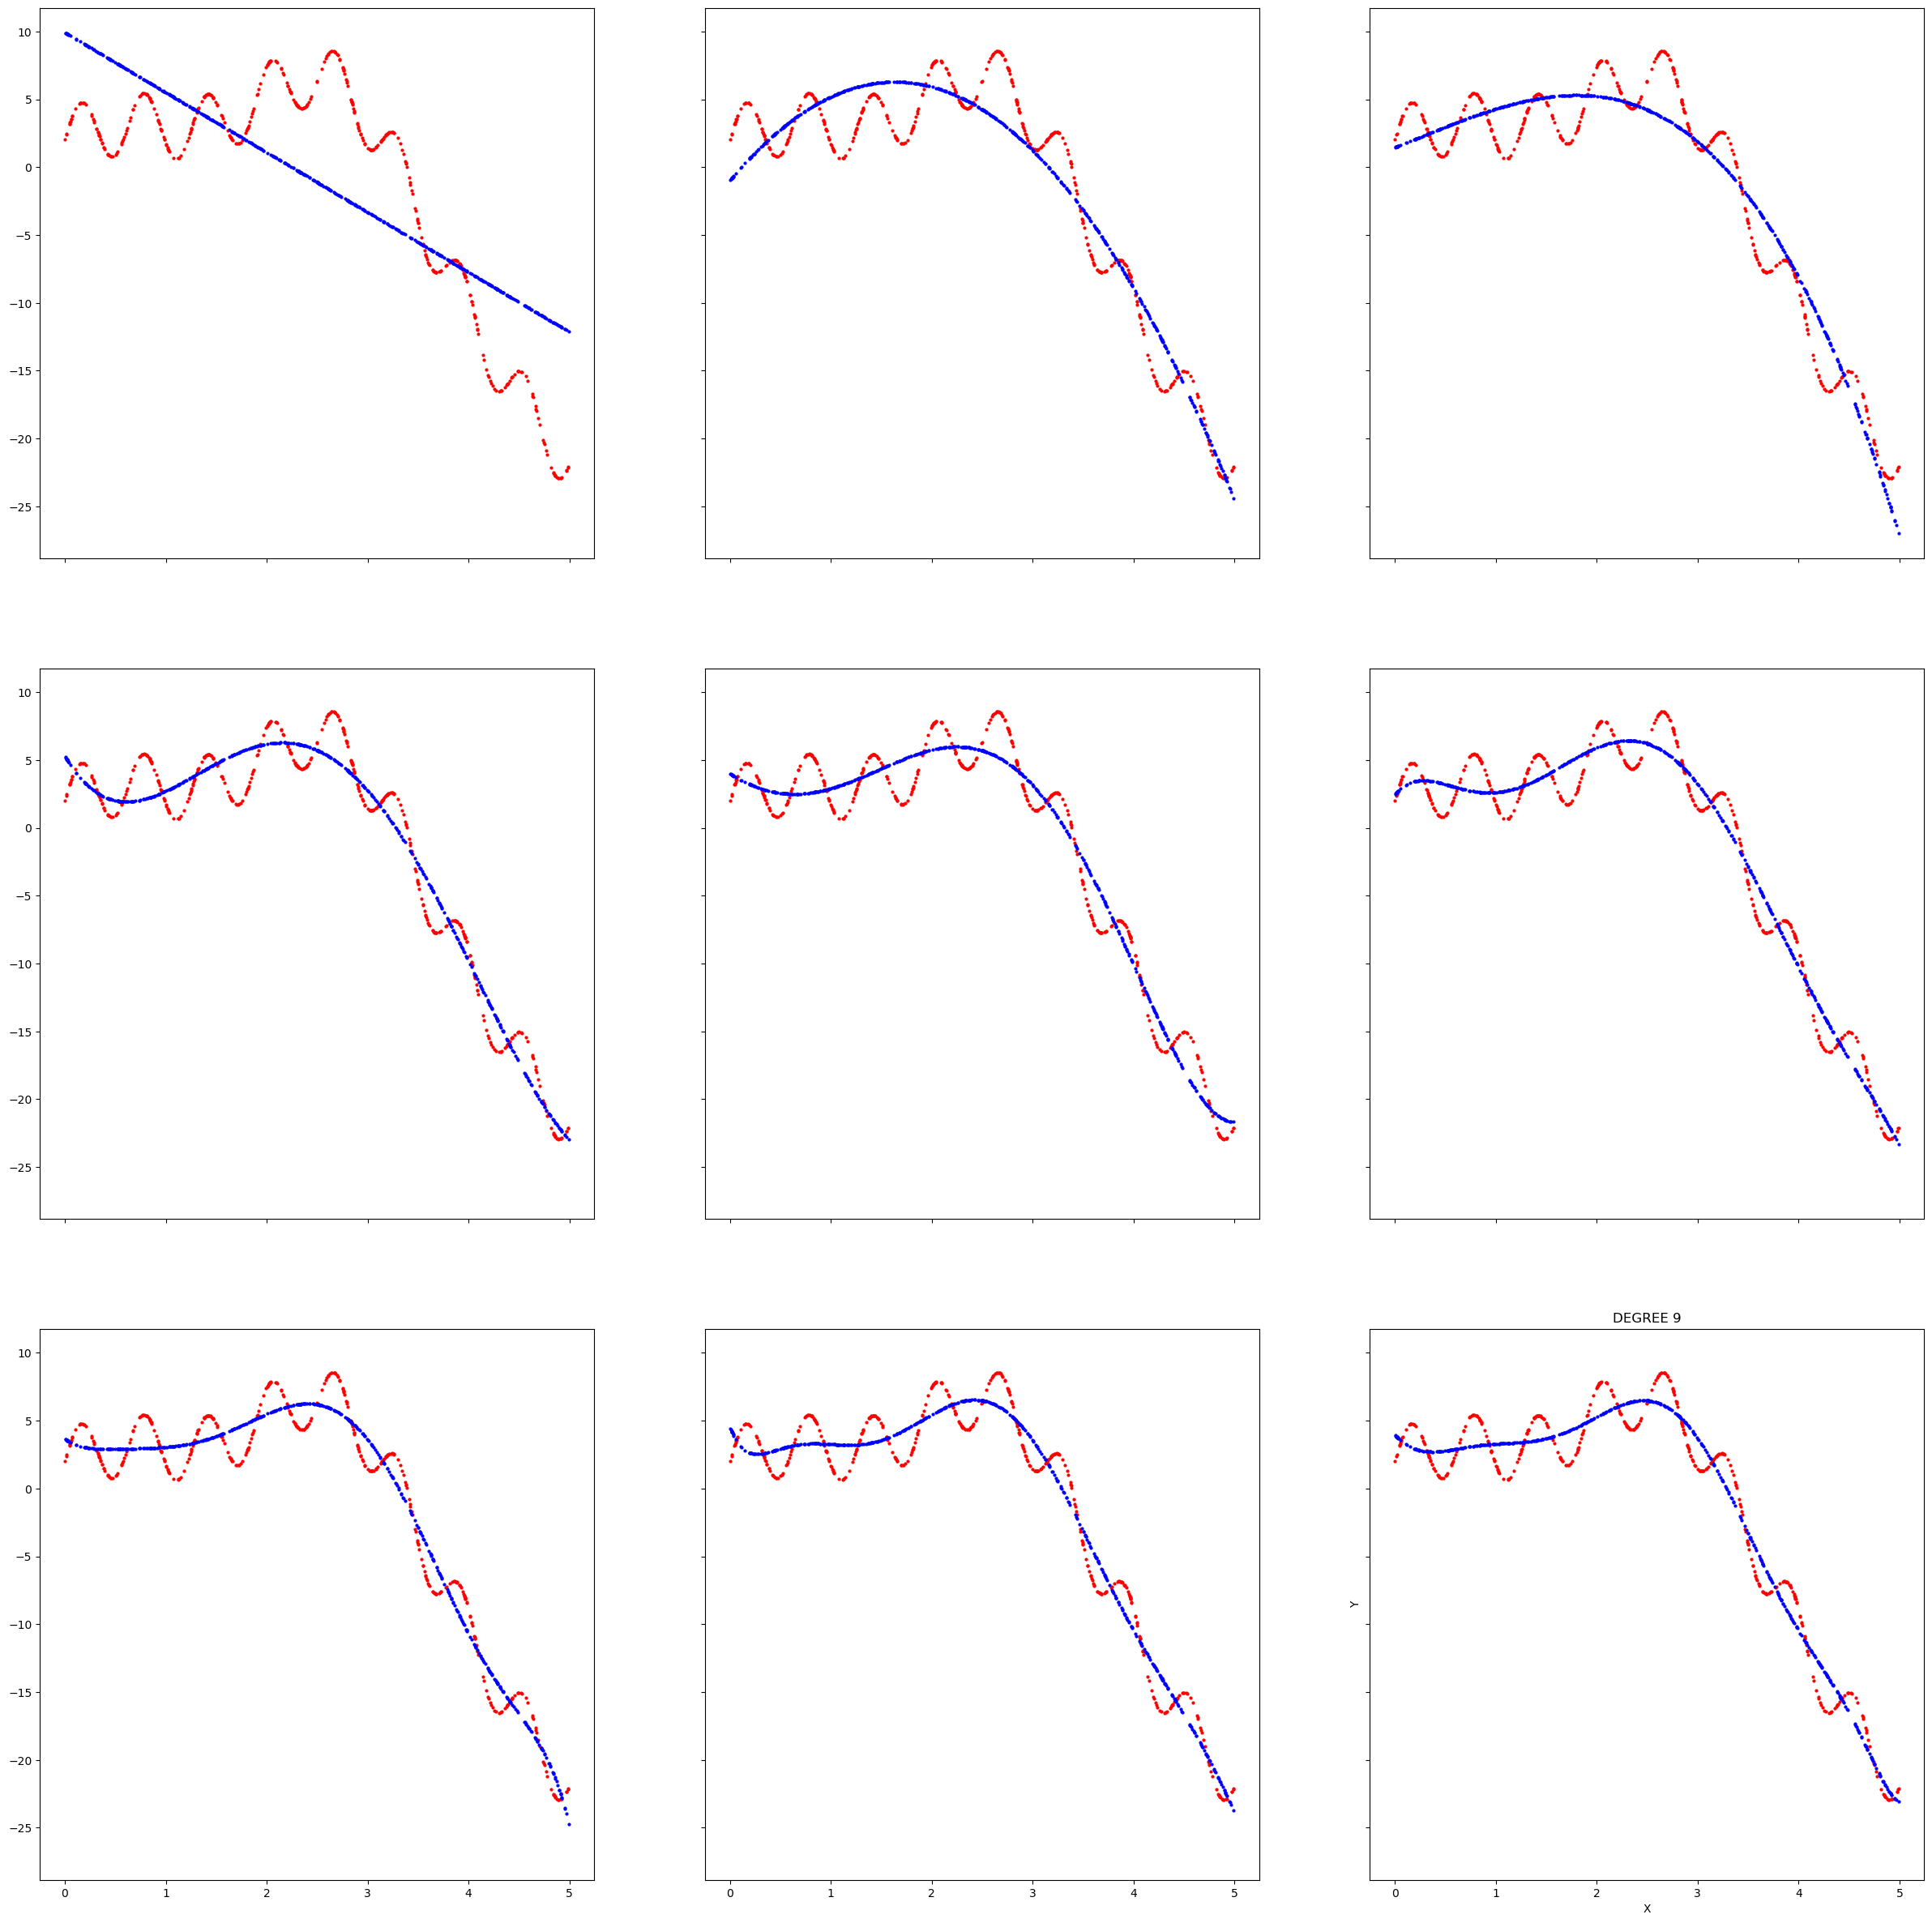

TRAINING SET  8


<Figure size 640x480 with 0 Axes>

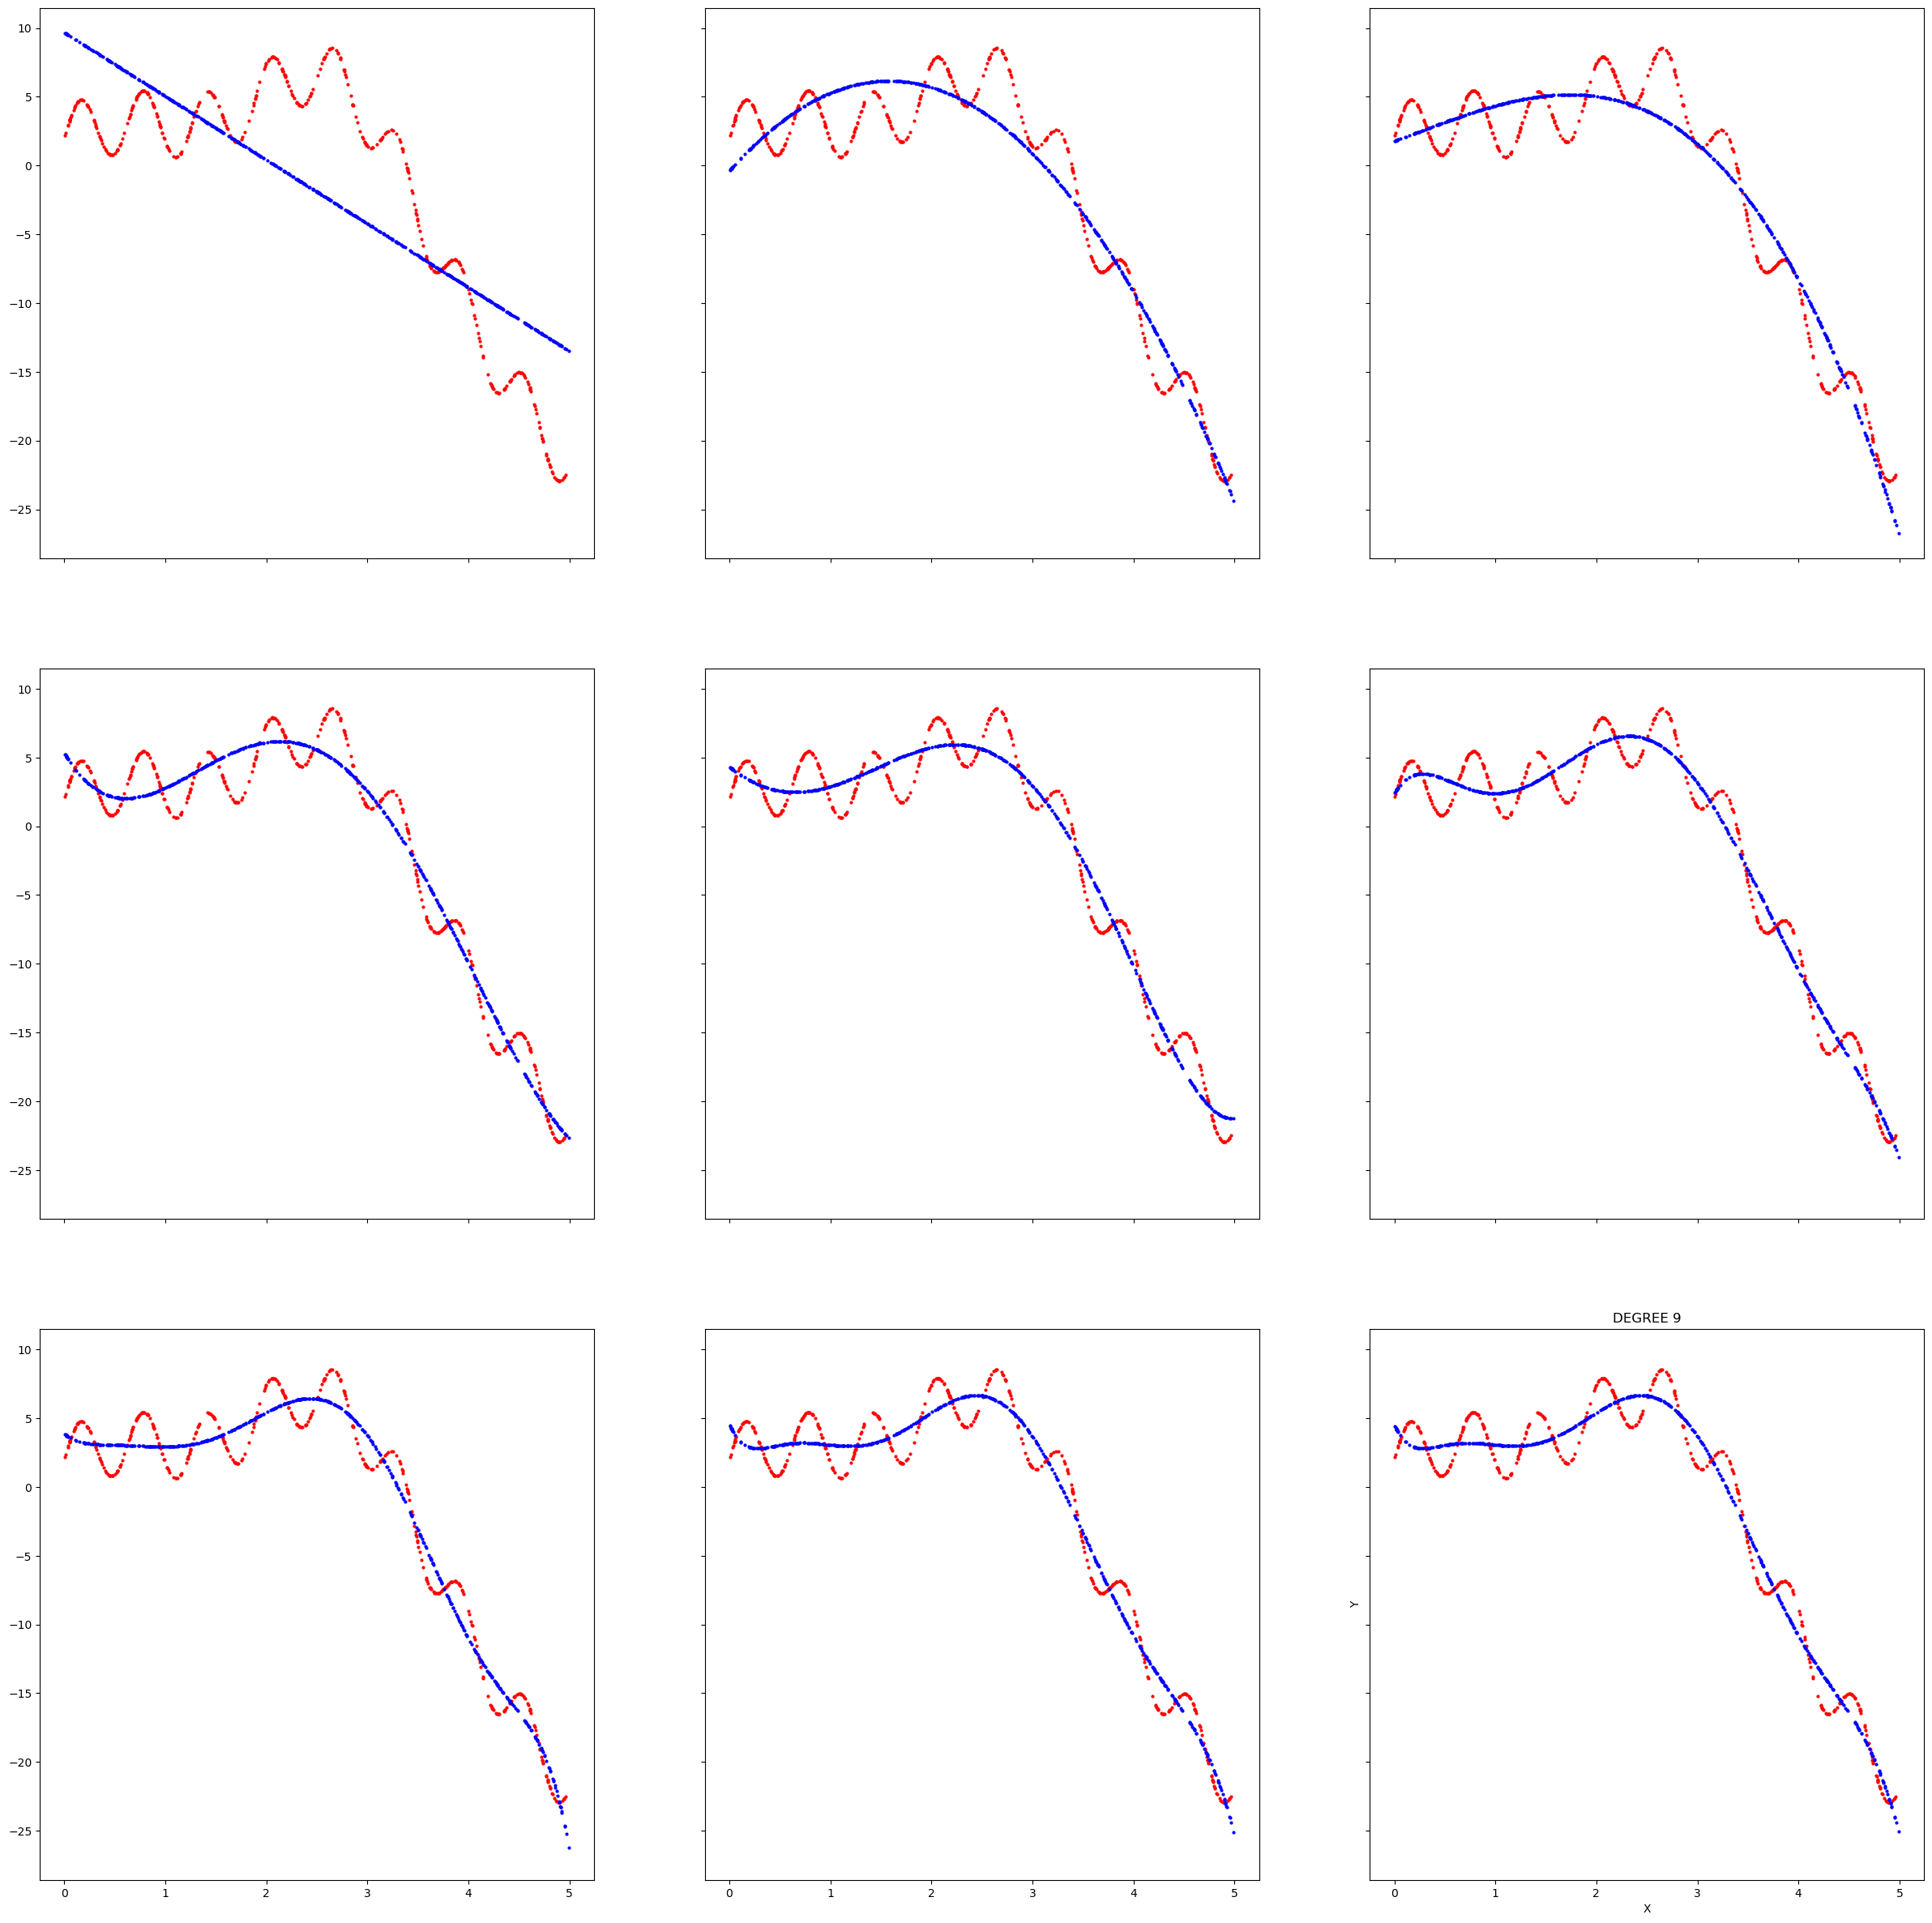

TRAINING SET  9


<Figure size 640x480 with 0 Axes>

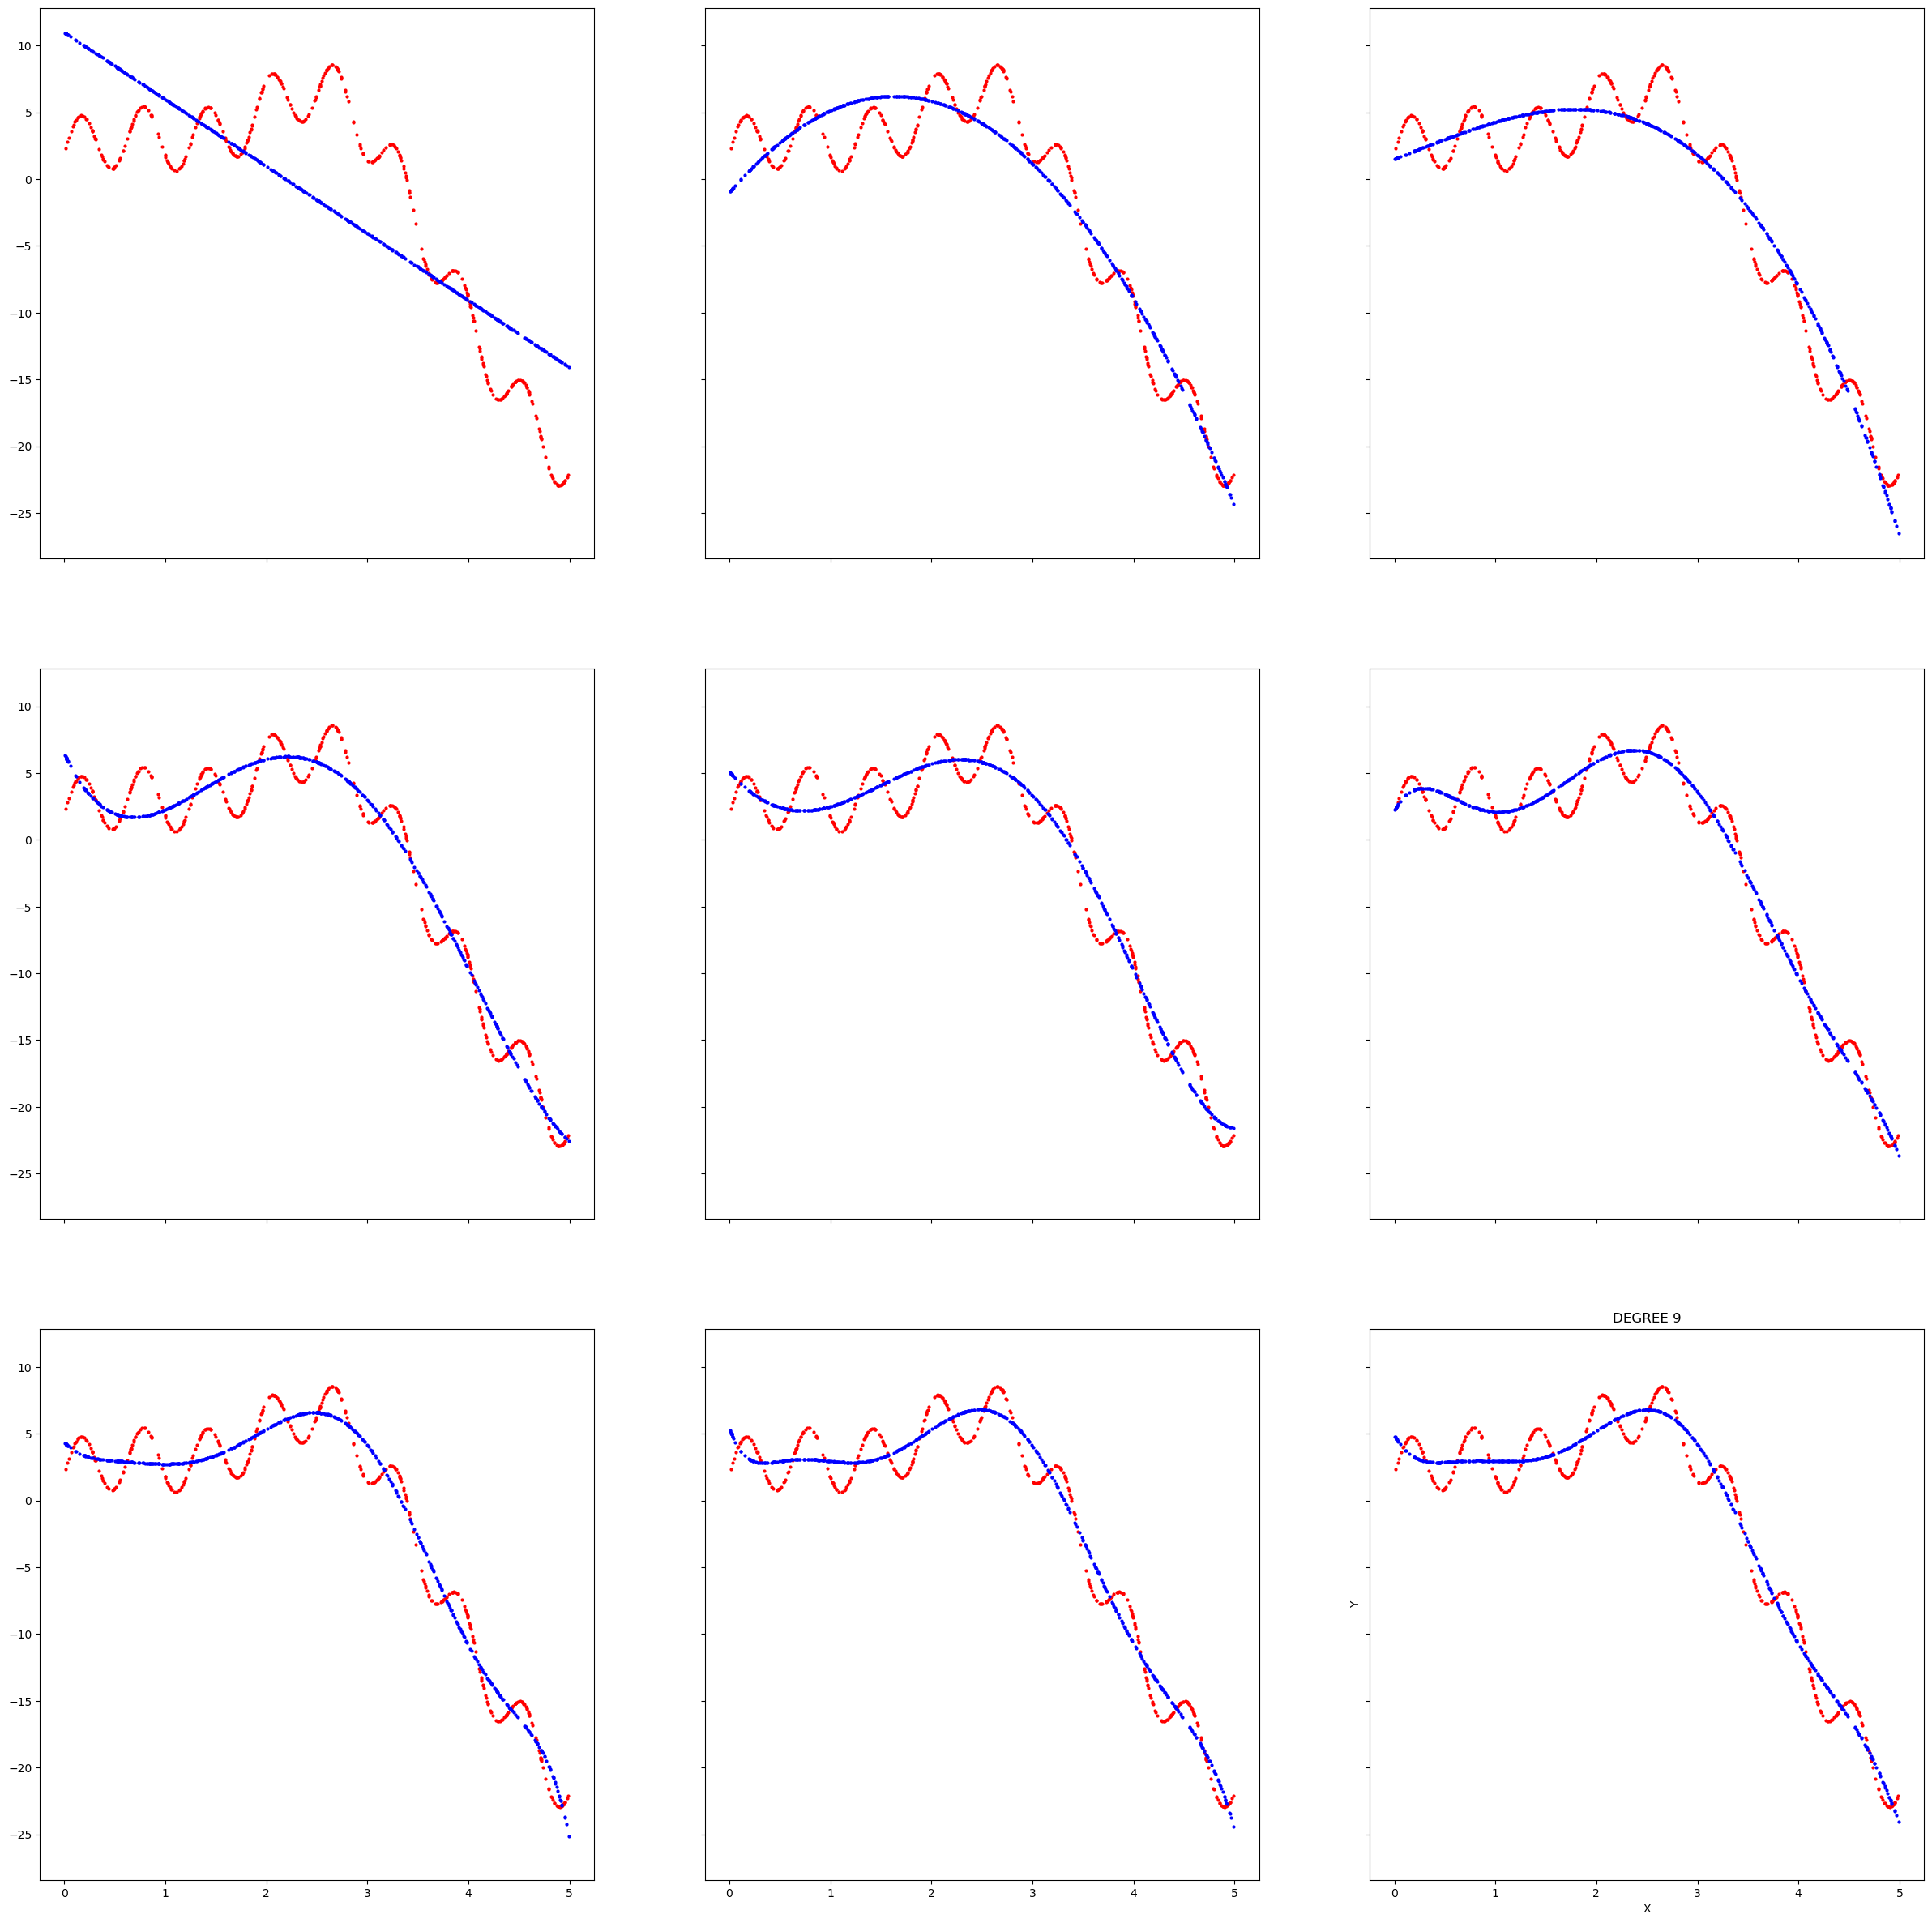

In [15]:
y_predicted = []
for i in range(10):
    print("TRAINING SET ", i)
    f = plt.figure()
    f, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(30, 30))
    x = X_train_data_sets[i][:, np.newaxis]  # transposing it
    y = Y_train_data_sets[i]
    temp = []
    for degree in range(0, 9):
        axes[int(degree/3)][int(degree % 3)].plot(x, y, 'r.', markersize=4)
        #TODO: Create polynomial features of current degree + 1 using PolynomialFeatures function
        poly_features = PolynomialFeatures(degree=degree+1)
        #TODO: Fit the polynomial features on the current training set using the fit_transform method
        X_train_poly = poly_features.fit_transform(x)
        #TODO: Create a plolynomial regression model using LinearRegression class
        poly_model = LinearRegression()
        #TODO: Fit the model to the current training set
        poly_model.fit(X_train_poly,y)
        #TODO: Predict the value of y for the testing set using the predict method Hint: fit the polynomial features on the xTest[:, numpy.newaxis] then predict the value of y for the polynomial features
        X_test_poly = poly_features.transform(xTest[:, np.newaxis])
        y_test_predict = poly_model.predict(X_test_poly)
        #TODO: append the current prediction to the temp list
        temp.append(y_test_predict)
        axes[int(degree/3)][int(degree % 3)].plot(xTest[:, np.newaxis], y_test_predict, 'b.', markersize=4)
        plt.title("DEGREE "+str(degree+1))
        plt.xlabel("X")
        plt.ylabel("Y")
    #TODO: append the prediction of all 9 models to the y_predicted list Hint: the prediction of all models are saved in temp
    y_predicted.append(temp)
    plt.show()

Here is a very important code to make us understand our lists that y_predicted have 10 lists one for every training set and every list of the ten contain 9 lists one for every degree we trained our current training set on and every one of these lists have of course 500 values the predictions of the testing data. 

In [16]:
print(len(y_predicted))
print(len(y_predicted[0]))
print(len(y_predicted[0][0]))

10
9
500


## STEP 4: CALCULATE THE BIAS AND VARIANCE OF THE MODEL

## Function for calculating the bias and the variance

 we calculate the bias and variance as follows:
- For a given degree we append the values of the y_predicted for each dataset to a list
- Convert this list to a numpy array y_predicted_part
- Calculate the bias of this list by subtracting the prediction of the model for each training set from the testing dataset
- Bias corresponding to the models of a given degree is the mean of this list
- Similarly calculate the variance of this list
- Variance corresponding to the models of a given degree is the mean of this list

In [17]:
def find_bias_variance(order):
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][order])
    # print(len(y_predicted_part[0]))
    y_predicted_part = np.asarray(y_predicted_part)
    print(y_predicted_part.shape)
    print(yTest.shape)
    #TODO: calculate the bias using np.mean and np.abs
    bias = np.mean(np.abs(y_predicted_part - yTest), axis=1) 
    #TODO: calculate the variance using np.var
    variance = np.var(y_predicted_part, axis=0) 
    return(np.mean(bias), np.mean(variance))

Then we call the function as follows, in order to populate the lists, bias and variance.

In [18]:
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)

(10, 500)
(500,)
(10, 500)
(500,)
(10, 500)
(500,)
(10, 500)
(500,)
(10, 500)
(500,)
(10, 500)
(500,)
(10, 500)
(500,)
(10, 500)
(500,)
(10, 500)
(500,)
Bias: [4.867999652704416, 2.019455389170052, 1.9039242908957963, 1.5182054003160623, 1.5022541500015945, 1.415706701264905, 1.407096177831811, 1.420189784811425, 1.4114828455236426]
Variance: [0.21159174599021252, 0.040725853107634664, 0.027401645355564407, 0.028424019716390986, 0.027779630188219946, 0.030423566408999677, 0.03850332626168269, 0.042719412145089945, 0.05187974412912337]


The lists, bias and variance, now contain the bias and variance corresponding to a particular degree.

## Tabulate the values

We use the pandas library in order to display the required items in a table format

In [19]:
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(np.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(np.array(final_table["BIAS^2"])+np.array(variance))
df = pd.DataFrame(final_table)
print(df)

   DEGREE      BIAS     BIAS^2  VARIANCE        MSE
0       1  4.868000  23.697421  0.211592  23.909012
1       2  2.019455   4.078200  0.040726   4.118926
2       3  1.903924   3.624928  0.027402   3.652329
3       4  1.518205   2.304948  0.028424   2.333372
4       5  1.502254   2.256768  0.027780   2.284547
5       6  1.415707   2.004225  0.030424   2.034649
6       7  1.407096   1.979920  0.038503   2.018423
7       8  1.420190   2.016939  0.042719   2.059658
8       9  1.411483   1.992284  0.051880   2.044164


## Plot the bias-variance tradeoff

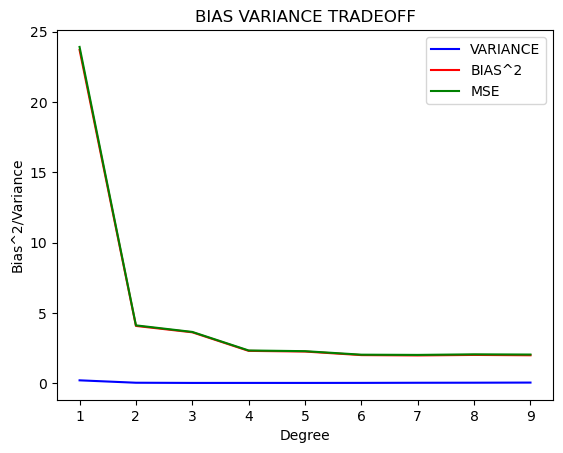

In [20]:
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()

# FITTING THE TRAINED MODEL TO THE TESTING DATASET FOR DISPLAYING THE LINE OF BEST FIT

<Figure size 640x480 with 0 Axes>

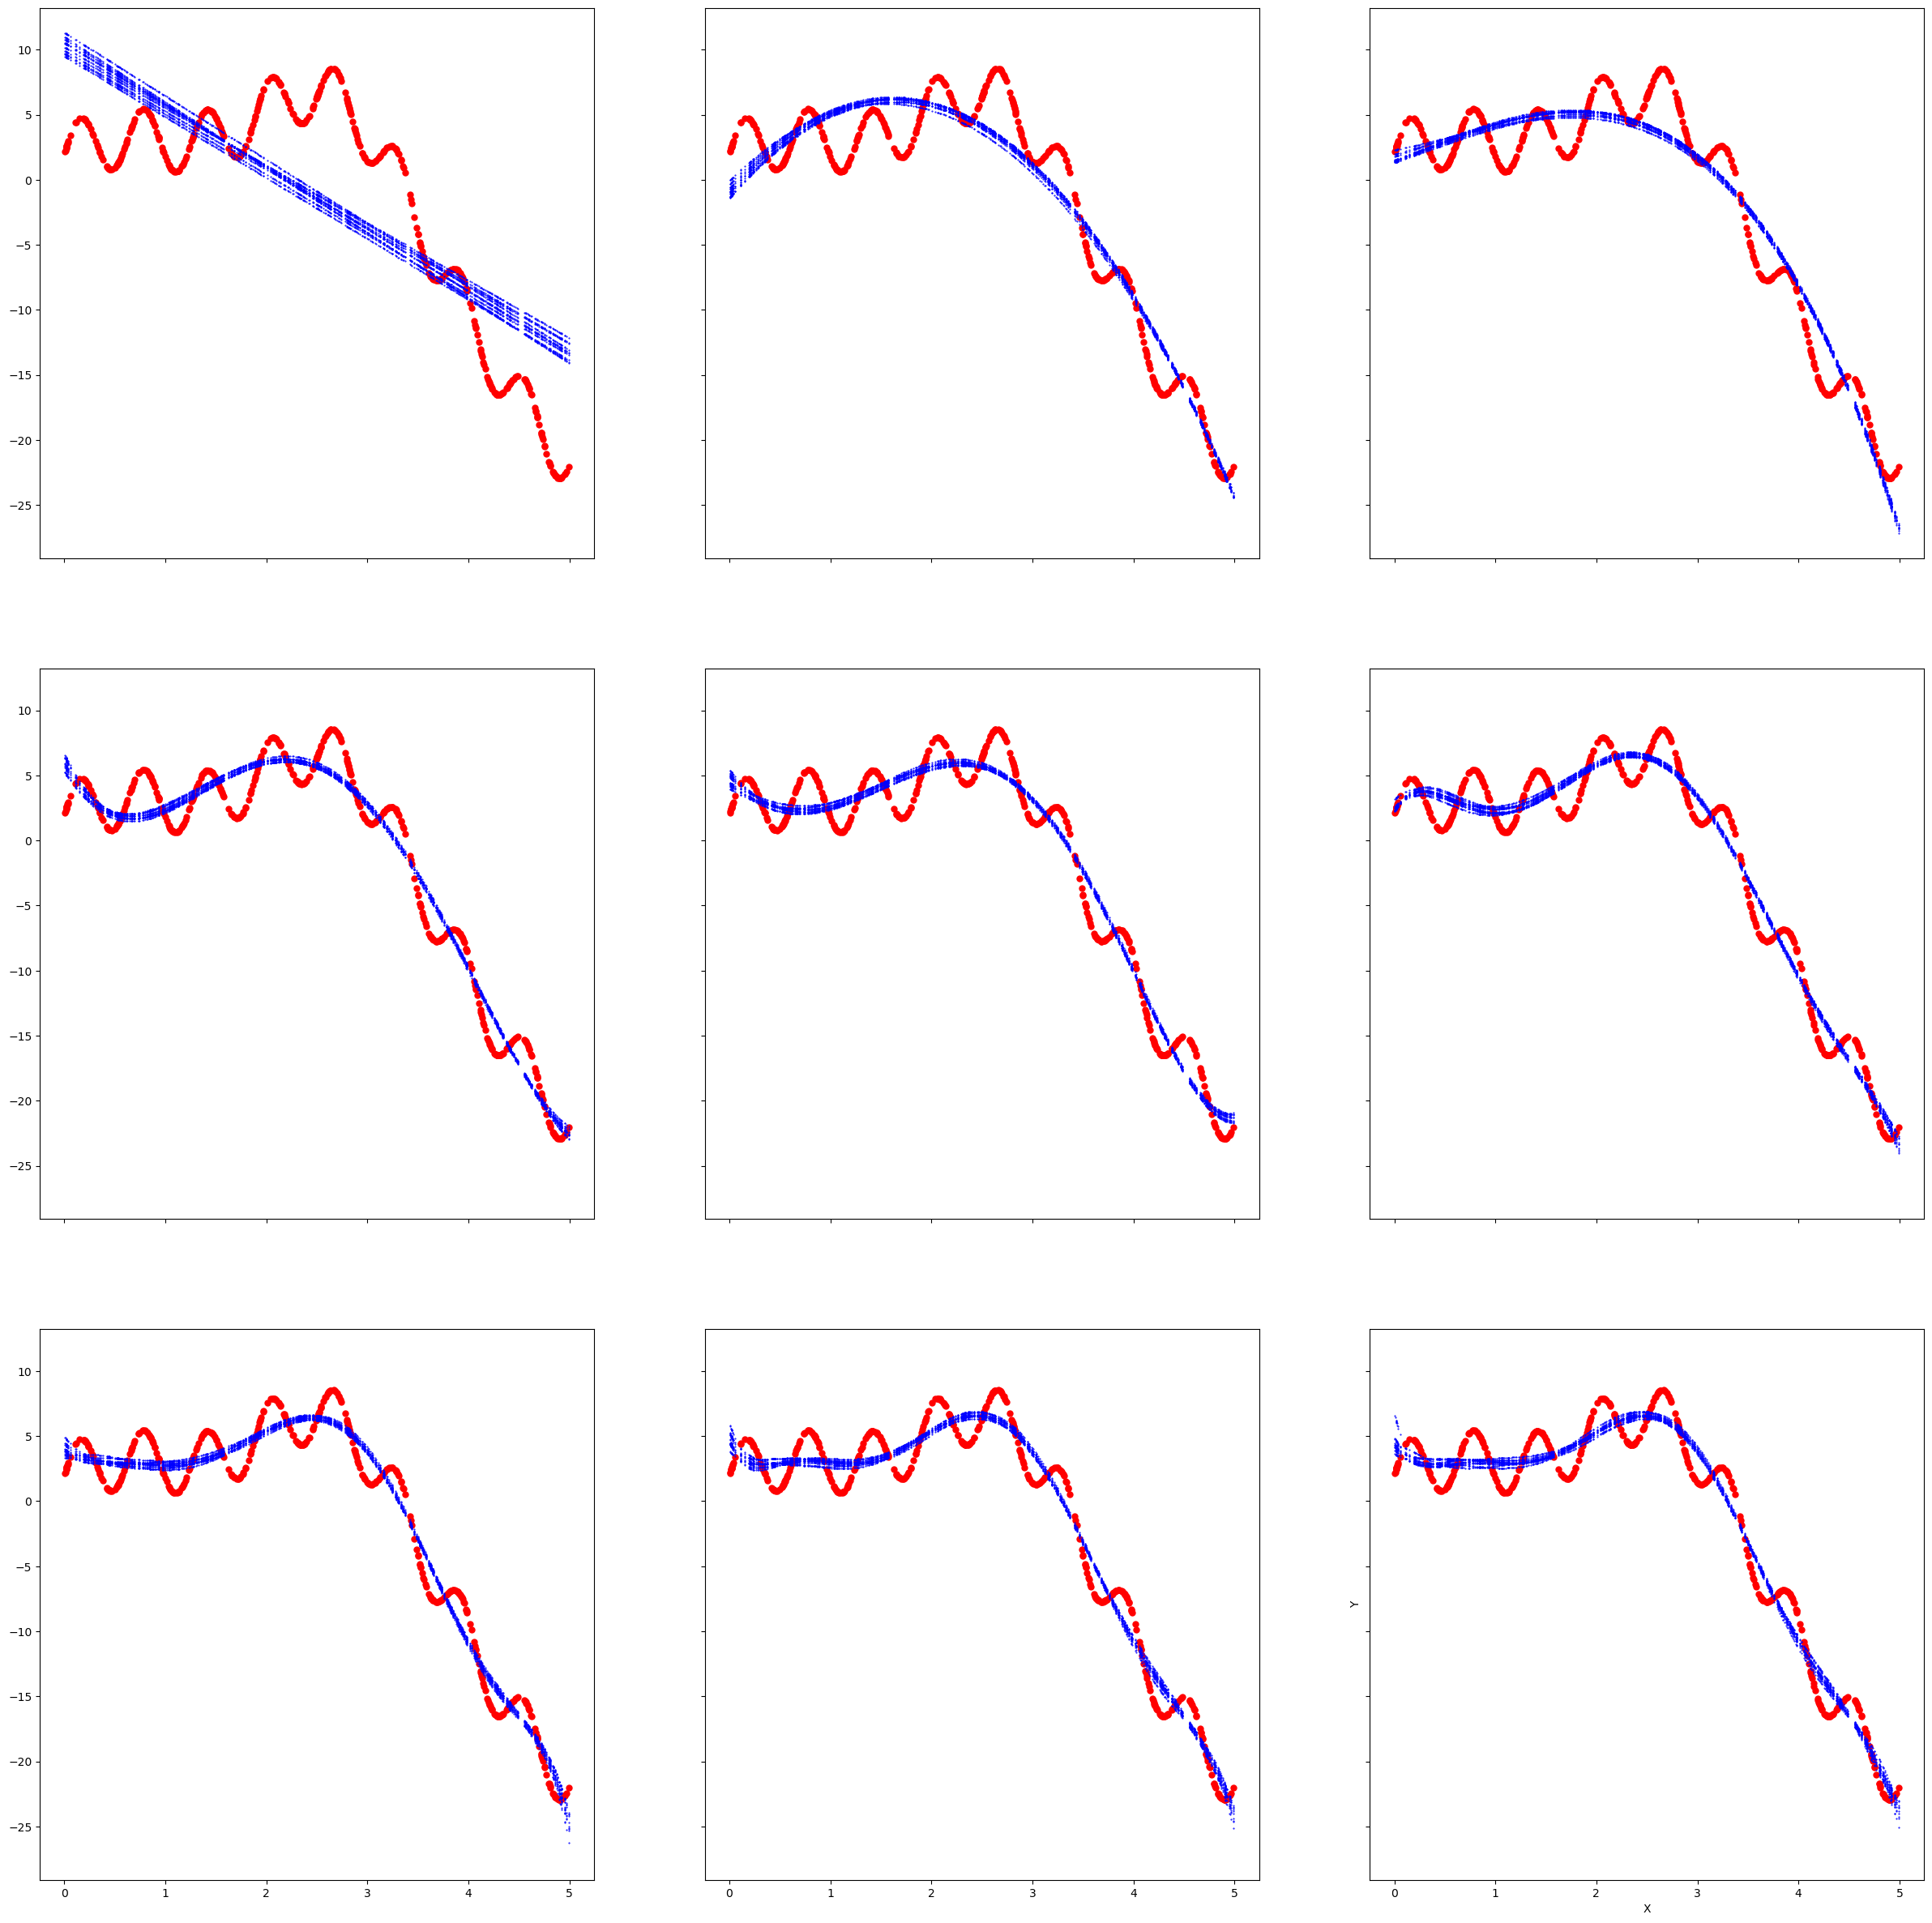

In [24]:
f = plt.figure()
f, axes = plt.subplots(nrows = 3, ncols = 3, sharex=True, sharey = True,figsize=(30,30))
for degree in range(0,9):
    xtemp=np.concatenate([xTest for i in range(10)])
    y_predicted_part=[]
    for i in range(10):
        #TODO Append the prediction of the model with the current degree for each dataset to y_predicted_part
        y_predicted_part.append(y_predicted[i][degree])
    ytemp=np.array(y_predicted_part).reshape(-1)
    axes[int((degree)/3)][int((degree)%3)].plot(xTest, yTest, 'r.',markersize=10)
    axes[int((degree)/3)][int((degree)%3)].plot(xtemp, ytemp,'b.',markersize=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**TASK**:  
- You have been provided with a training data and a testing data. You need to fit the given data to polynomials of degree 1 to 9(both inclusive). 
- Specifically, you have been given 20 subsets of training data containing 400 samples each. For each polynomial, create 20 models trained on the 20 different subsets and find the variance of the predictions on the testing data. Also, find the bias of your trained models on the testing data. Finally plot the bias-variance trade-Off graph. 
- Write your observations in the report with respect to underfitting, overfitting and also comment on the type of data just by looking at the bias-variance plot.

#### Usefull imports

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy
import random
import pickle
import pandas
import matplotlib.pyplot as plt

# STEP 1: LOADING THE DATASET AND VISUALISING IT

Here we load the data_set from multiple files stored in the same directory as the current notebook.

In [26]:
# Get x train dataset
f = open('X_train.pkl', 'rb')
X_train_data_sets = pickle.load(f)
f.close()
# Get y train dataset
f = open('Y_train.pkl', 'rb')
Y_train_data_sets = pickle.load(f)
f.close()
# Get x test dataset
f = open('X_test.pkl', 'rb')
xTest = pickle.load(f)
f.close()
# Get y test dataset
f = open('Fx_test.pkl', 'rb')
yTest = pickle.load(f)
f.close()

In [27]:
if(debug == 1): #TODO: Print traning dataset and testing dataset and the length of the training dataset
    print('Training data: ')
    print('X_train dataset: ', X_train_data_sets)
    print('Y_train dataset: ', Y_train_data_sets) 
    print('--------------------------------------------------------------')
    print('Testing data: ') 
    print('X test: ',xTest) 
    print('y test: ',yTest)
    print (len(X_train_data_sets))


Training data: 
X_train dataset:  [[ 39.18236666  -7.08833508 -39.80170787 ... -39.91722818 -32.1922517
  -34.59690847]
 [  3.65397031 -23.00911309  30.09446289 ...  36.35403106   8.9512678
   22.57524484]
 [ 33.67587032 -19.08946213  18.09819893 ...  41.5257231   44.8411174
  -17.78096981]
 ...
 [ 44.49194225 -45.57639101  46.74878519 ... -26.08145893 -42.46265146
    2.37850948]
 [-10.09926802  30.83303774   5.34475387 ...  -2.19280553 -11.05173998
  -25.4291418 ]
 [ 46.30665334  11.60395221  -2.90249351 ...  39.35145933  12.8210855
  -28.09216372]]
Y_train dataset:  [[ 4765.40421584  3782.0037892    743.90527908 ... -5630.24658622
  -5005.45253661 -1666.82753026]
 [-3600.01952329  -529.7713827   4728.6217621  ...  7748.05032463
   2151.38983951  4138.663436  ]
 [ -230.89980782  3807.45803898  1326.9478248  ...  1423.5623096
   1416.66827697  1152.73496602]
 ...
 [ 6100.39046251 -3699.71674087  7845.91842837 ... -3632.74554305
  -2332.88565019  2529.55917508]
 [ 2135.21629871  1164.8

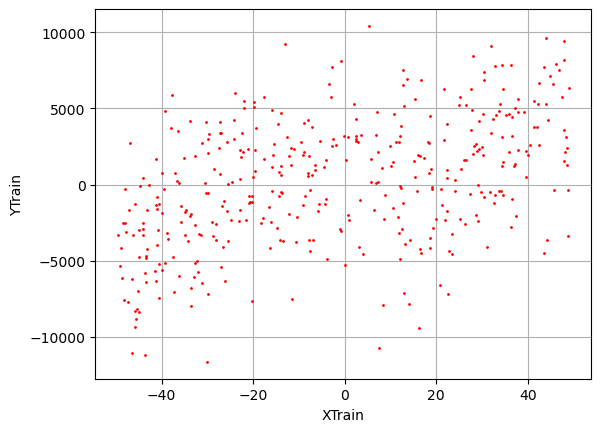

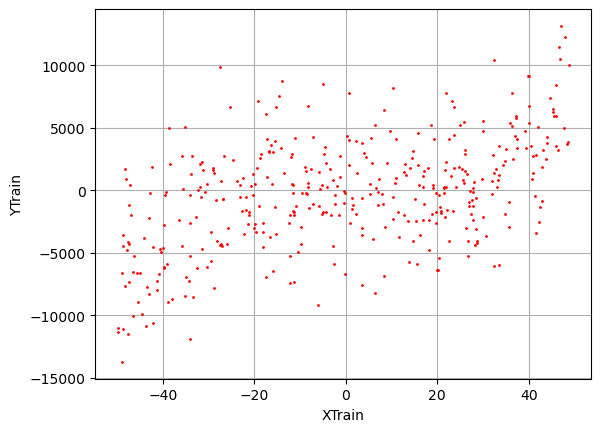

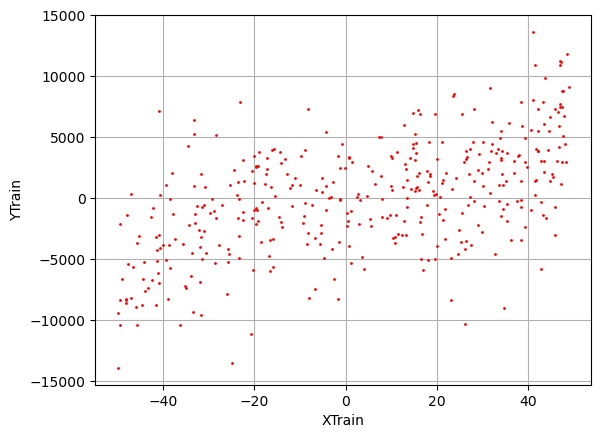

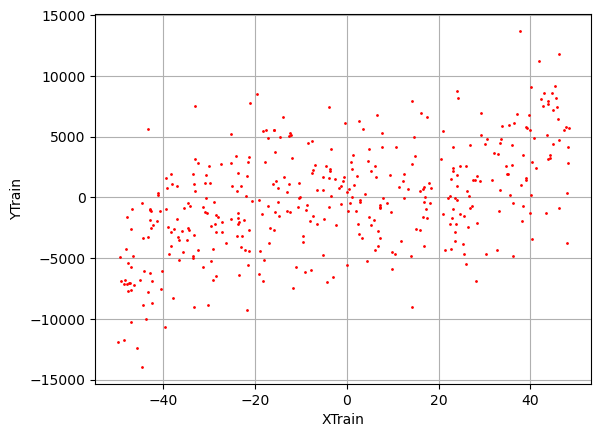

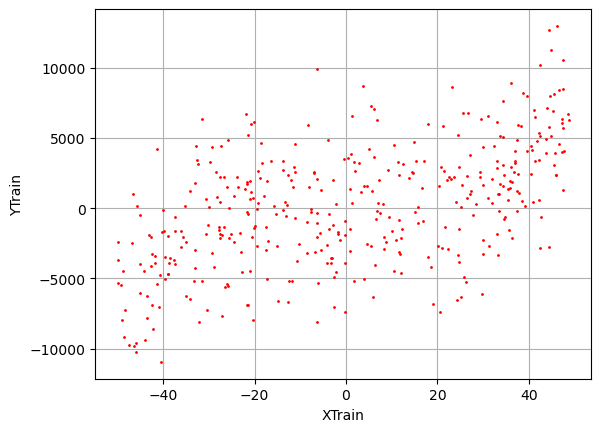

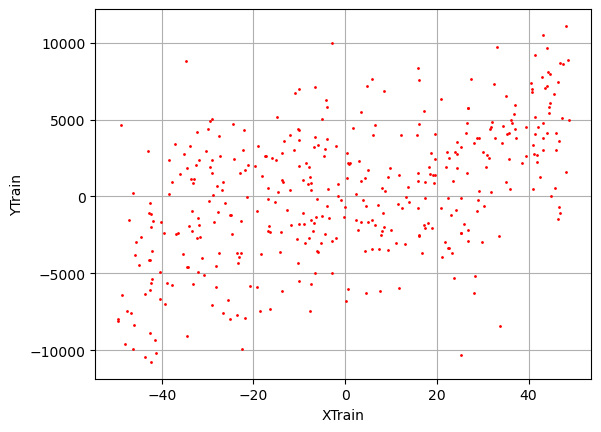

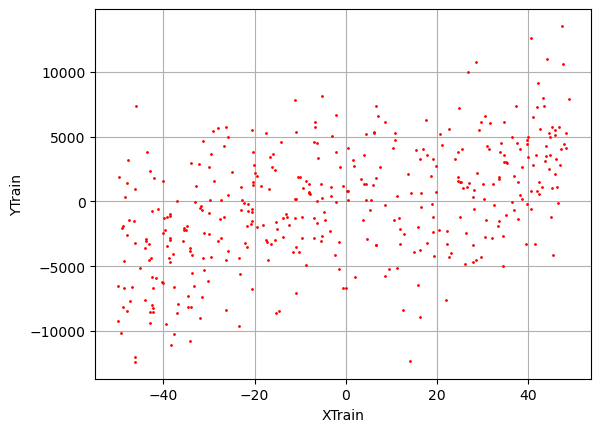

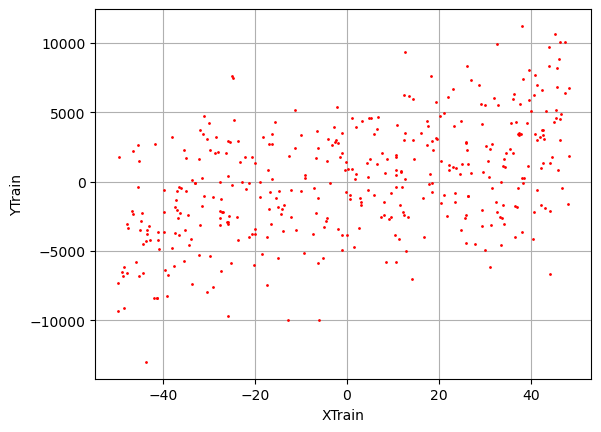

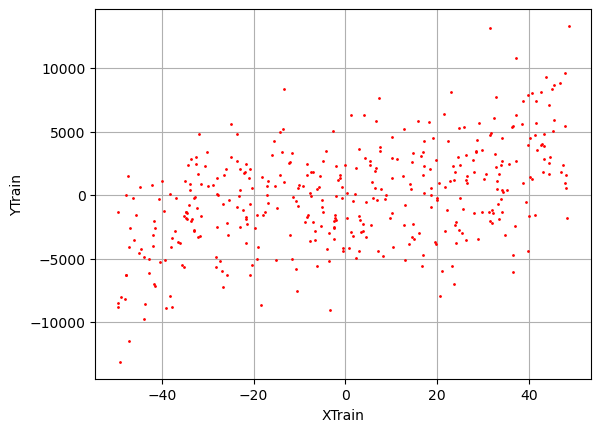

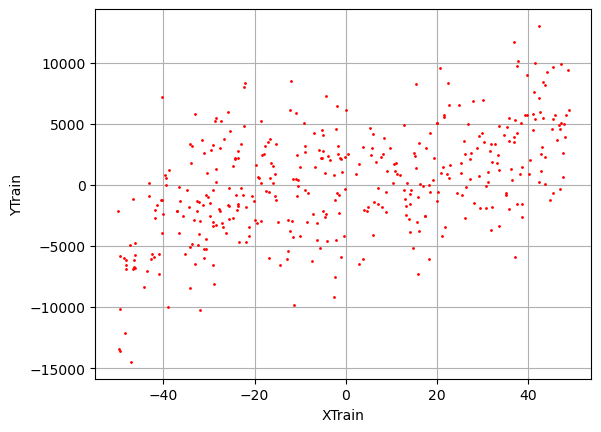

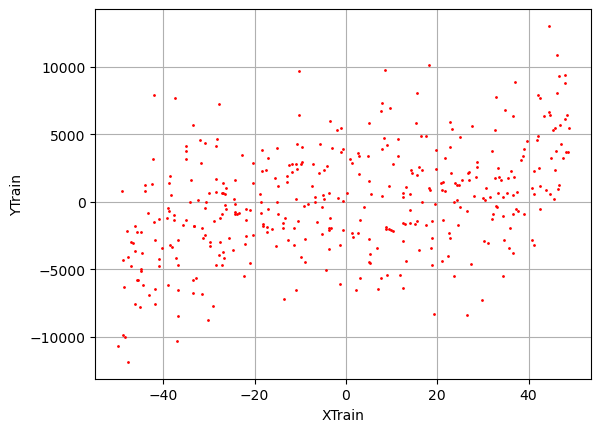

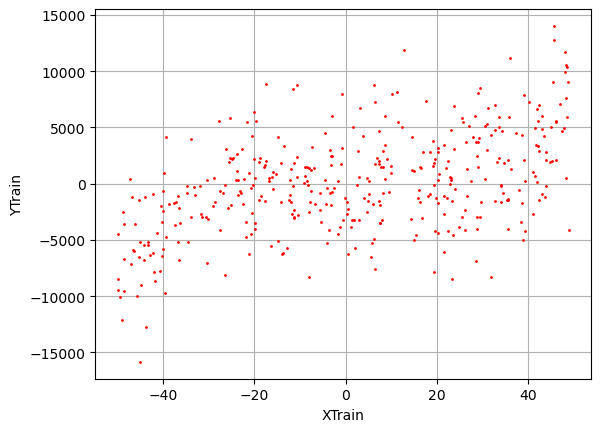

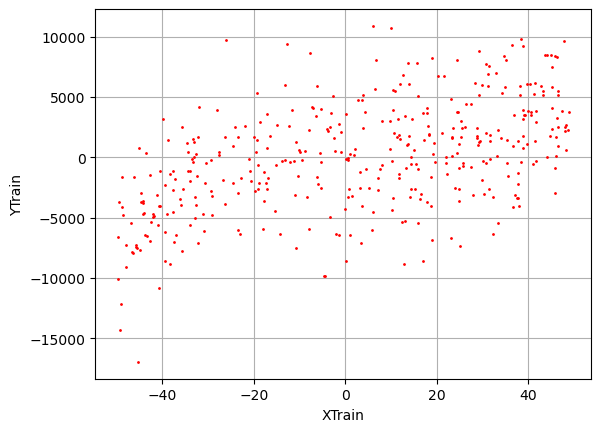

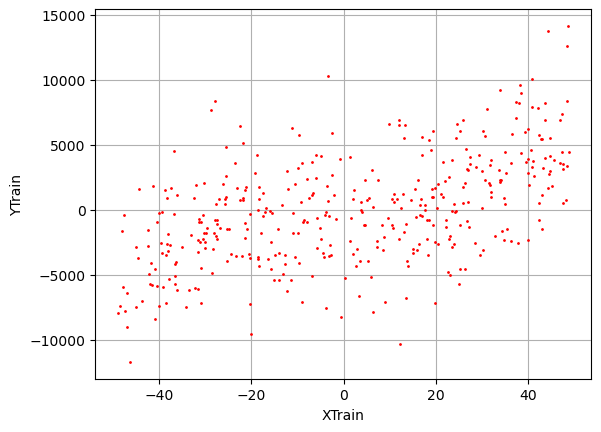

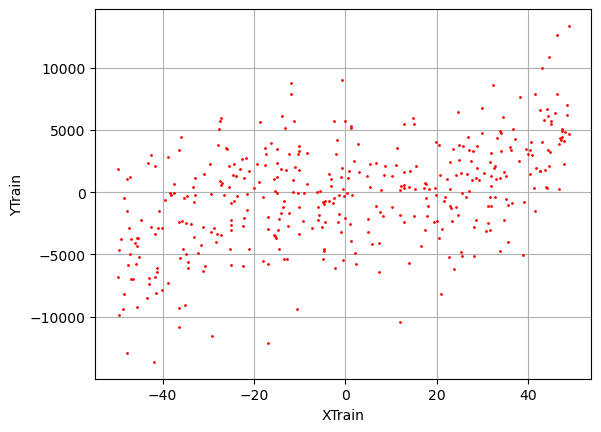

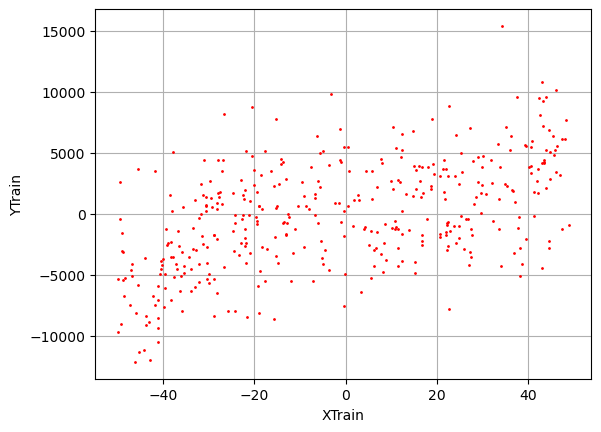

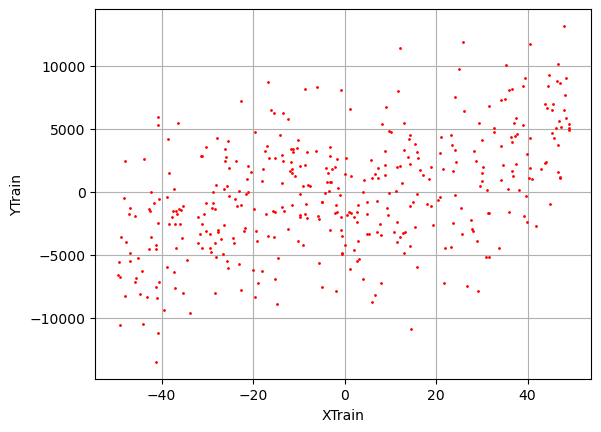

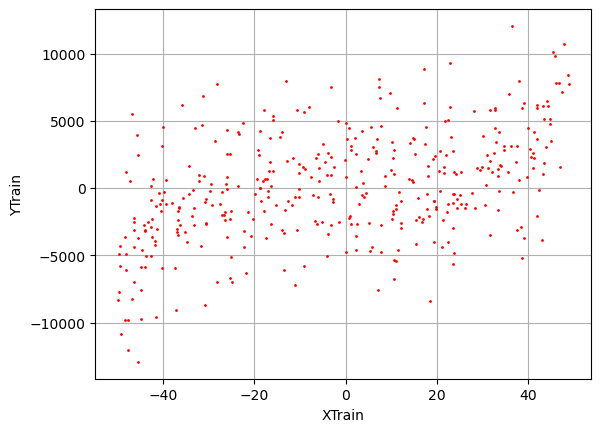

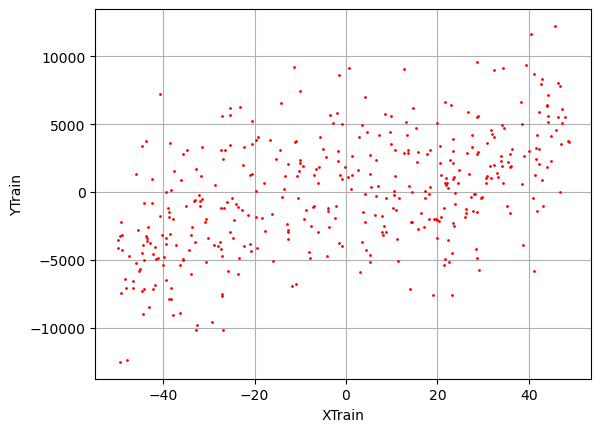

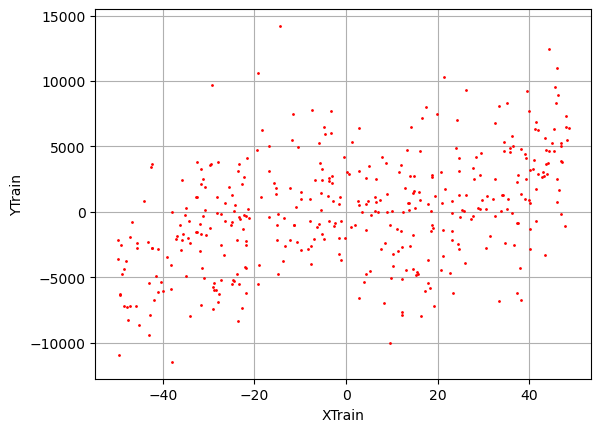

In [28]:
for i in range (0,20): 
    plt.figure()
    plt.plot(X_train_data_sets[i],Y_train_data_sets[i],"r.",markersize=2) 
    plt.grid()
    plt.xlabel('XTrain') 
    plt.ylabel('YTrain')
    plt.show()



Text(0, 0.5, 'YTest')

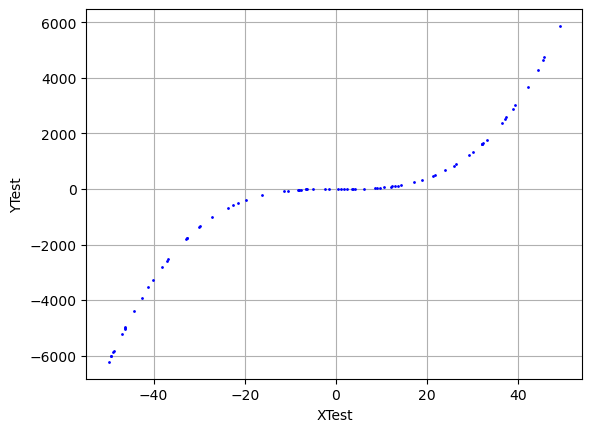

In [29]:
#testing data 
plt.plot(xTest,yTest,"b.",markersize=2) 
plt.grid() 
plt.xlabel('XTest') 
plt.ylabel('YTest')

## Plotting A Graph Of The Trained Polynomial Regression Model

TRAINING SET  0


<Figure size 640x480 with 0 Axes>

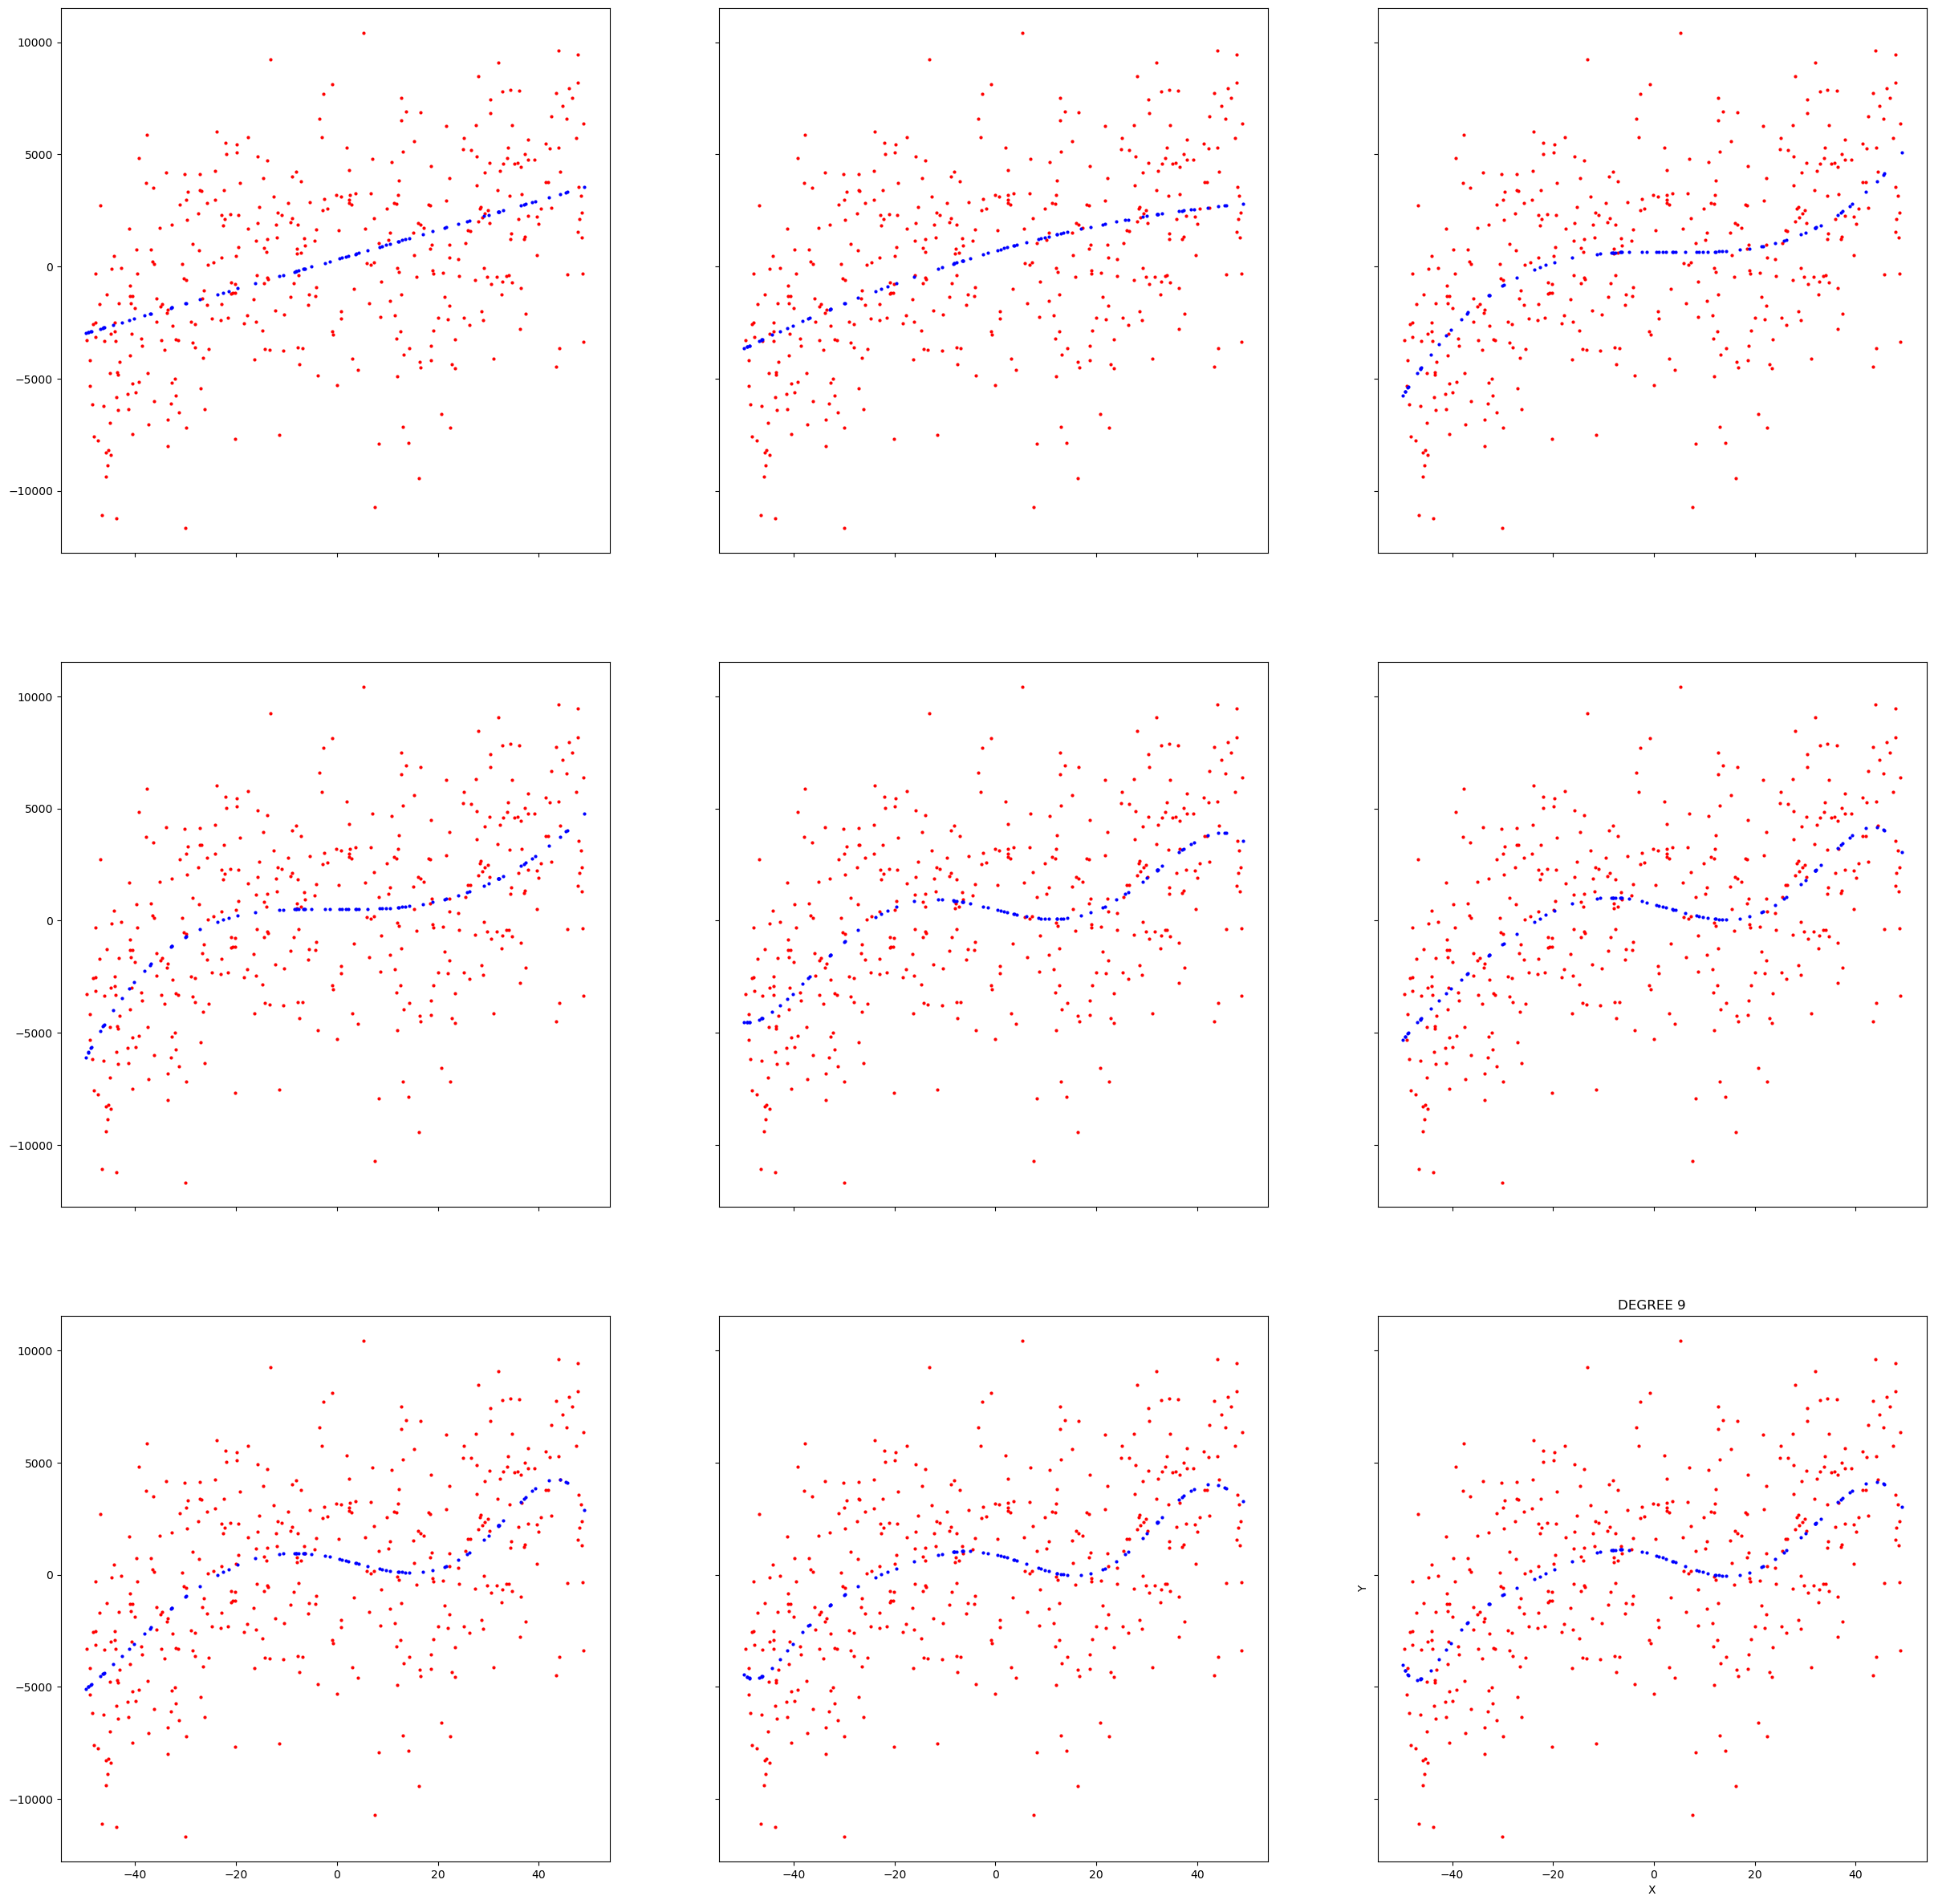

TRAINING SET  1


<Figure size 640x480 with 0 Axes>

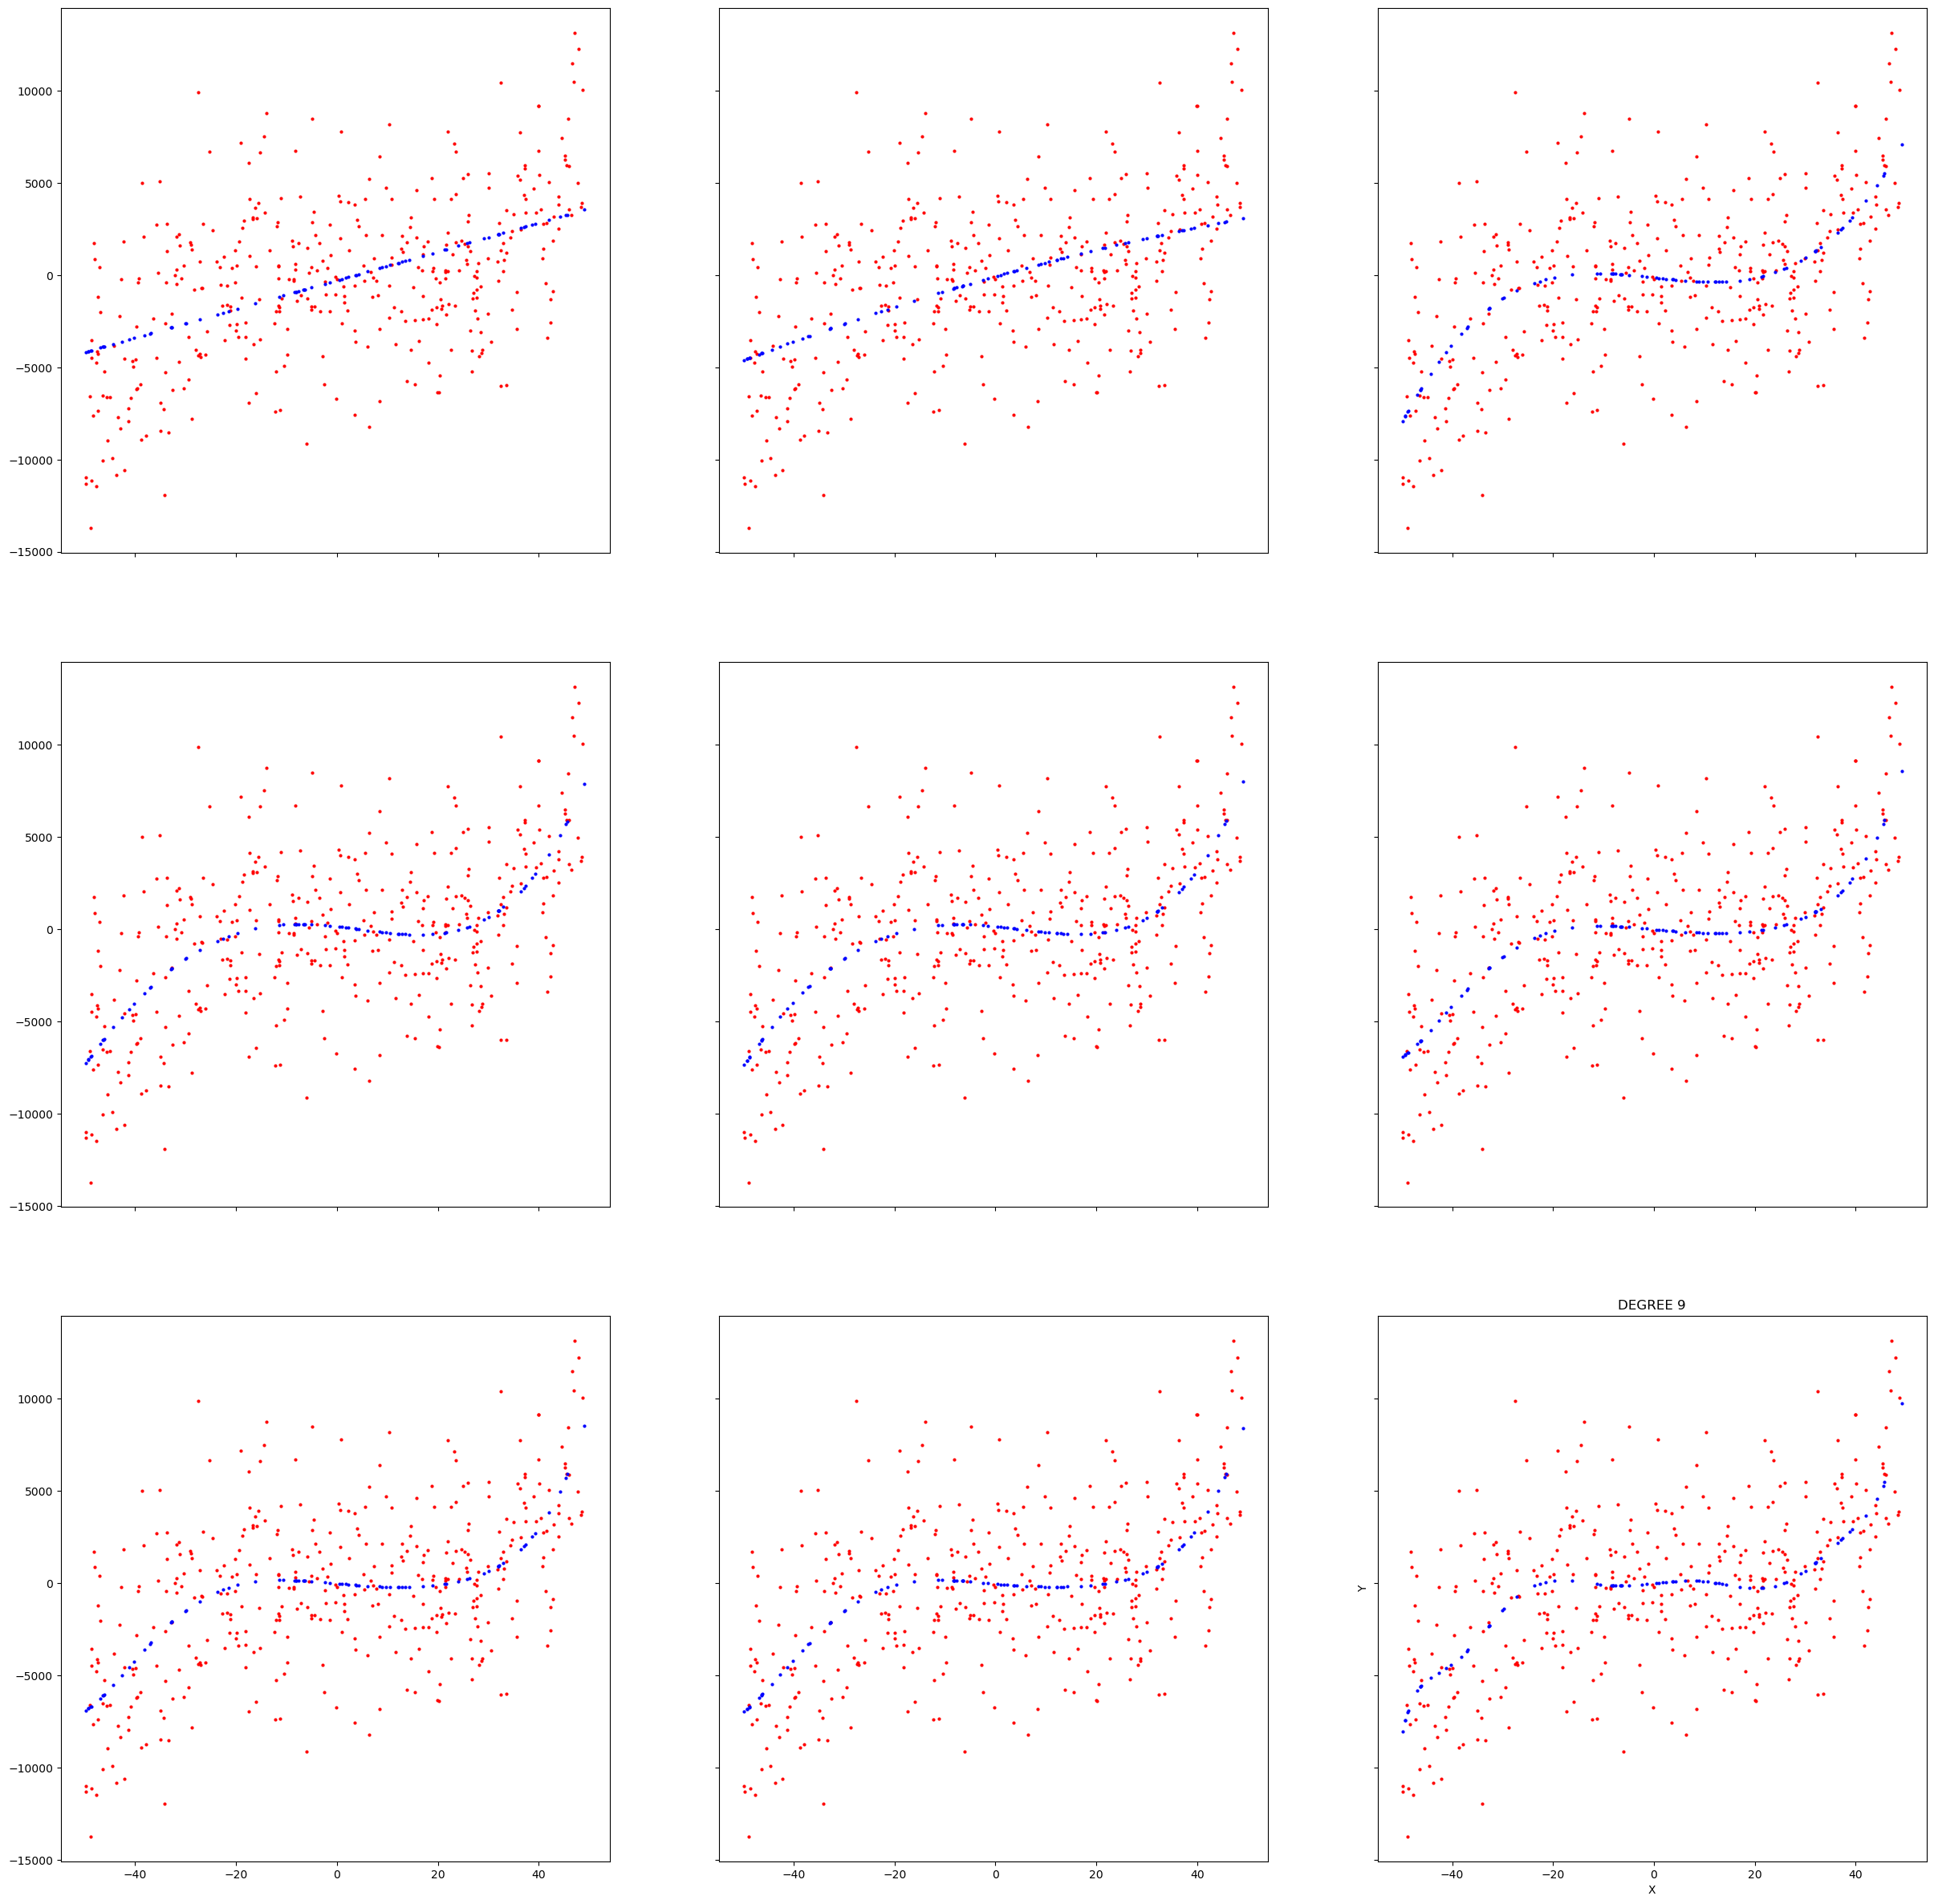

TRAINING SET  2


<Figure size 640x480 with 0 Axes>

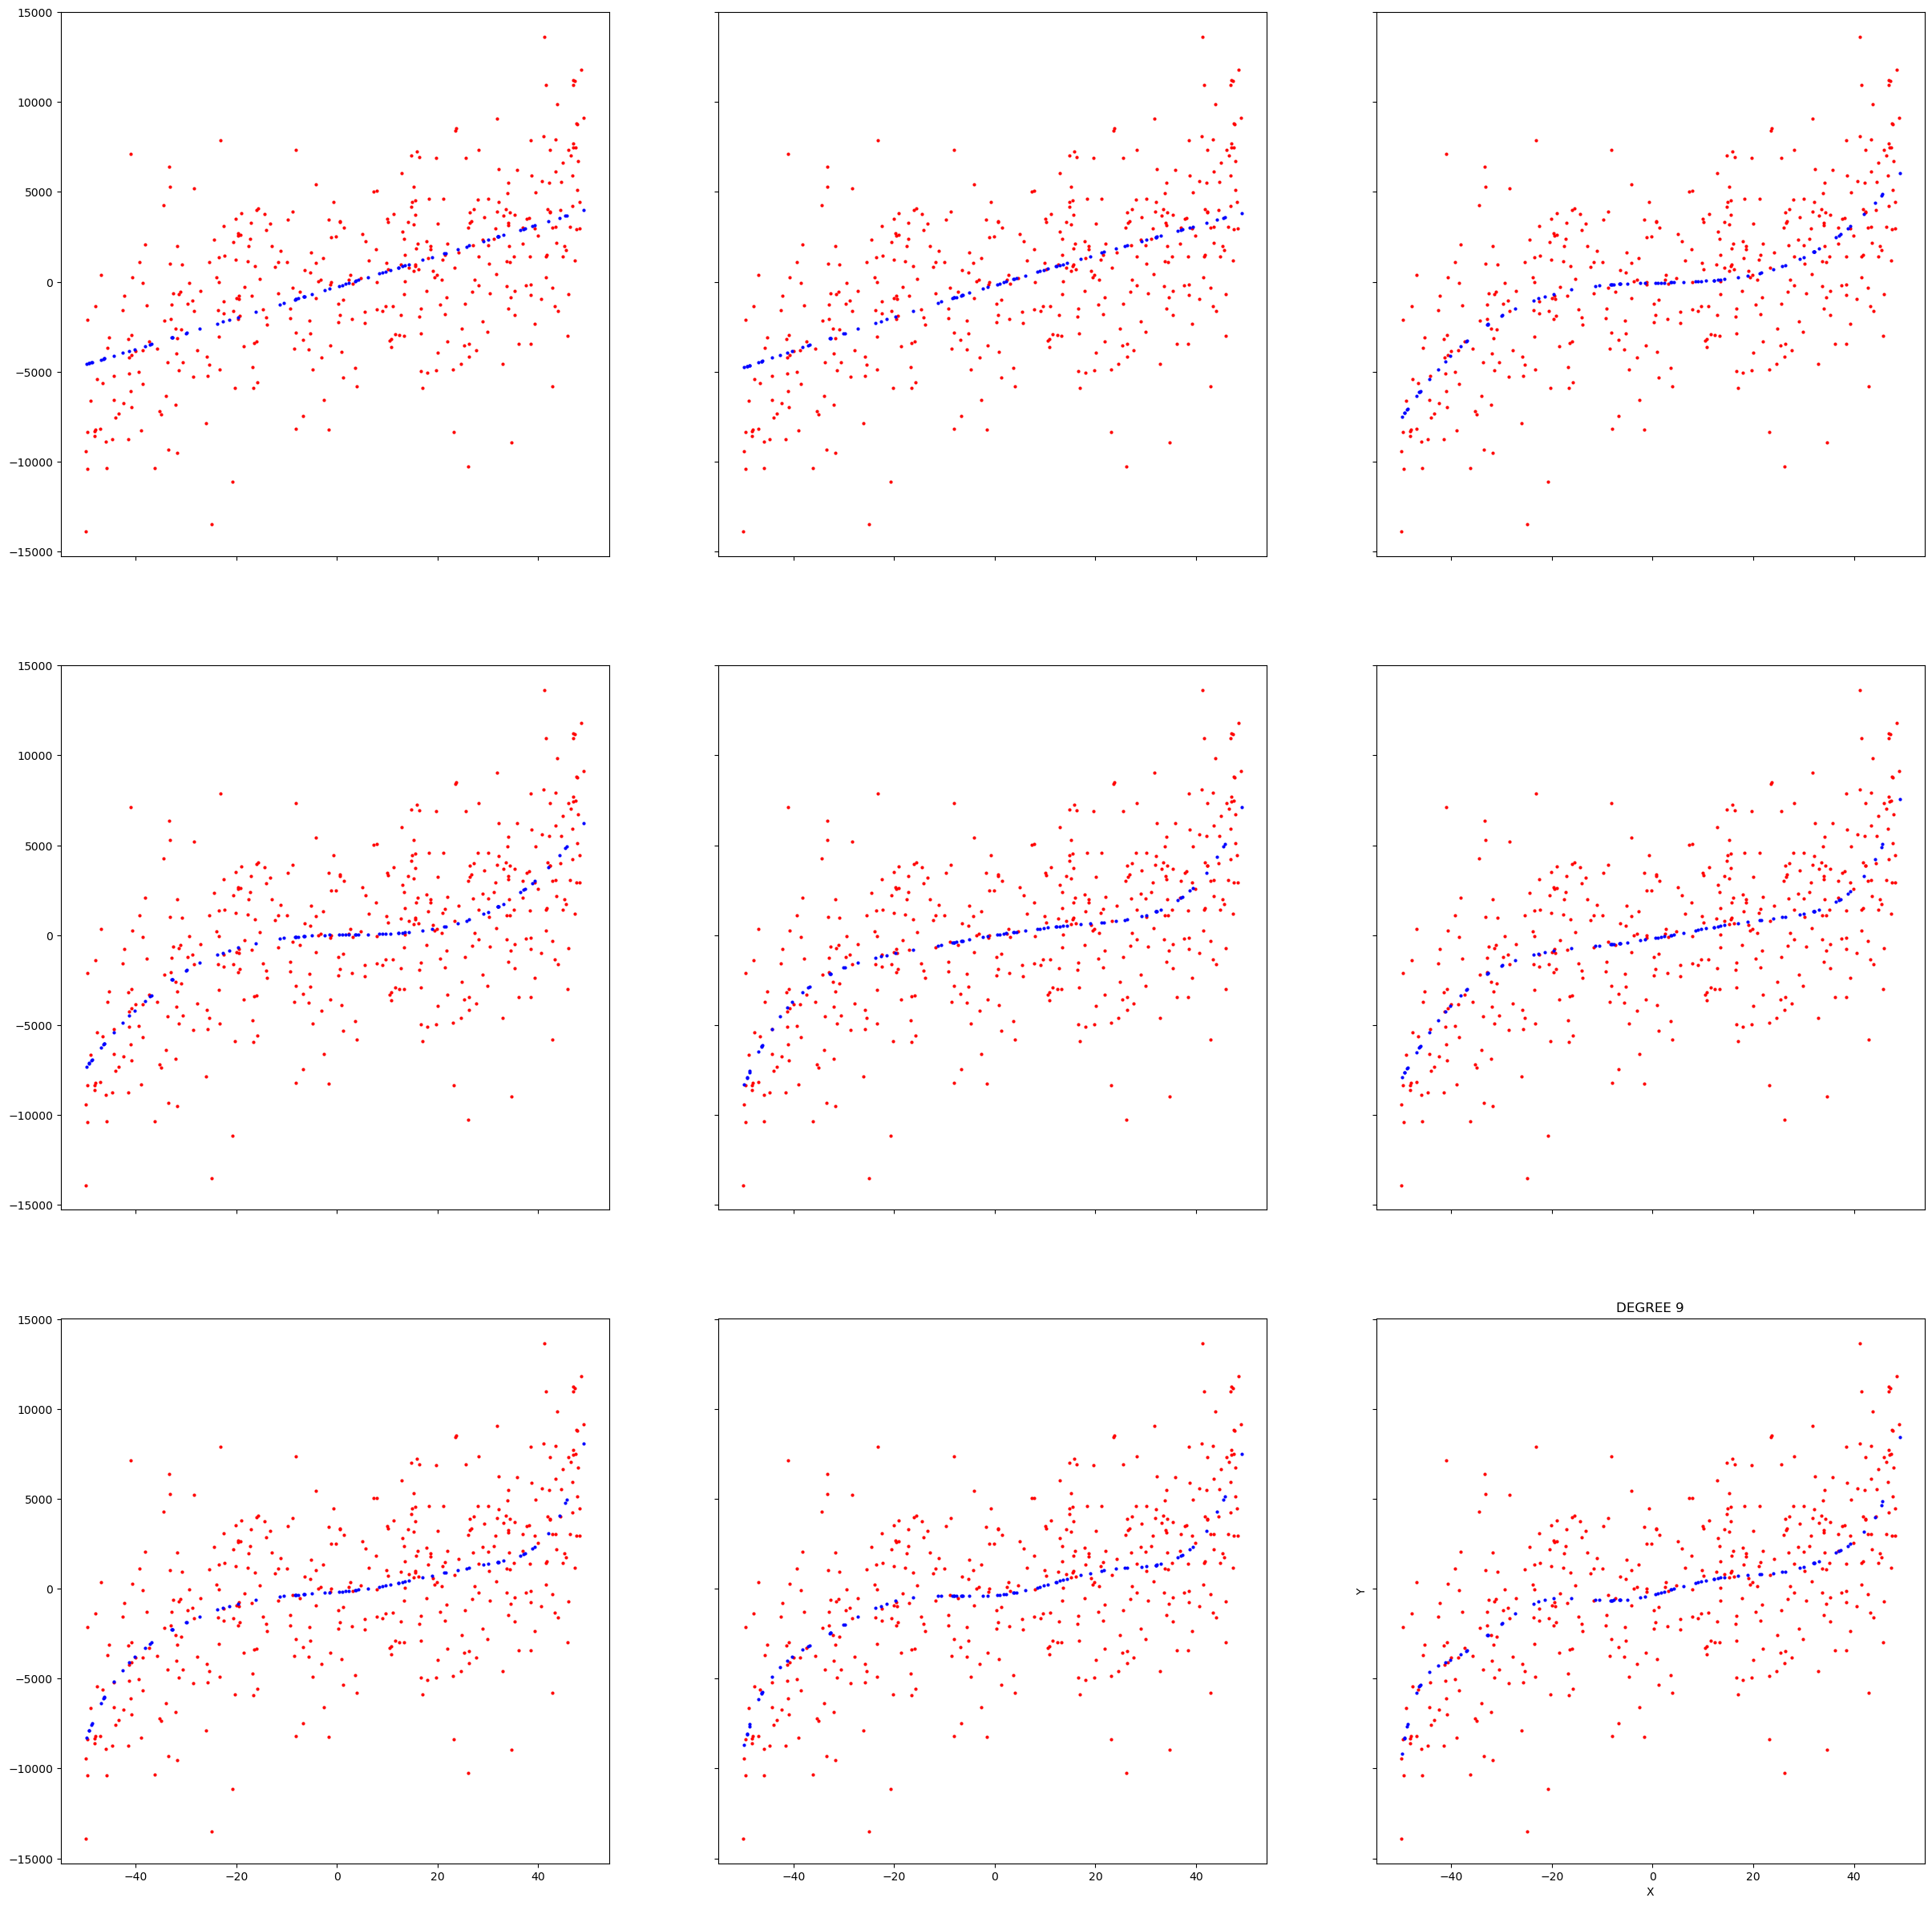

TRAINING SET  3


<Figure size 640x480 with 0 Axes>

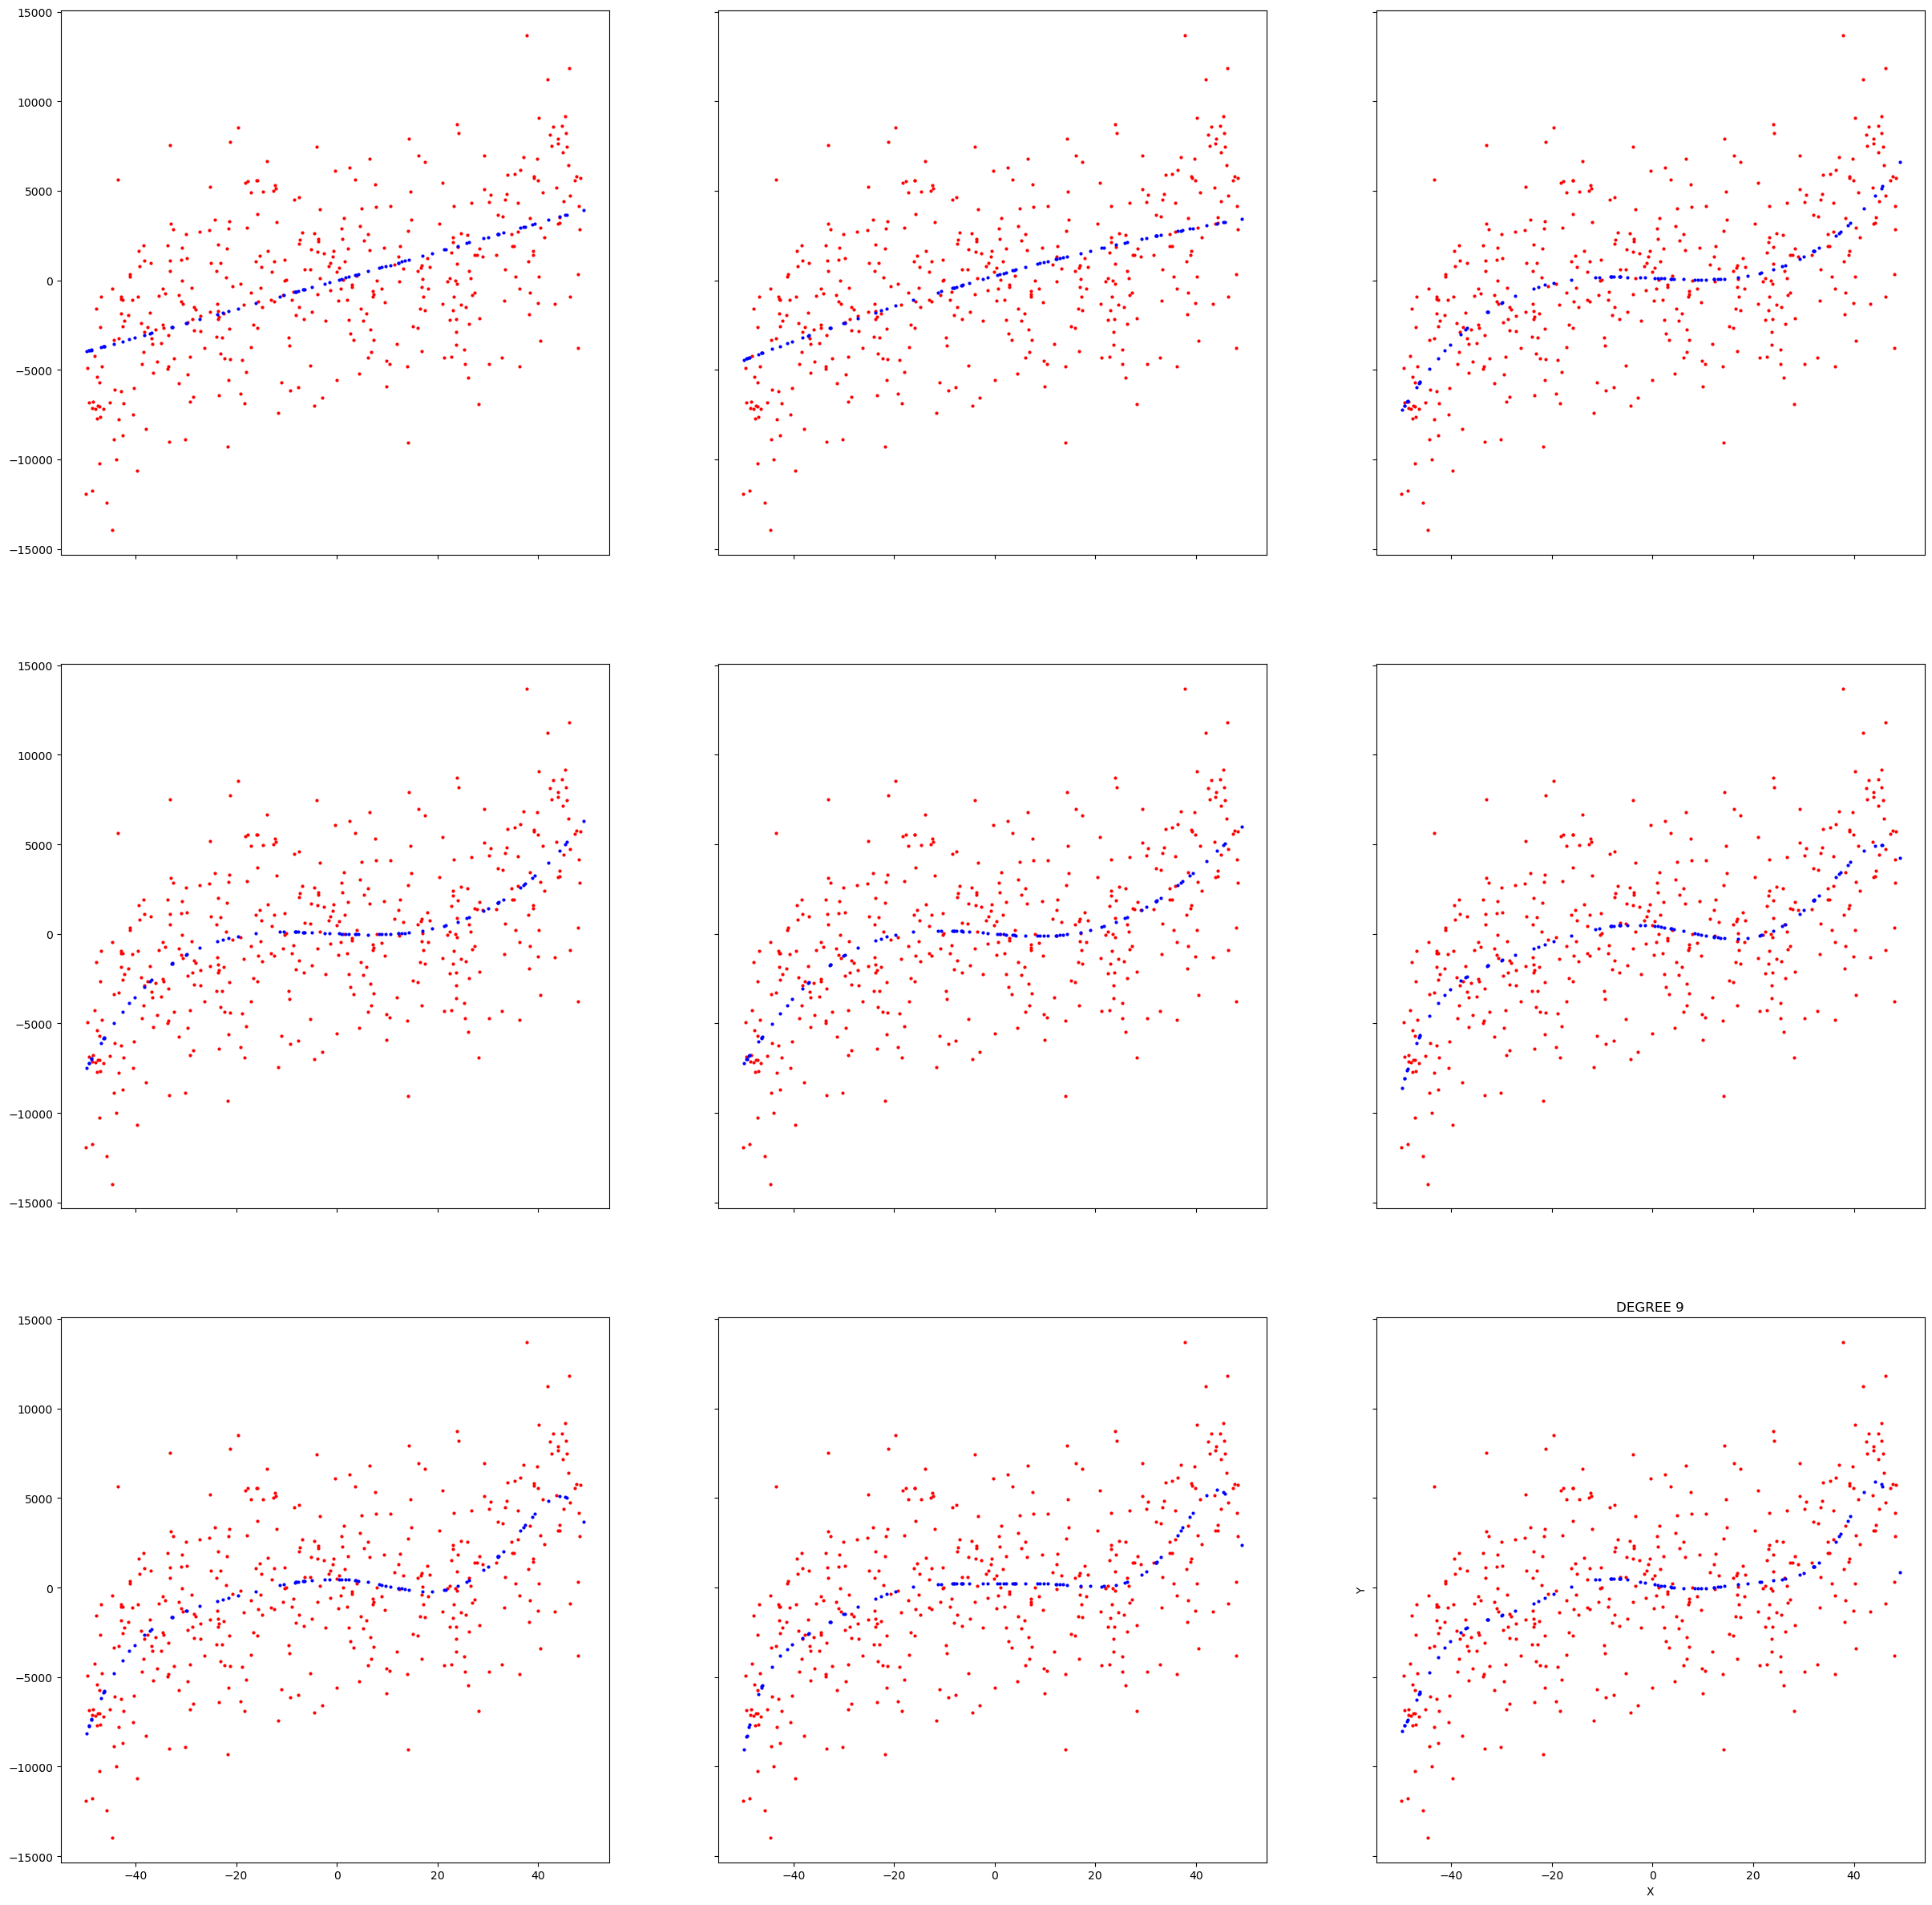

TRAINING SET  4


<Figure size 640x480 with 0 Axes>

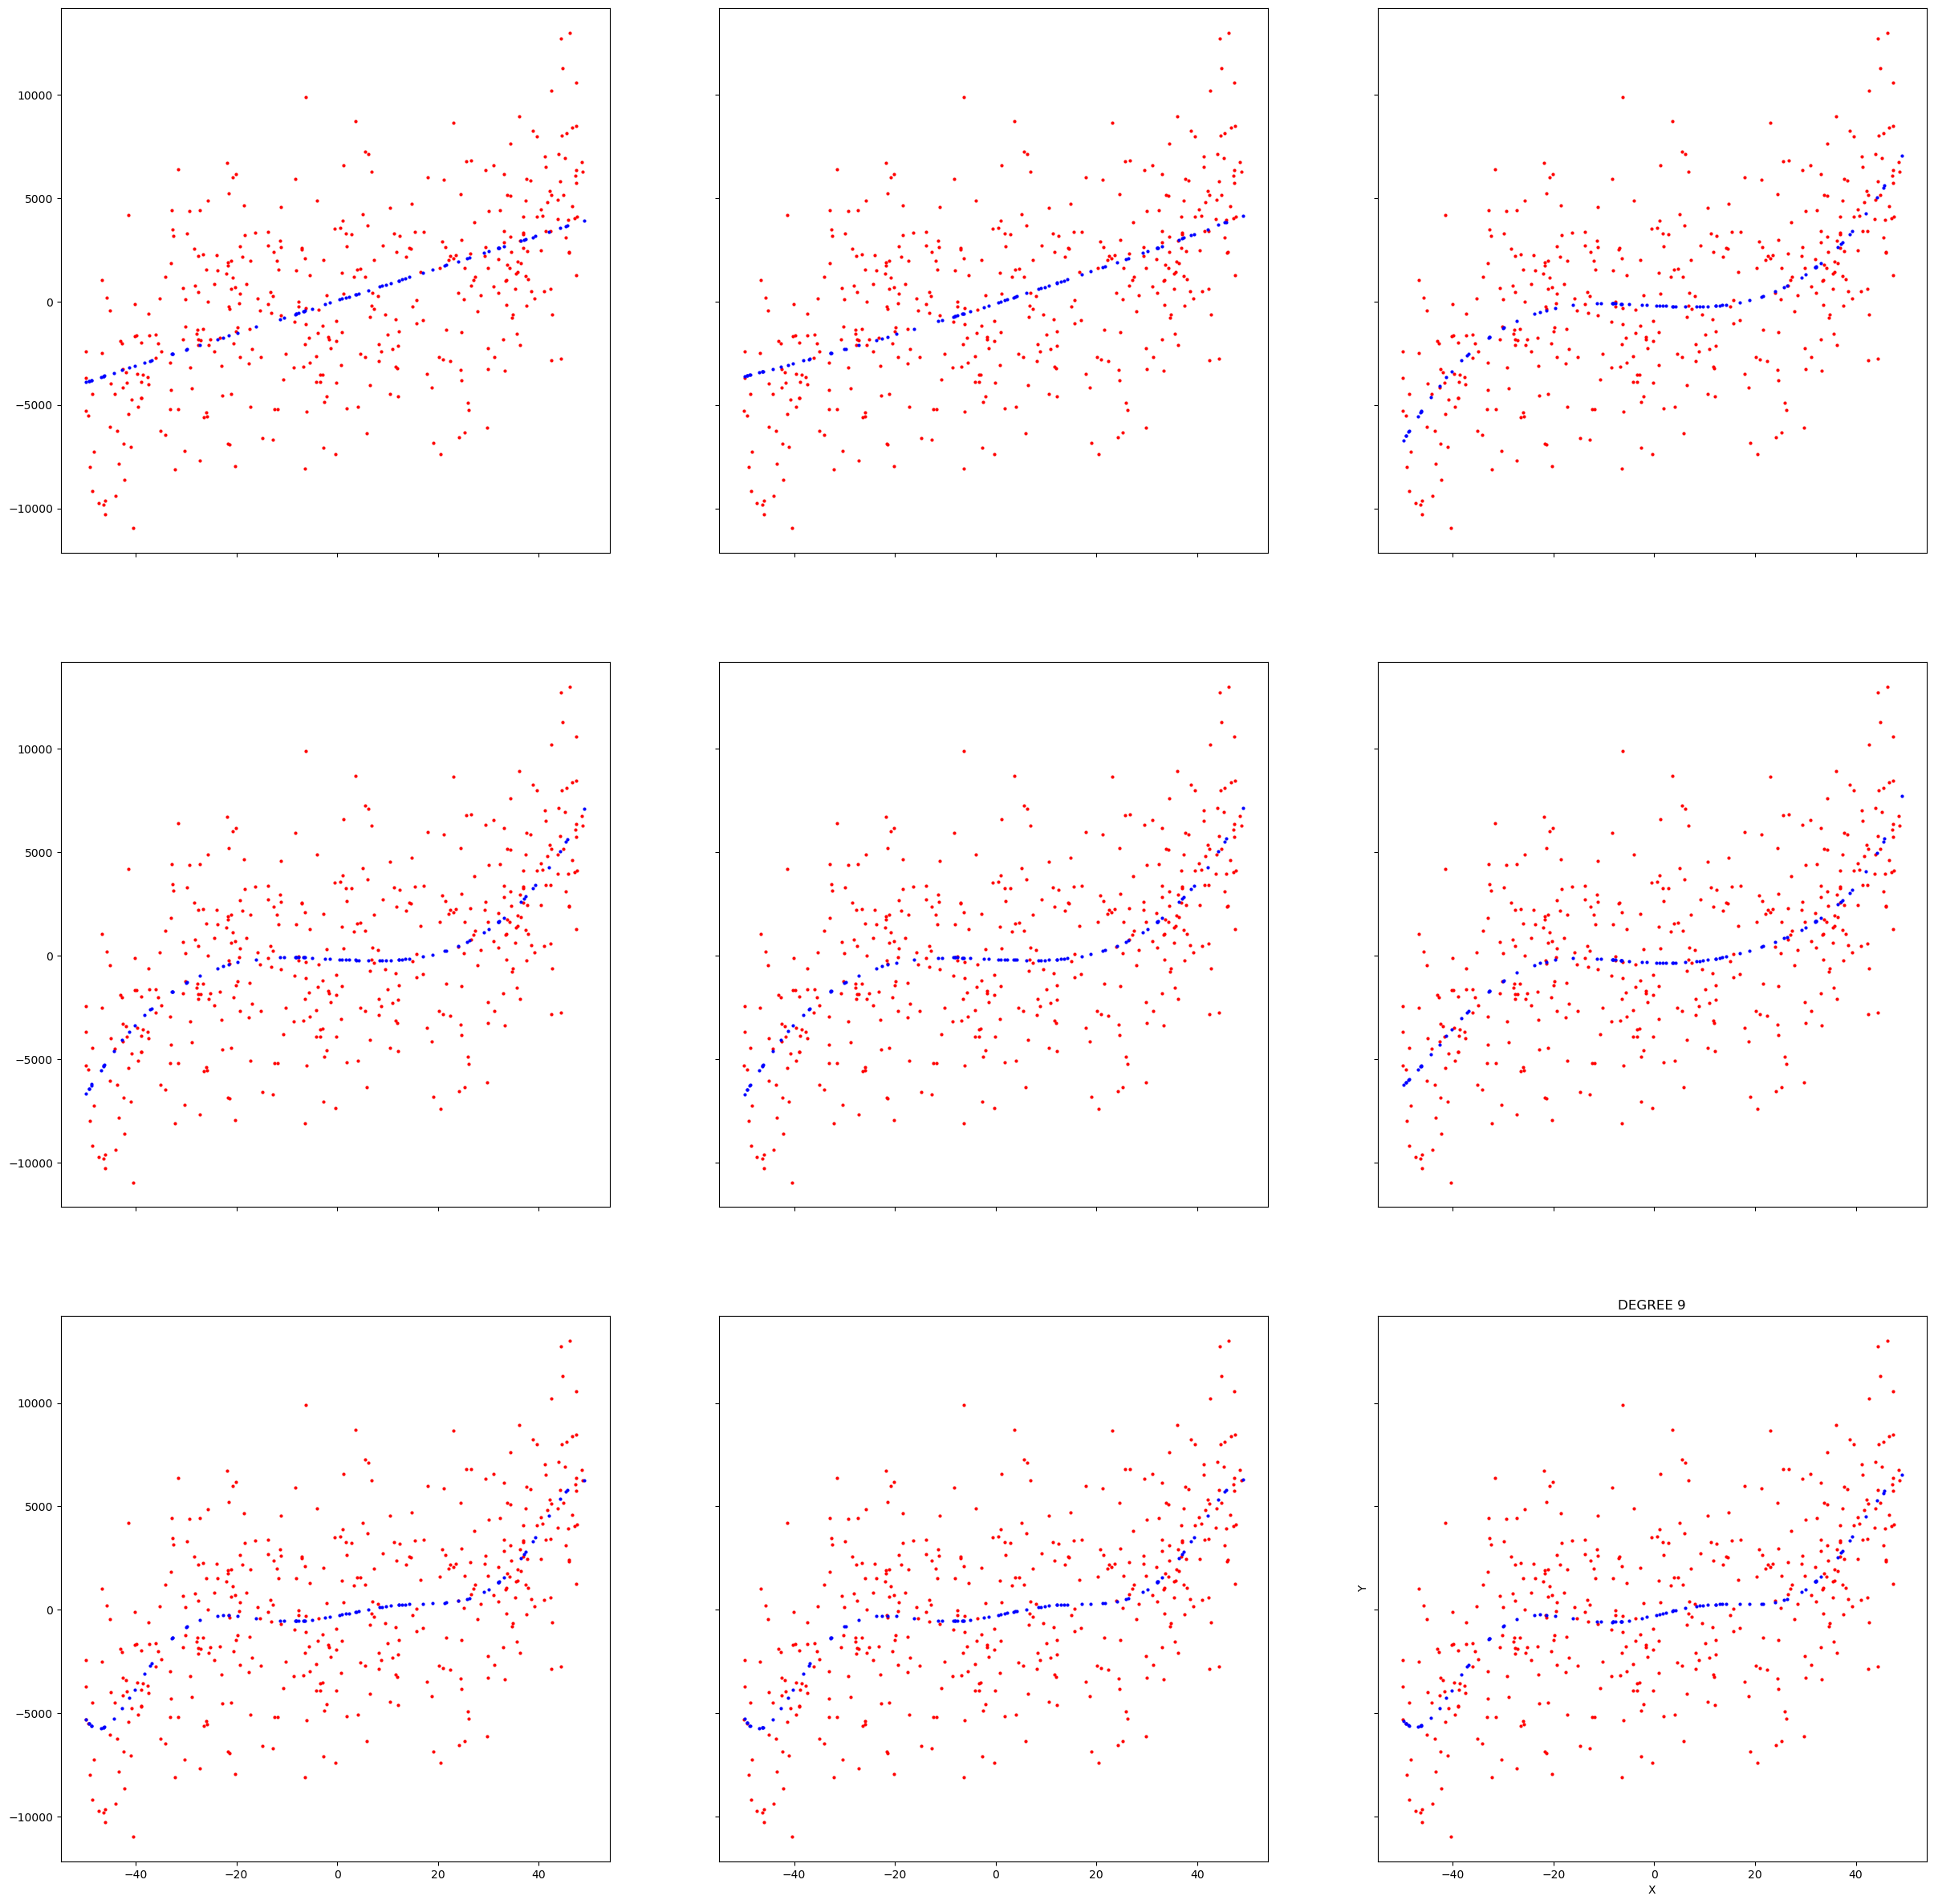

TRAINING SET  5


<Figure size 640x480 with 0 Axes>

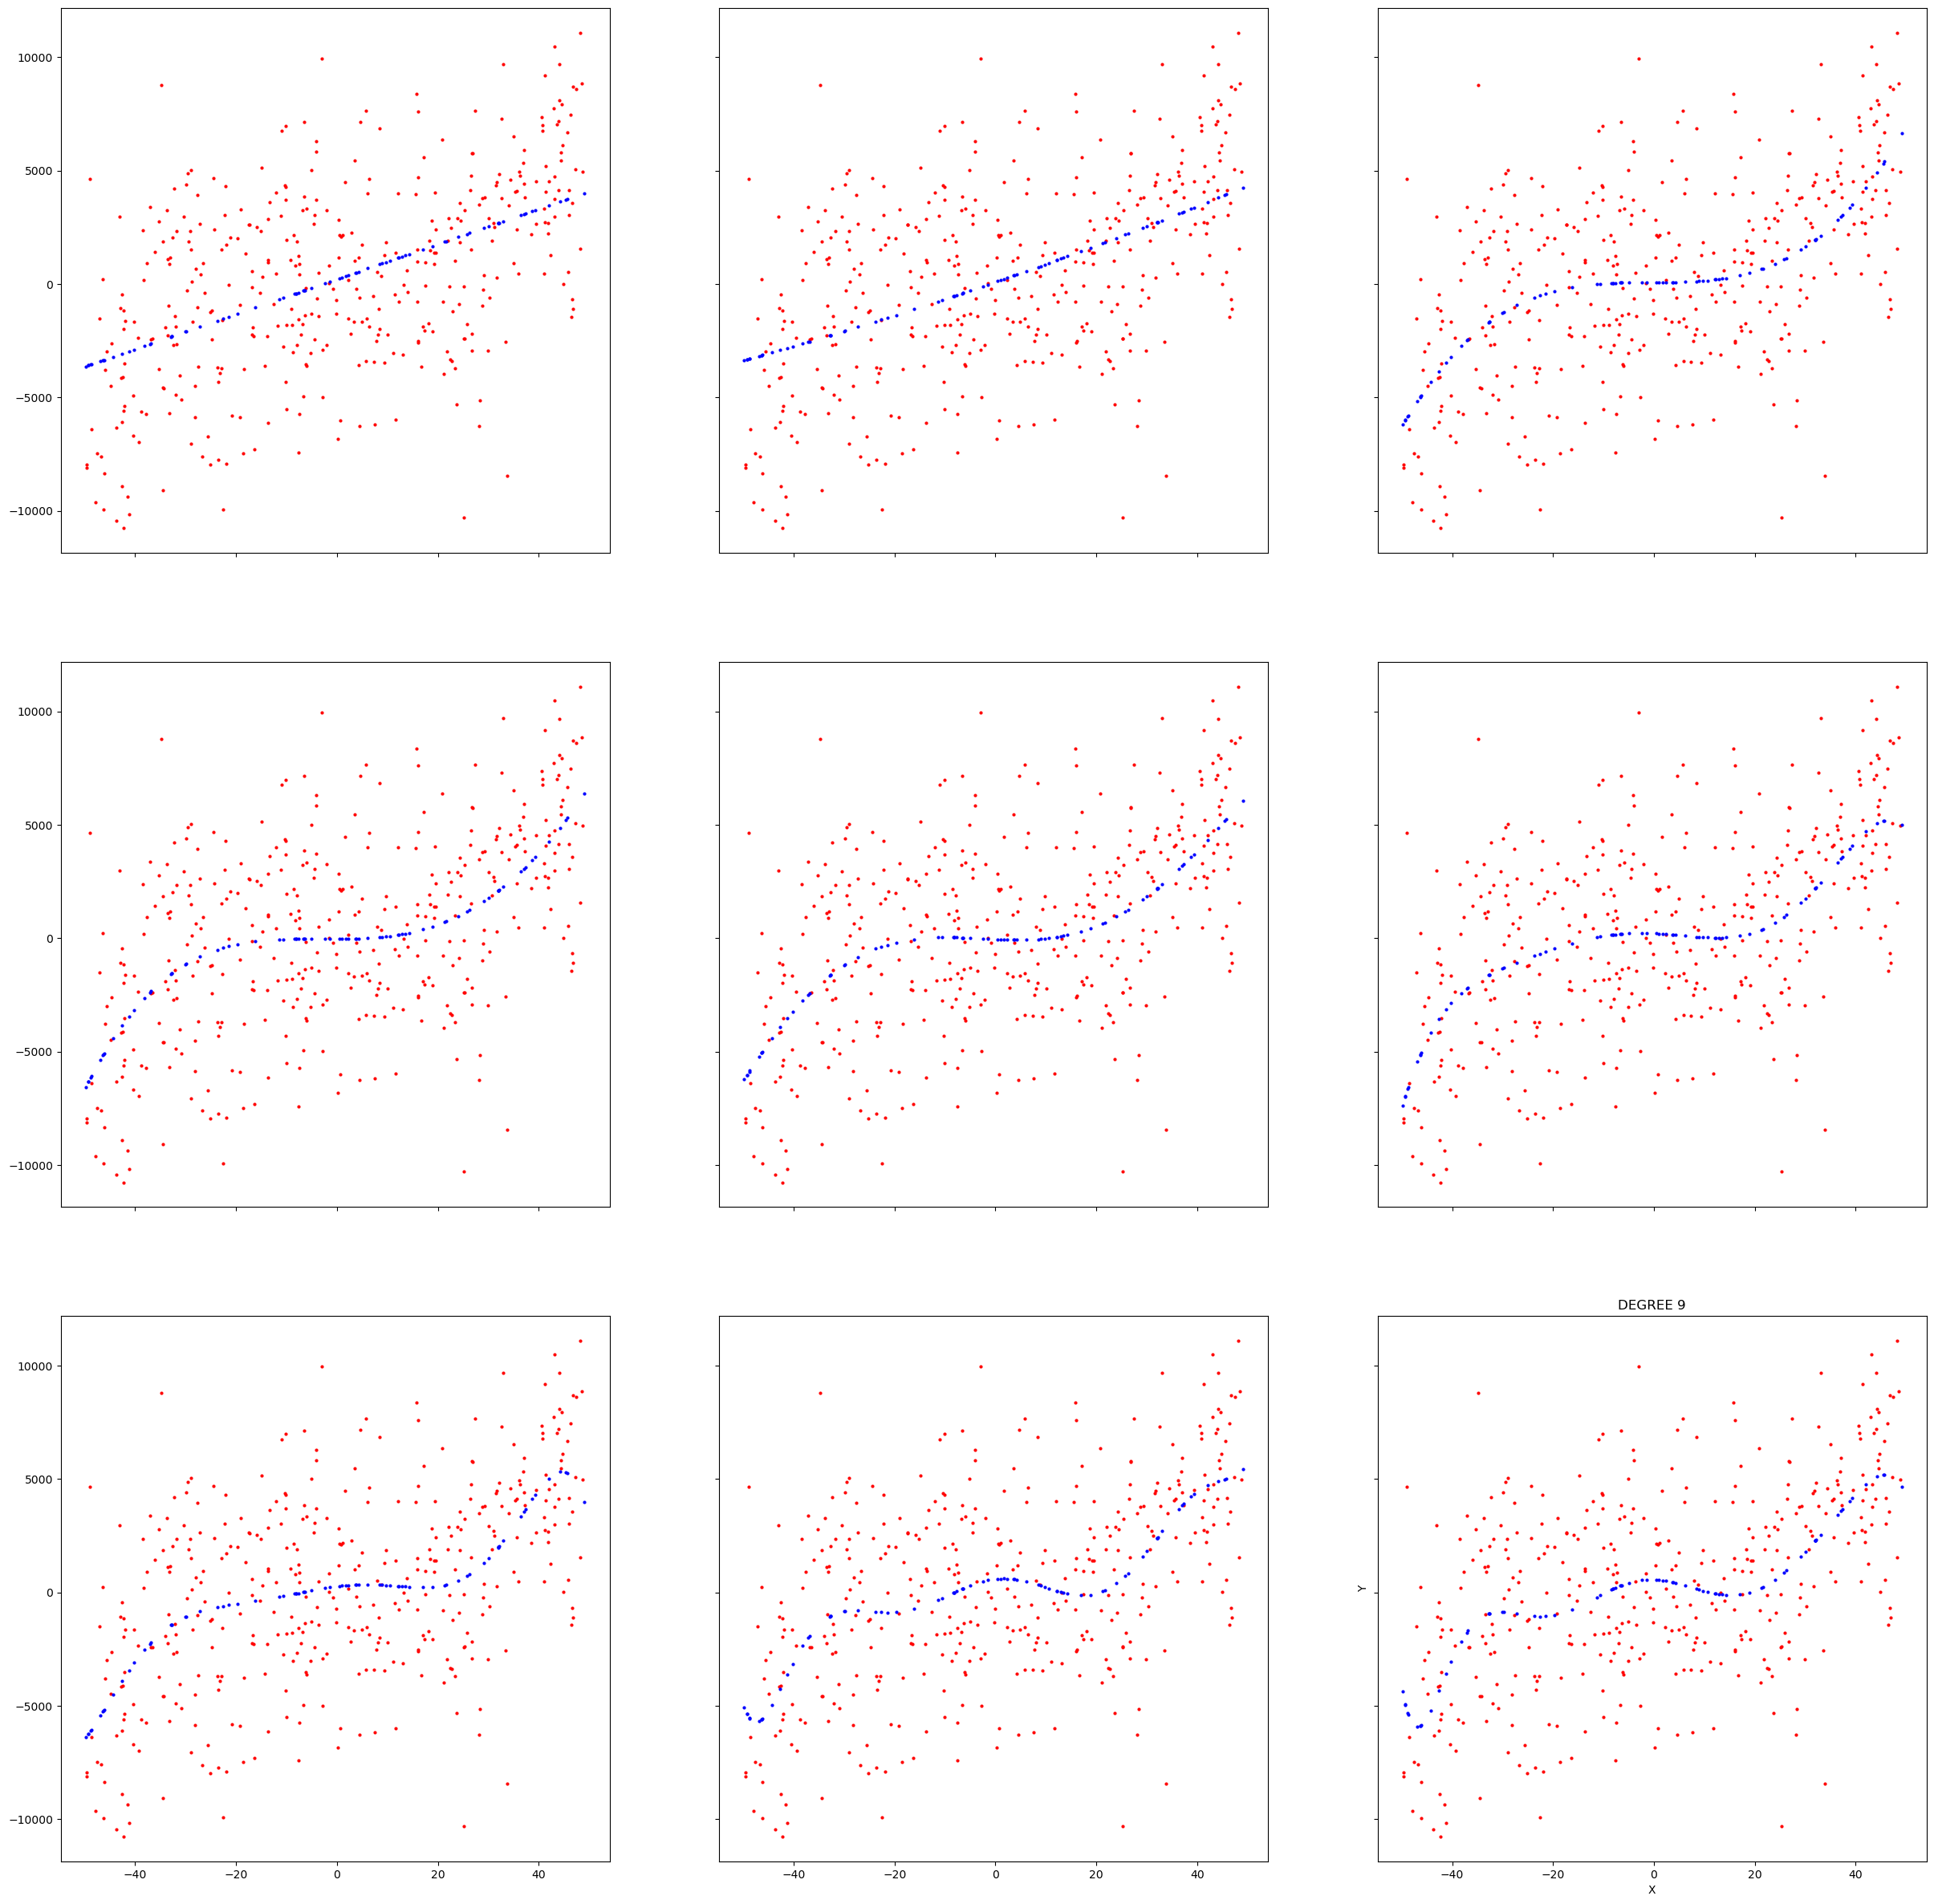

TRAINING SET  6


<Figure size 640x480 with 0 Axes>

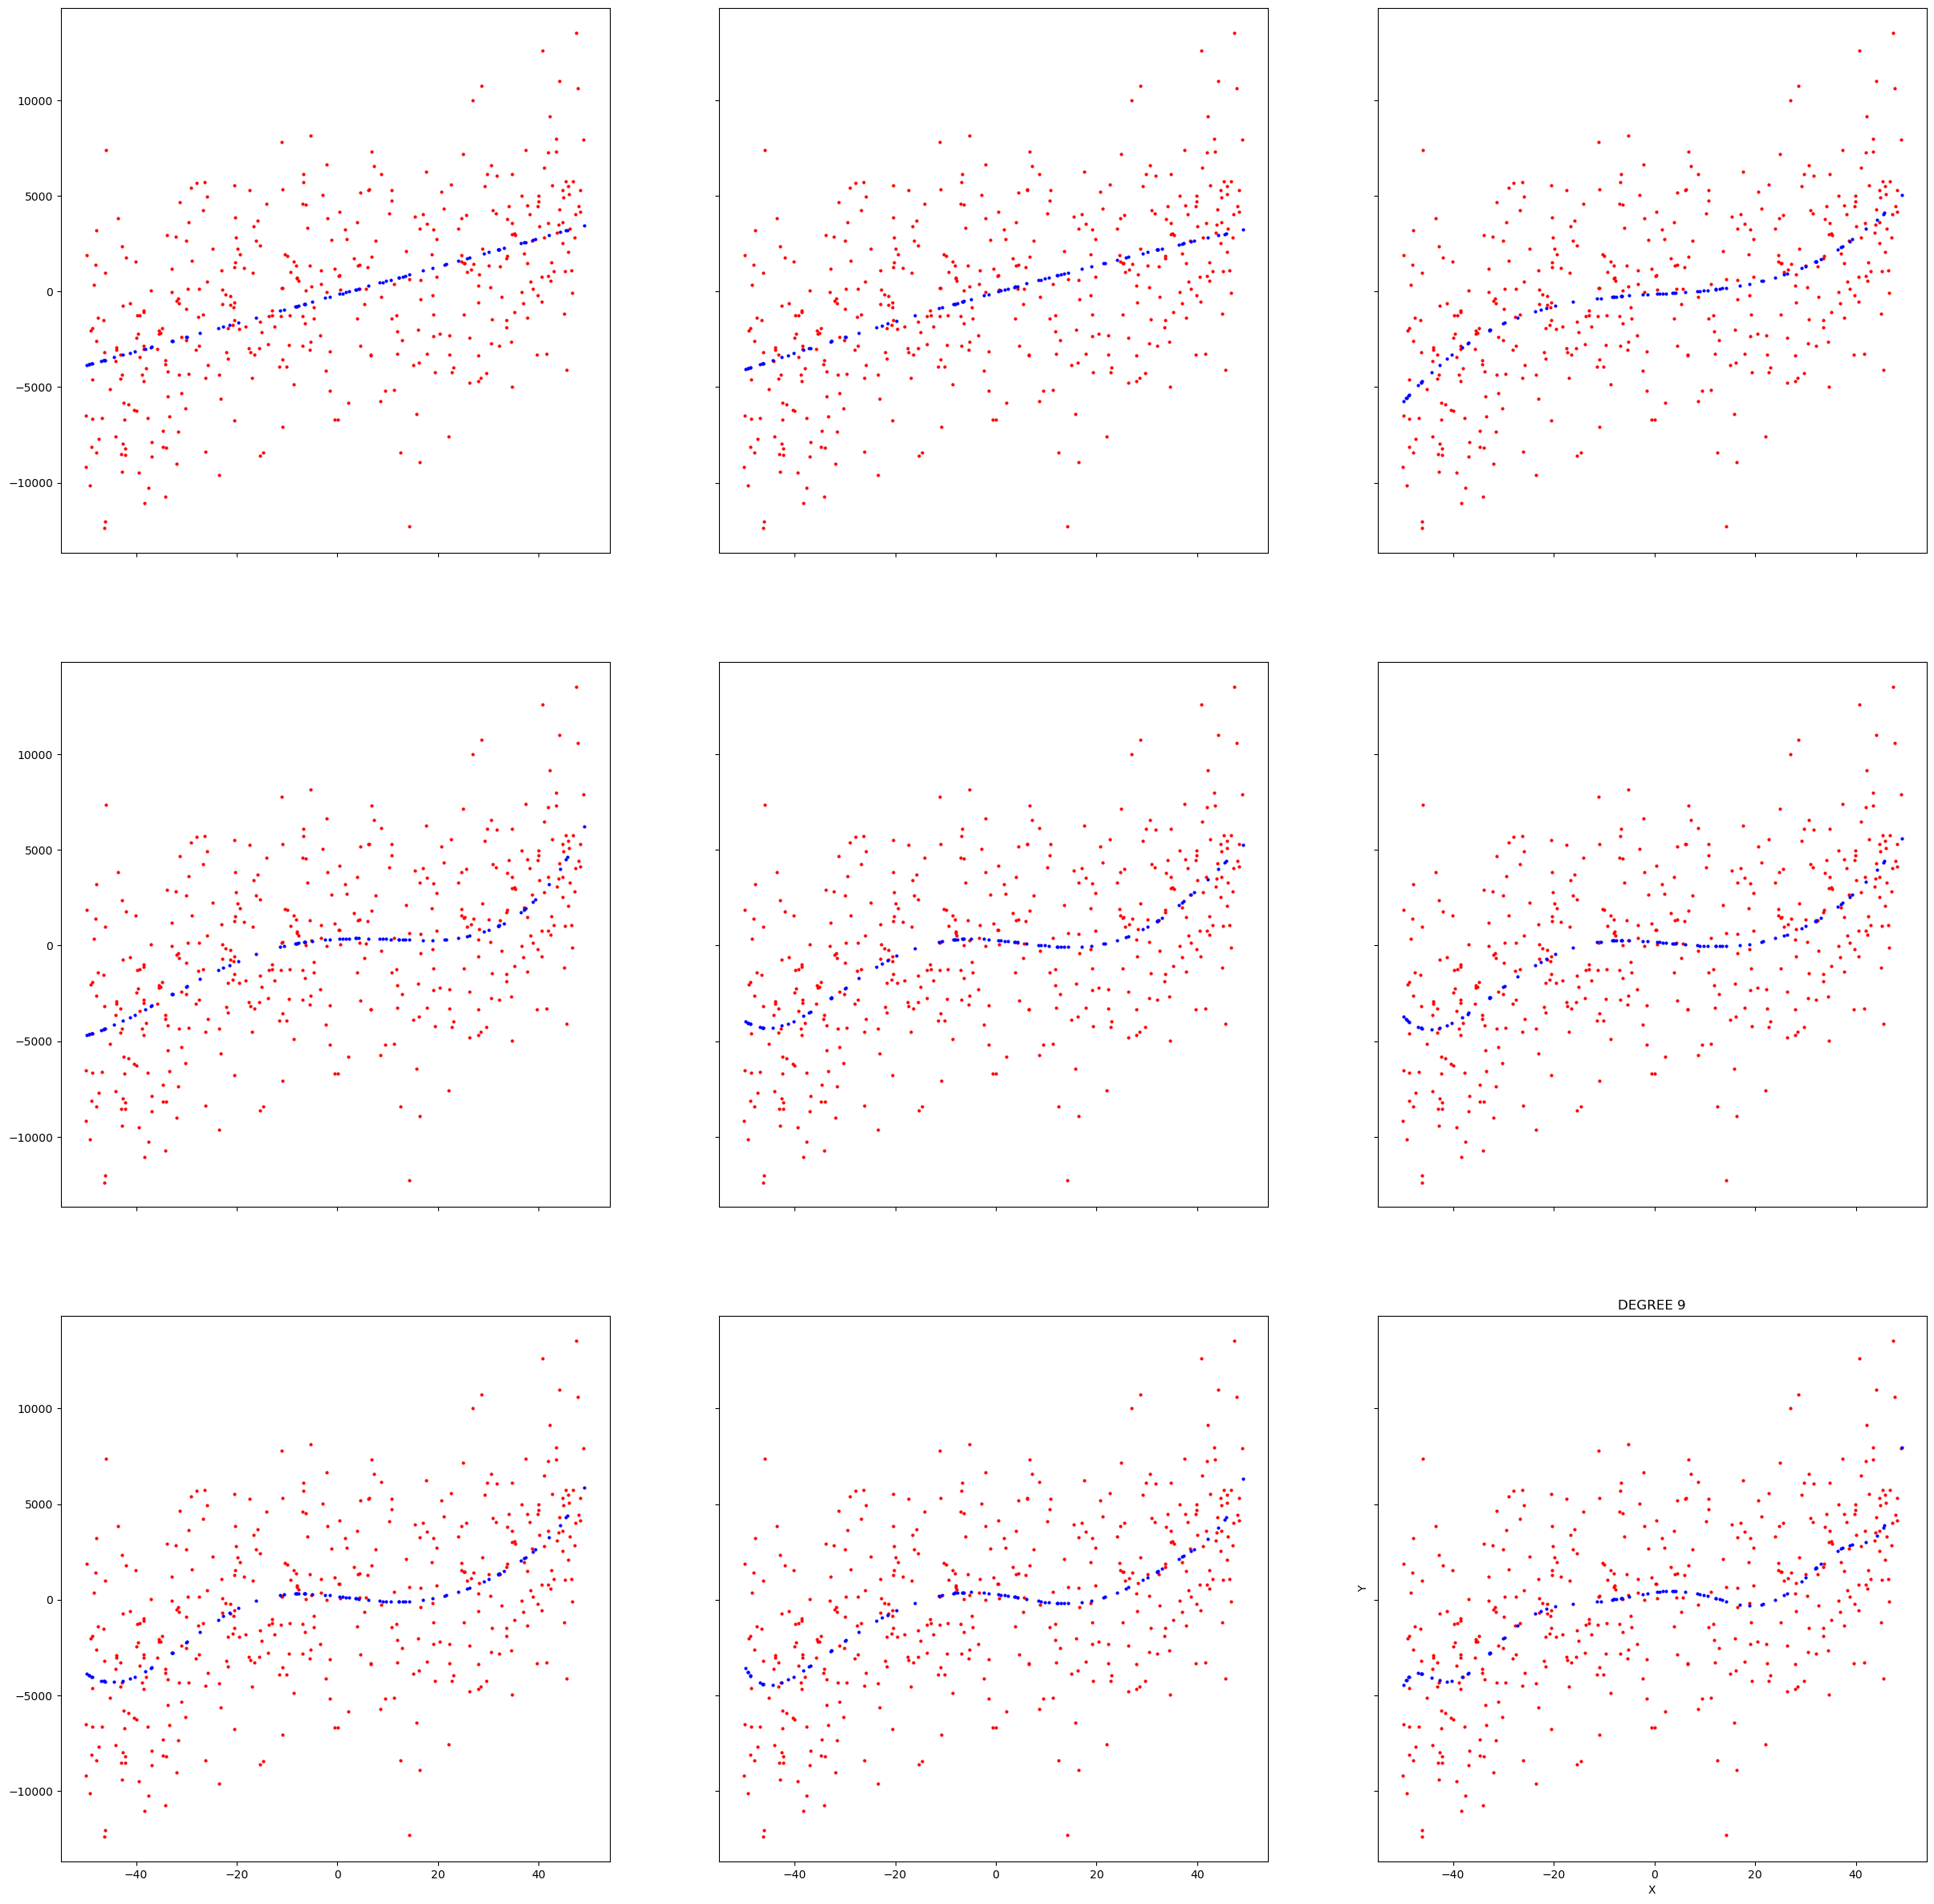

TRAINING SET  7


<Figure size 640x480 with 0 Axes>

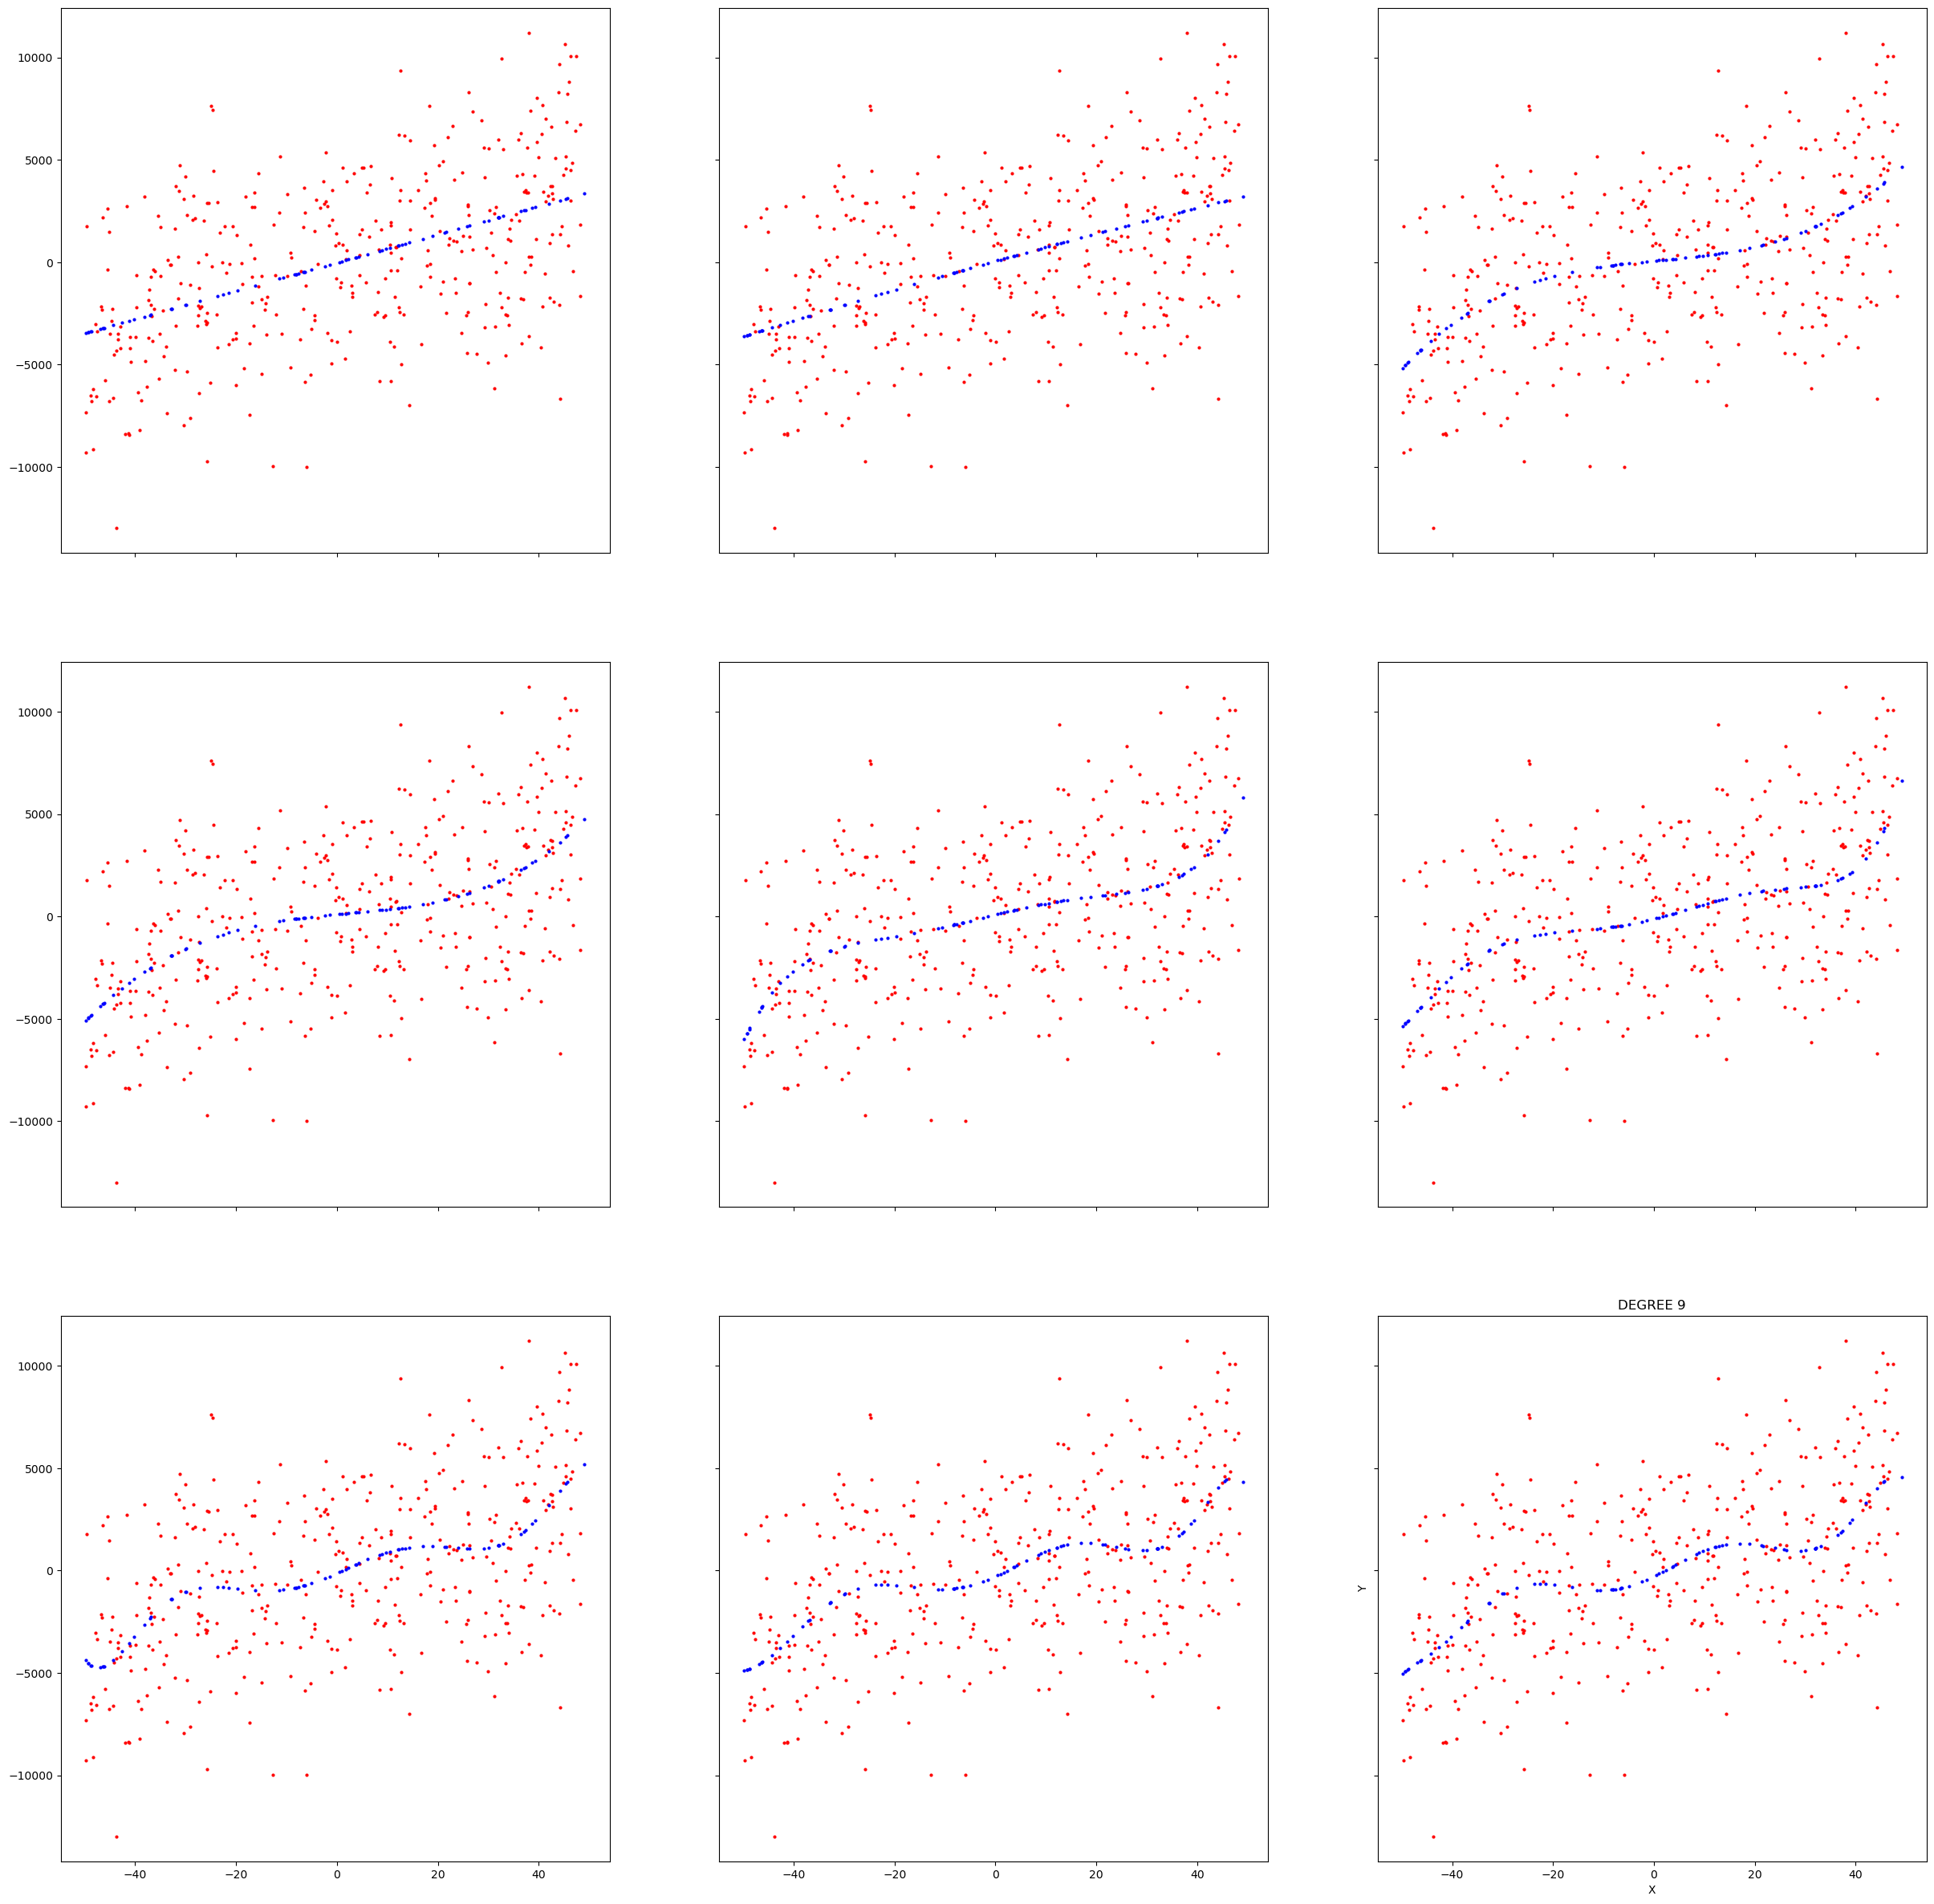

TRAINING SET  8


<Figure size 640x480 with 0 Axes>

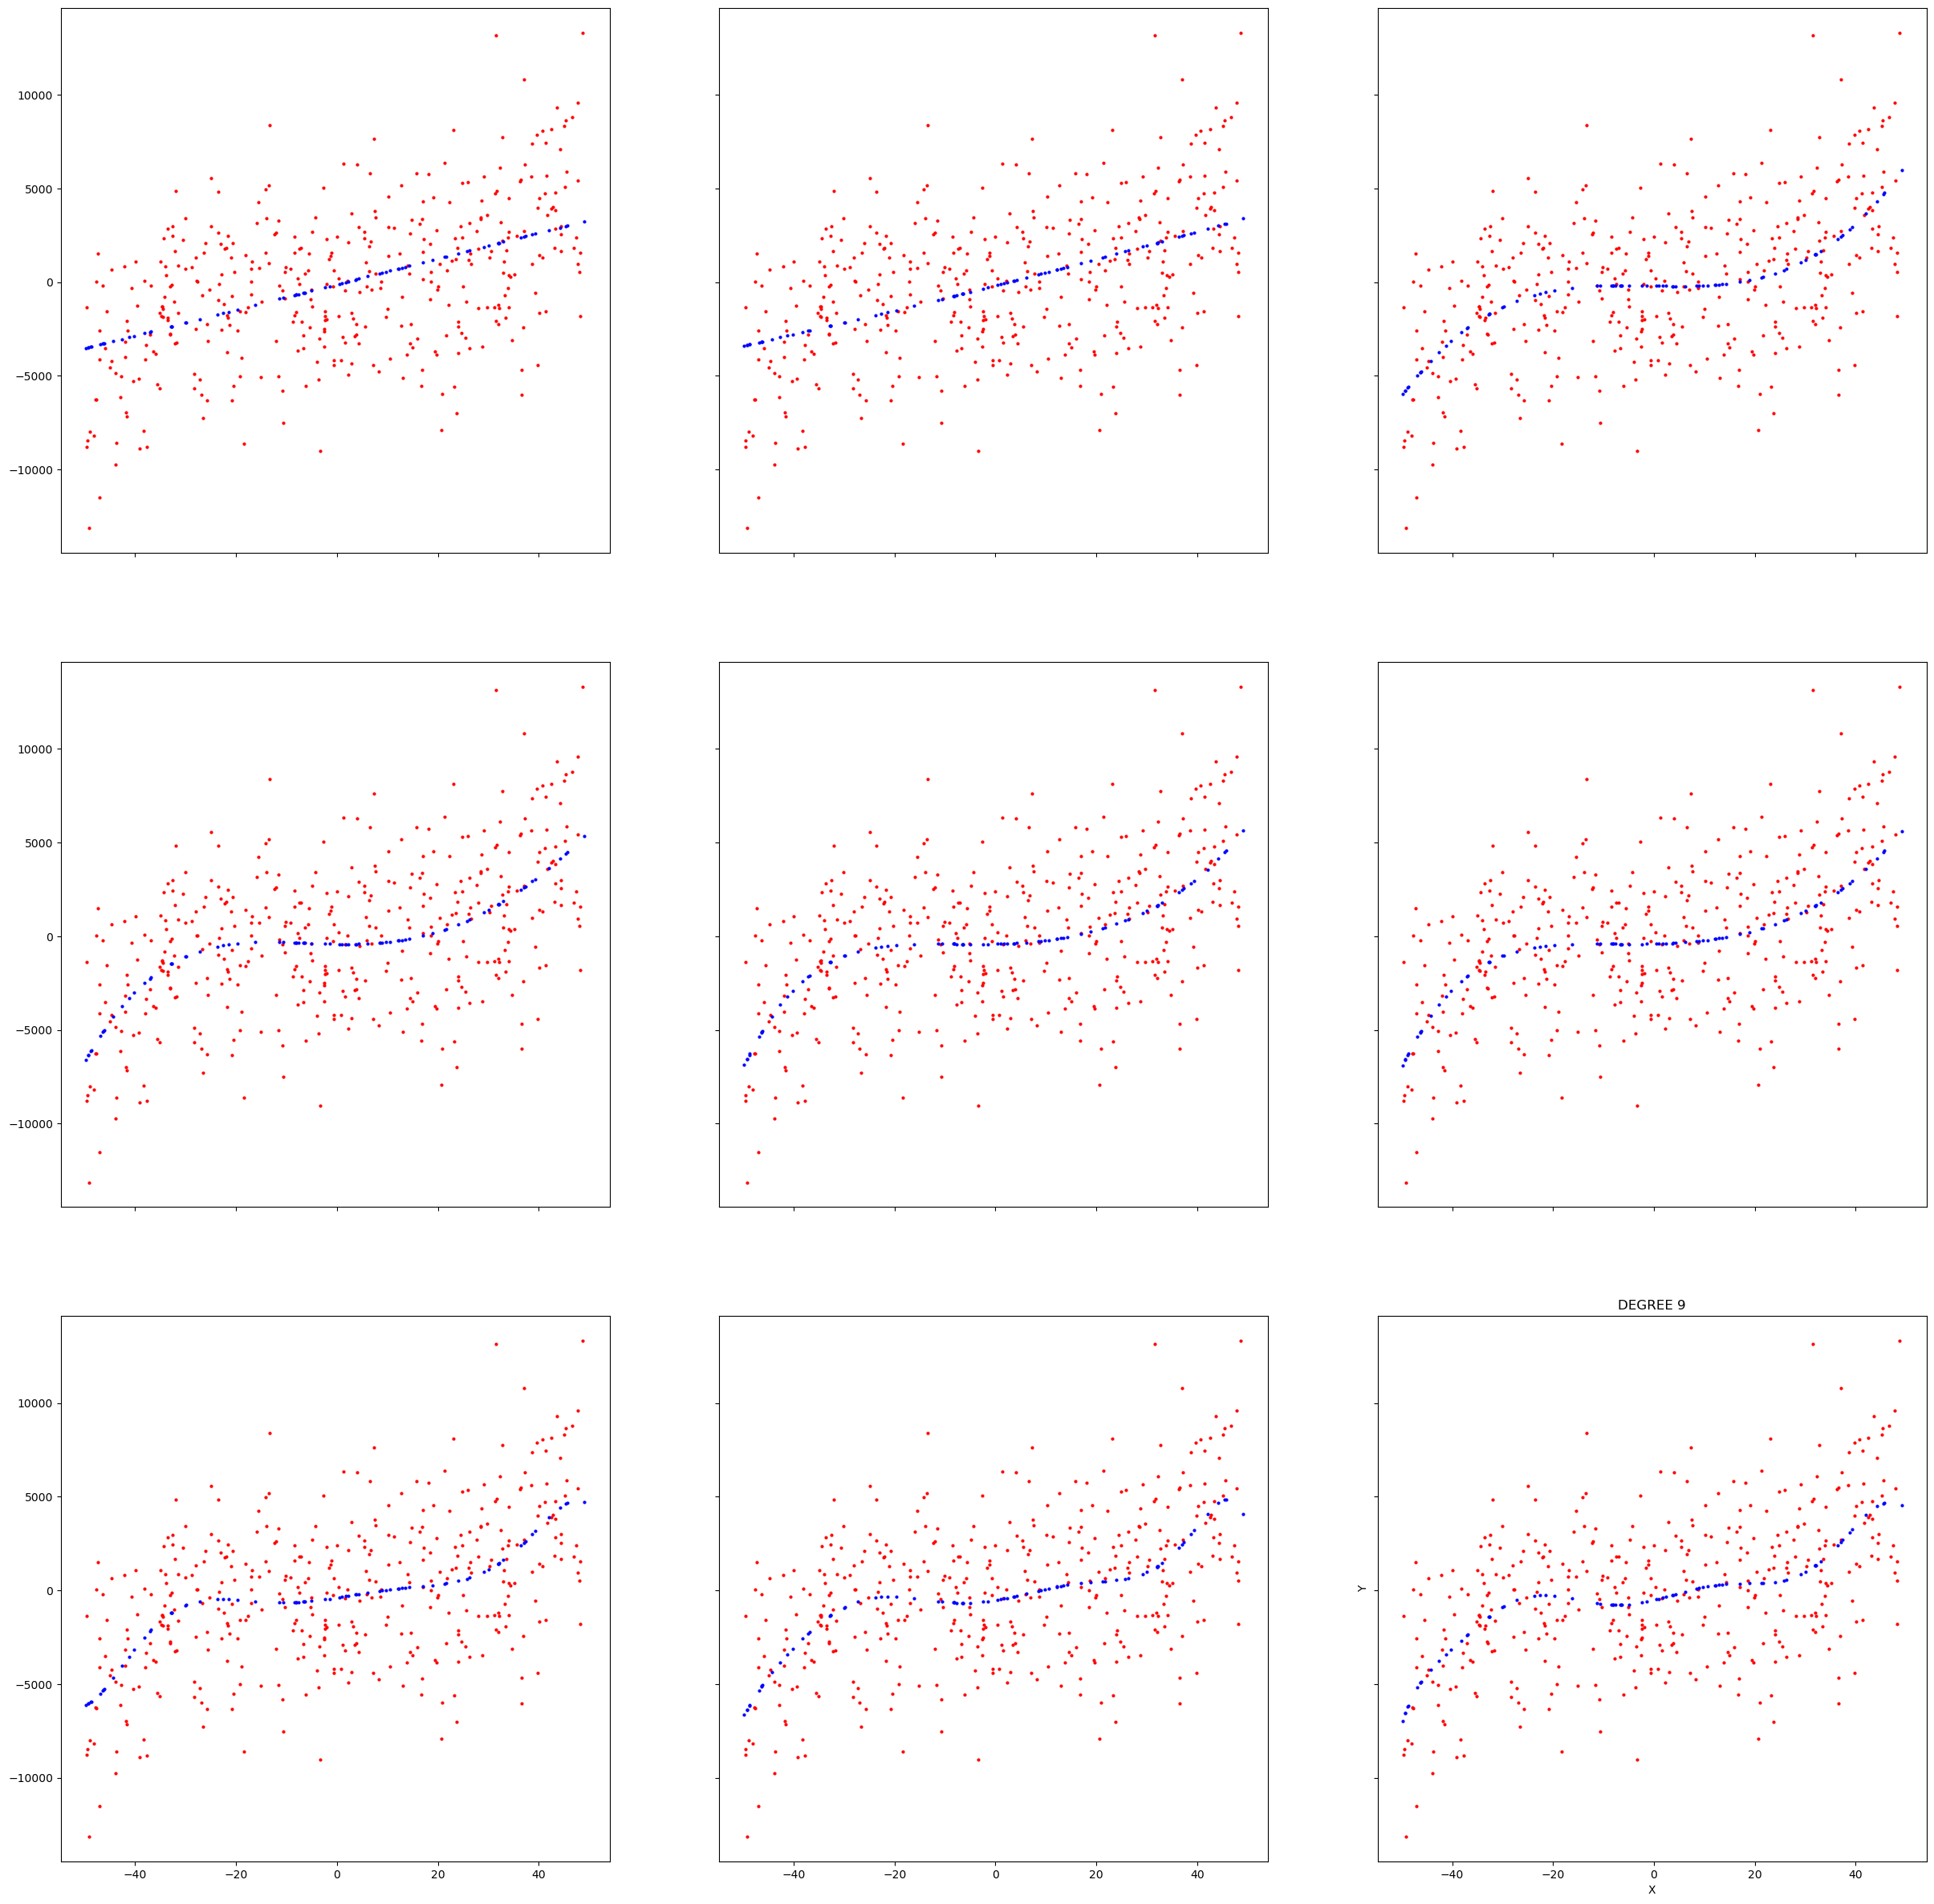

TRAINING SET  9


<Figure size 640x480 with 0 Axes>

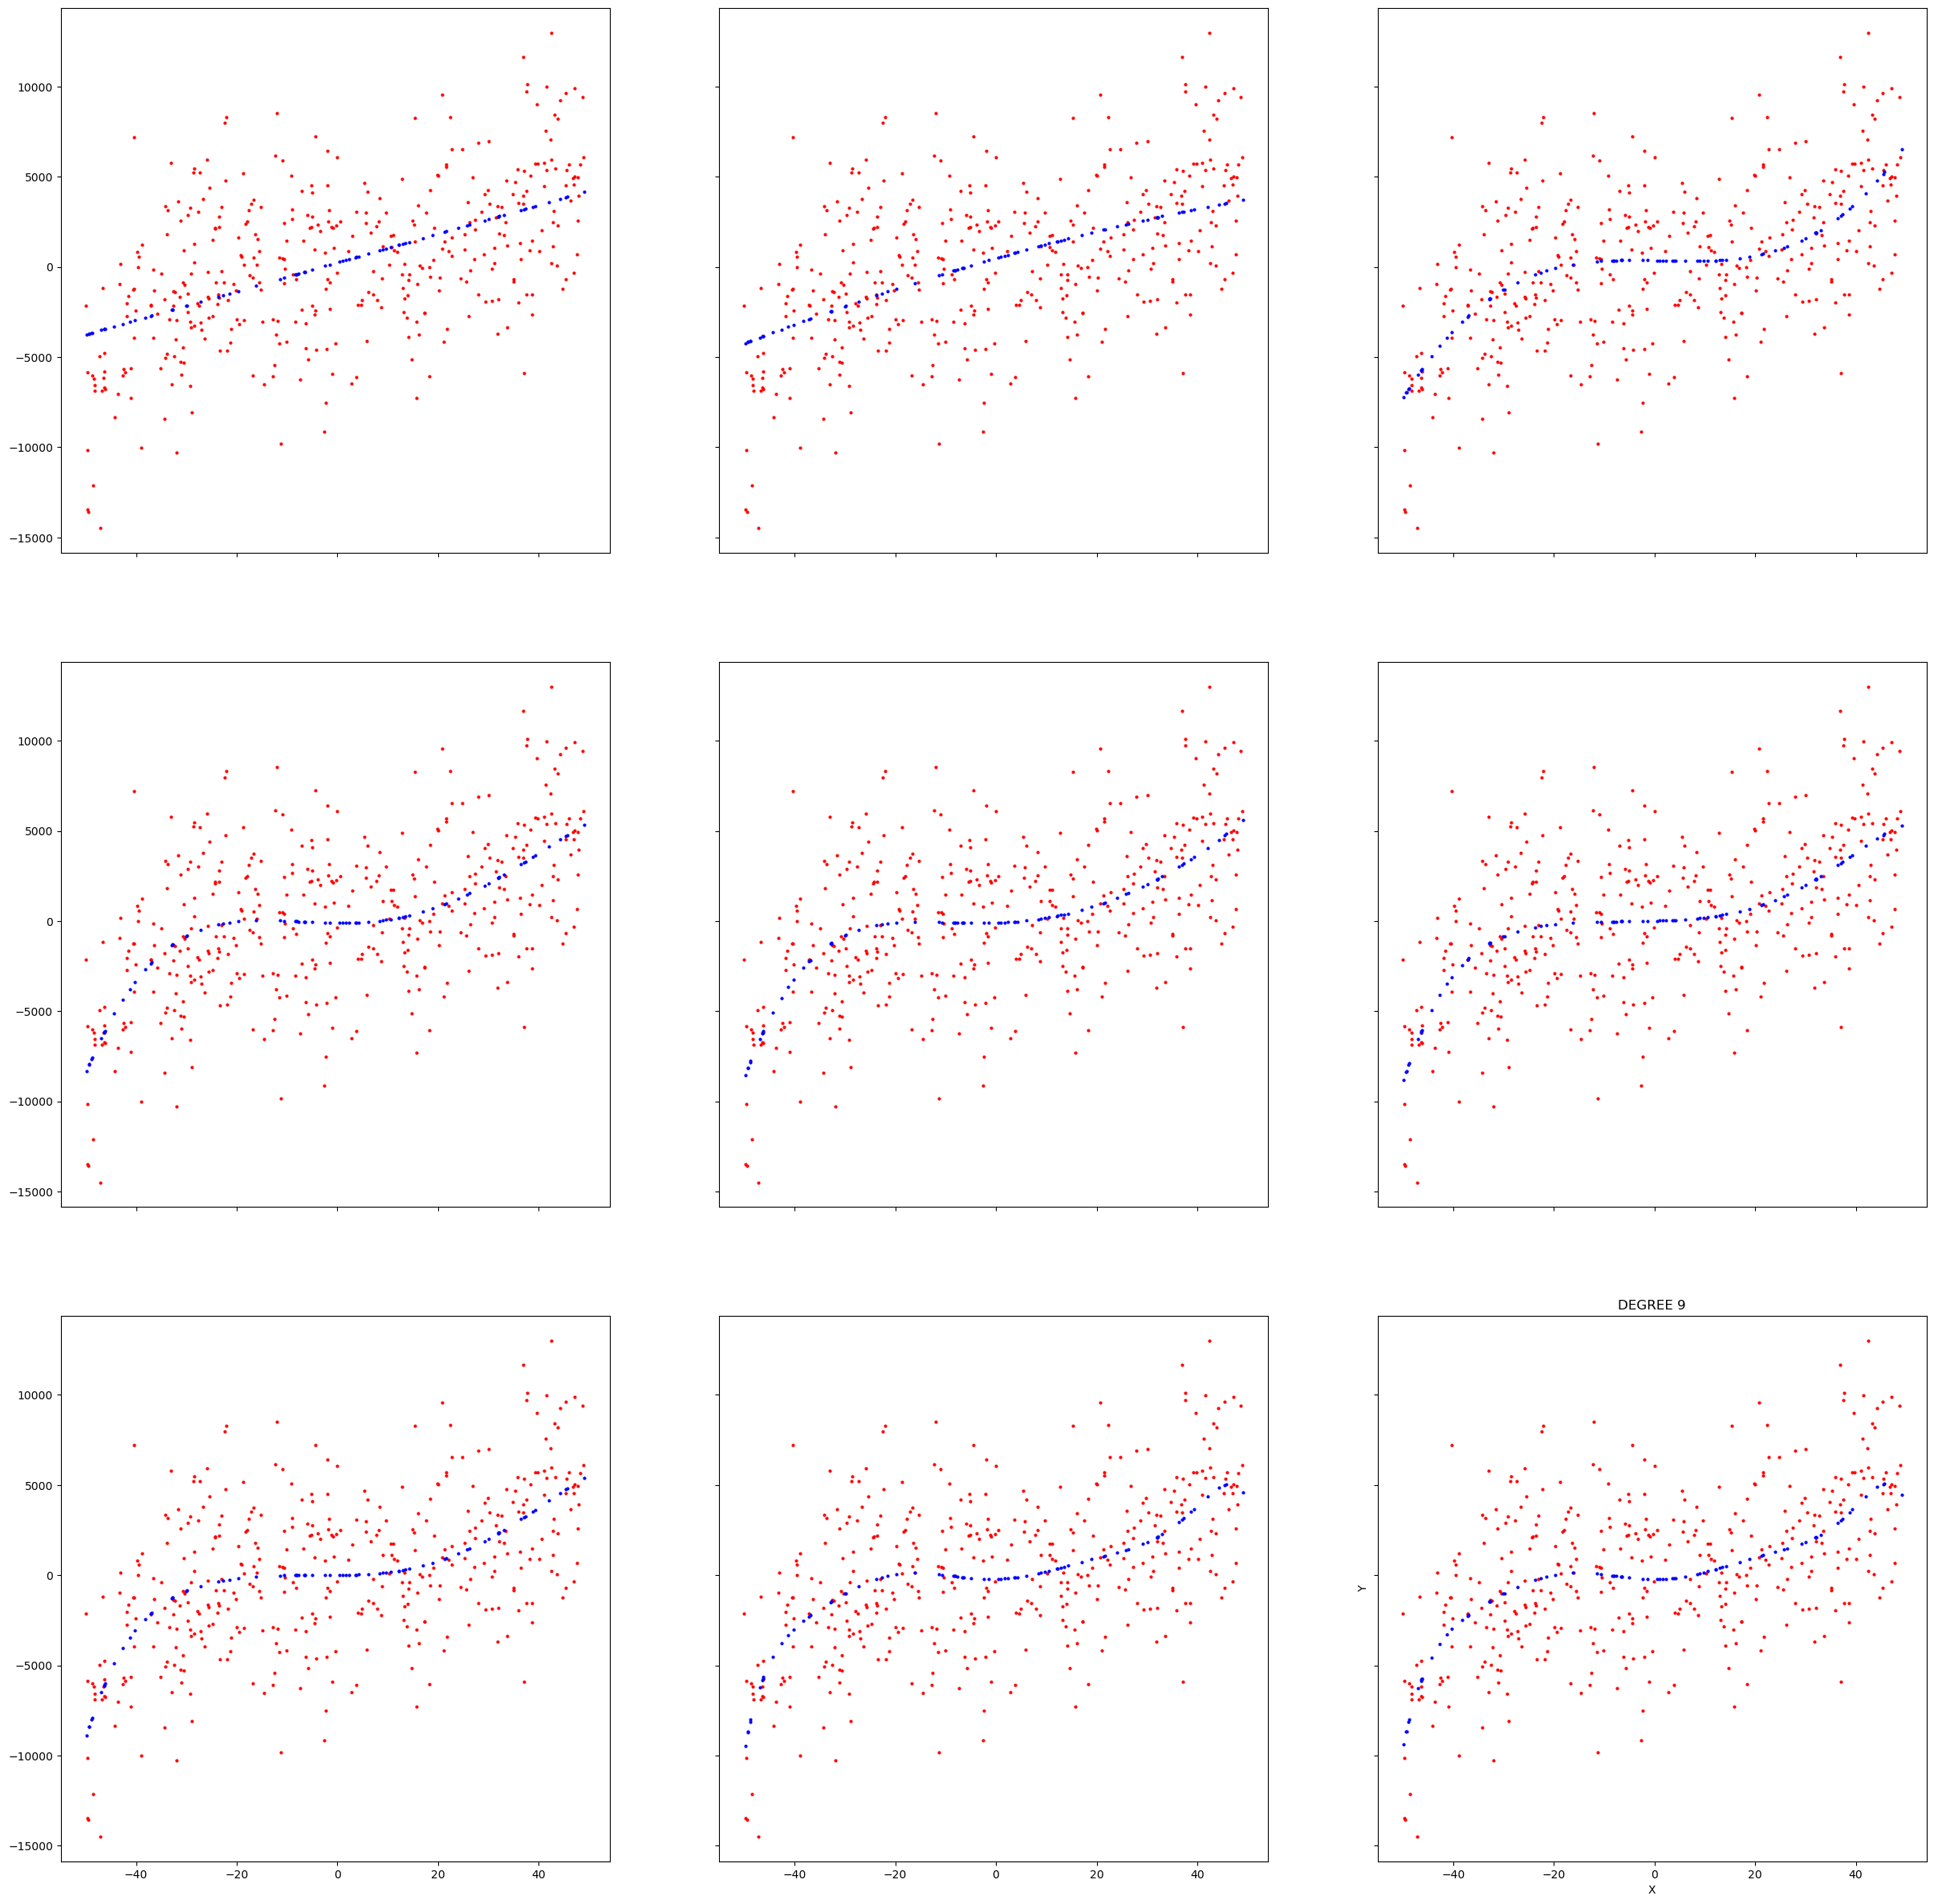

TRAINING SET  10


<Figure size 640x480 with 0 Axes>

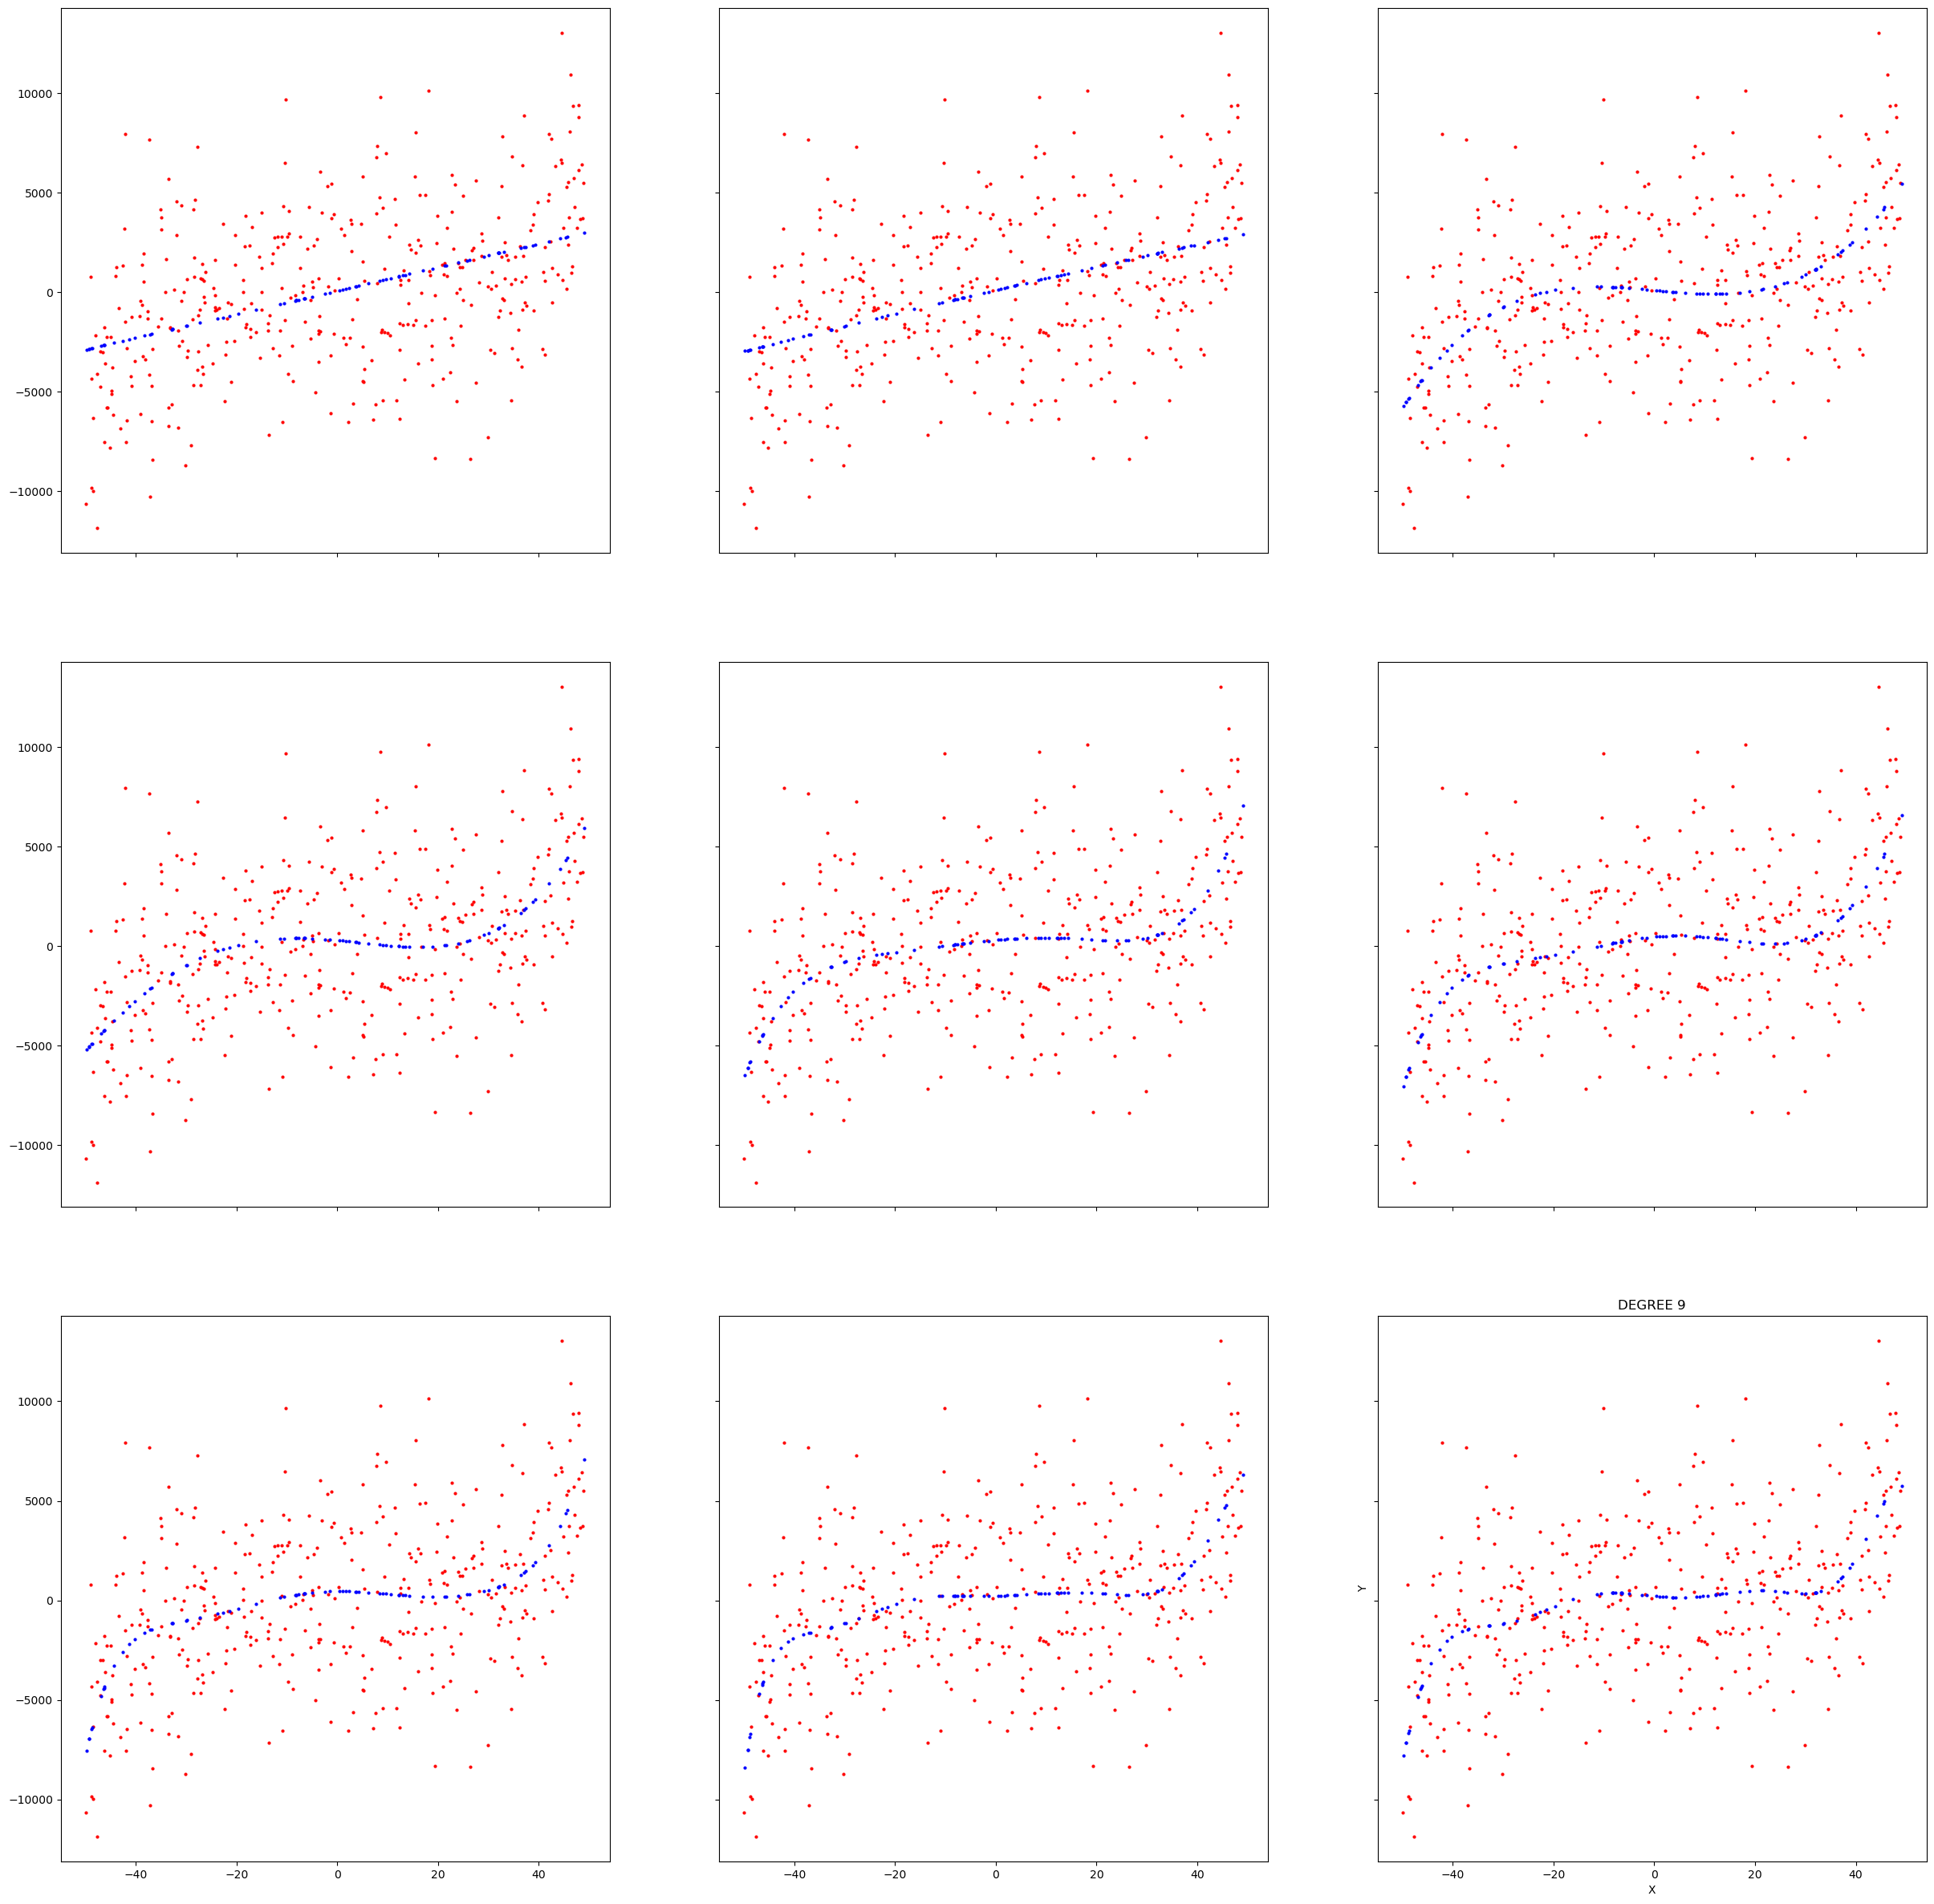

TRAINING SET  11


<Figure size 640x480 with 0 Axes>

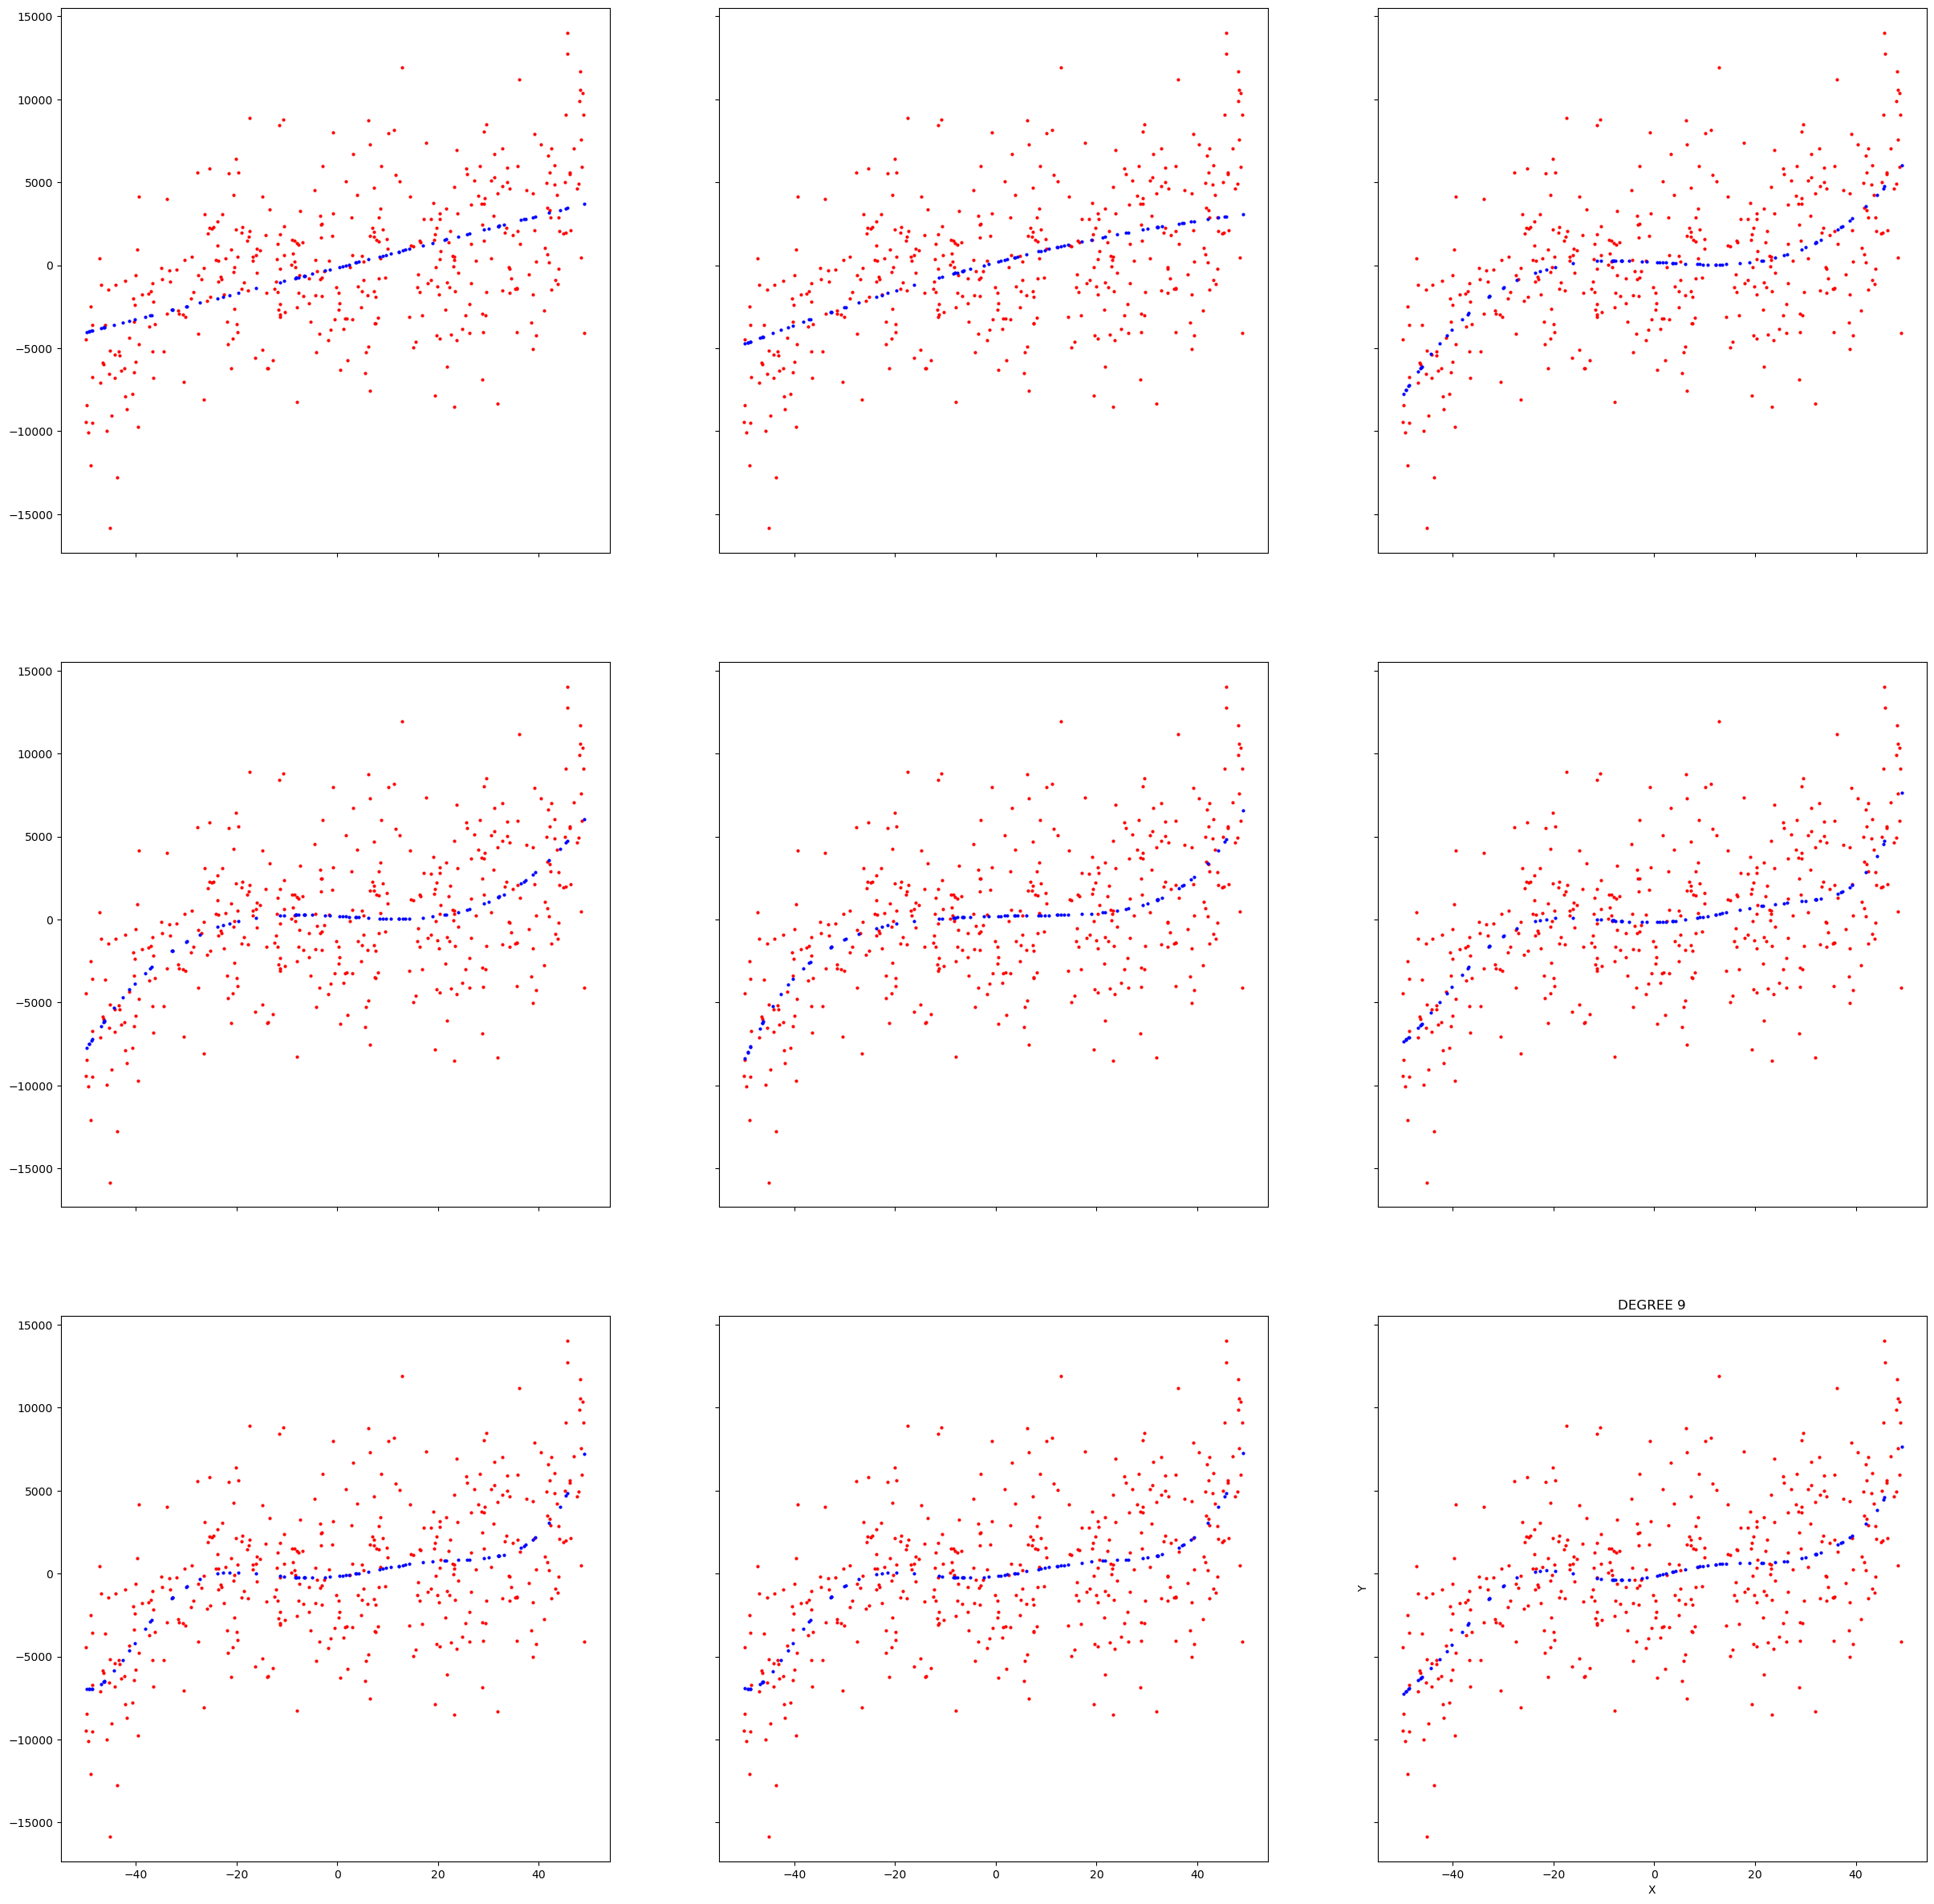

TRAINING SET  12


<Figure size 640x480 with 0 Axes>

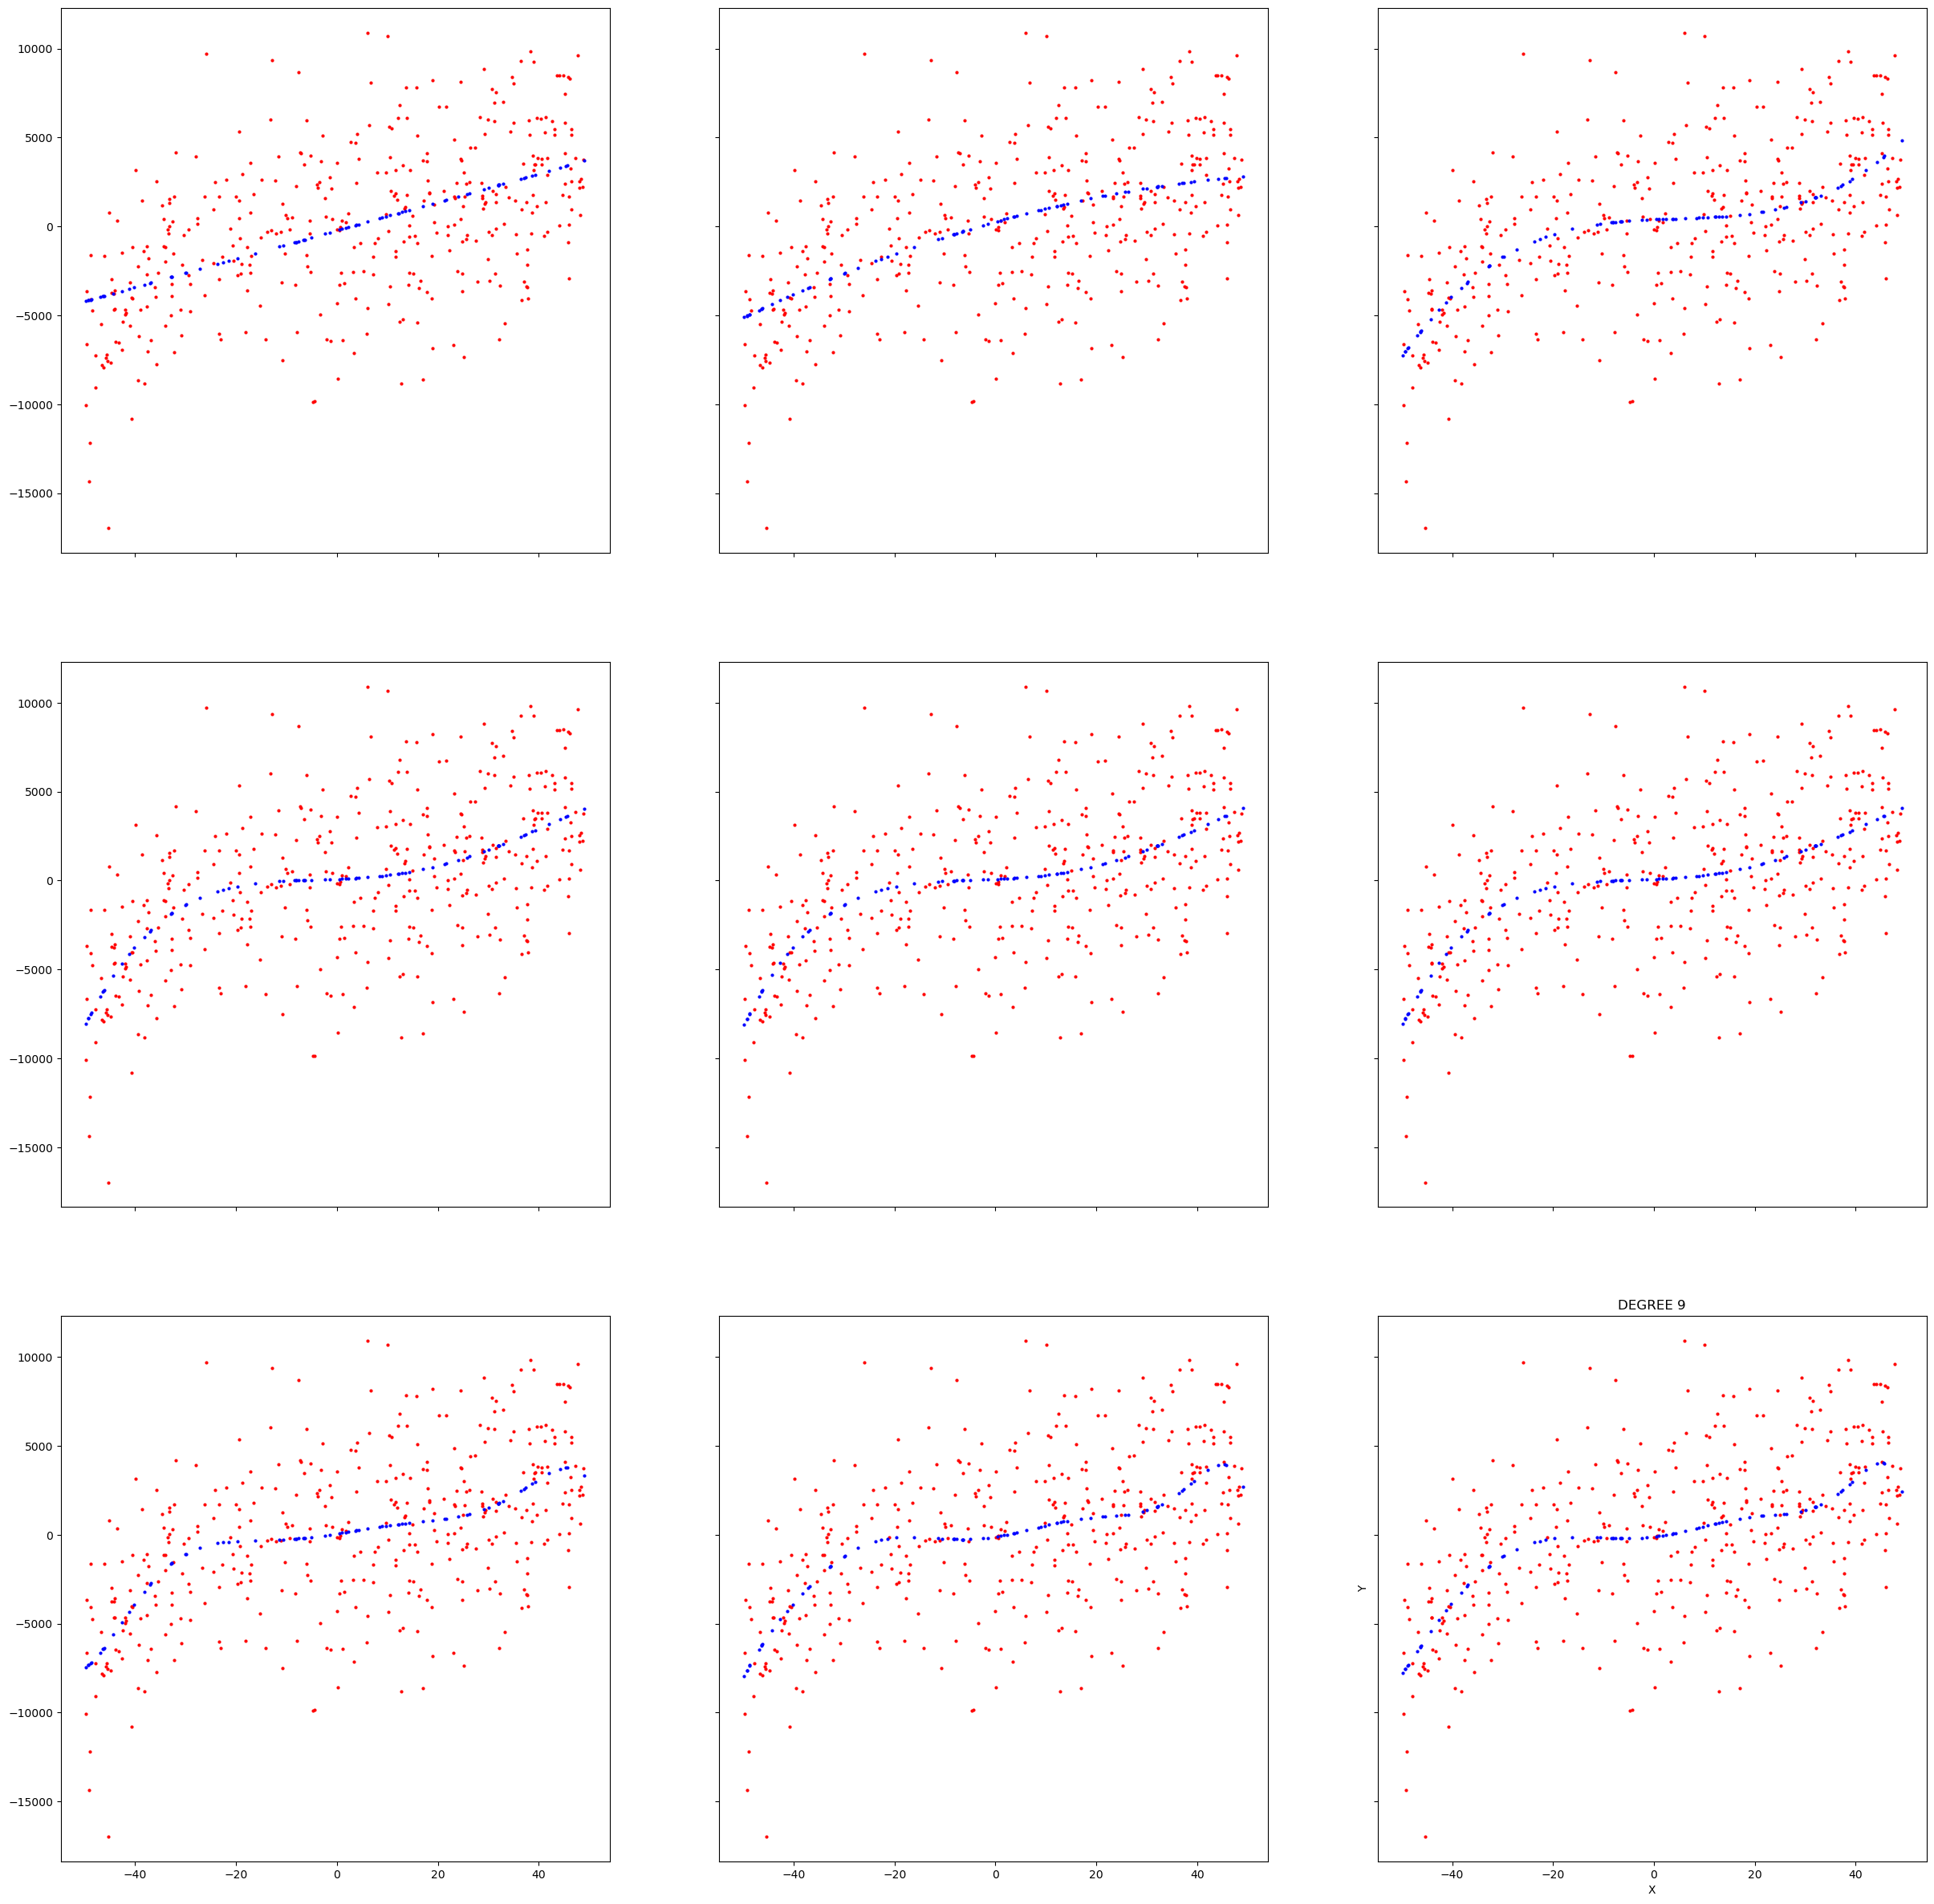

TRAINING SET  13


<Figure size 640x480 with 0 Axes>

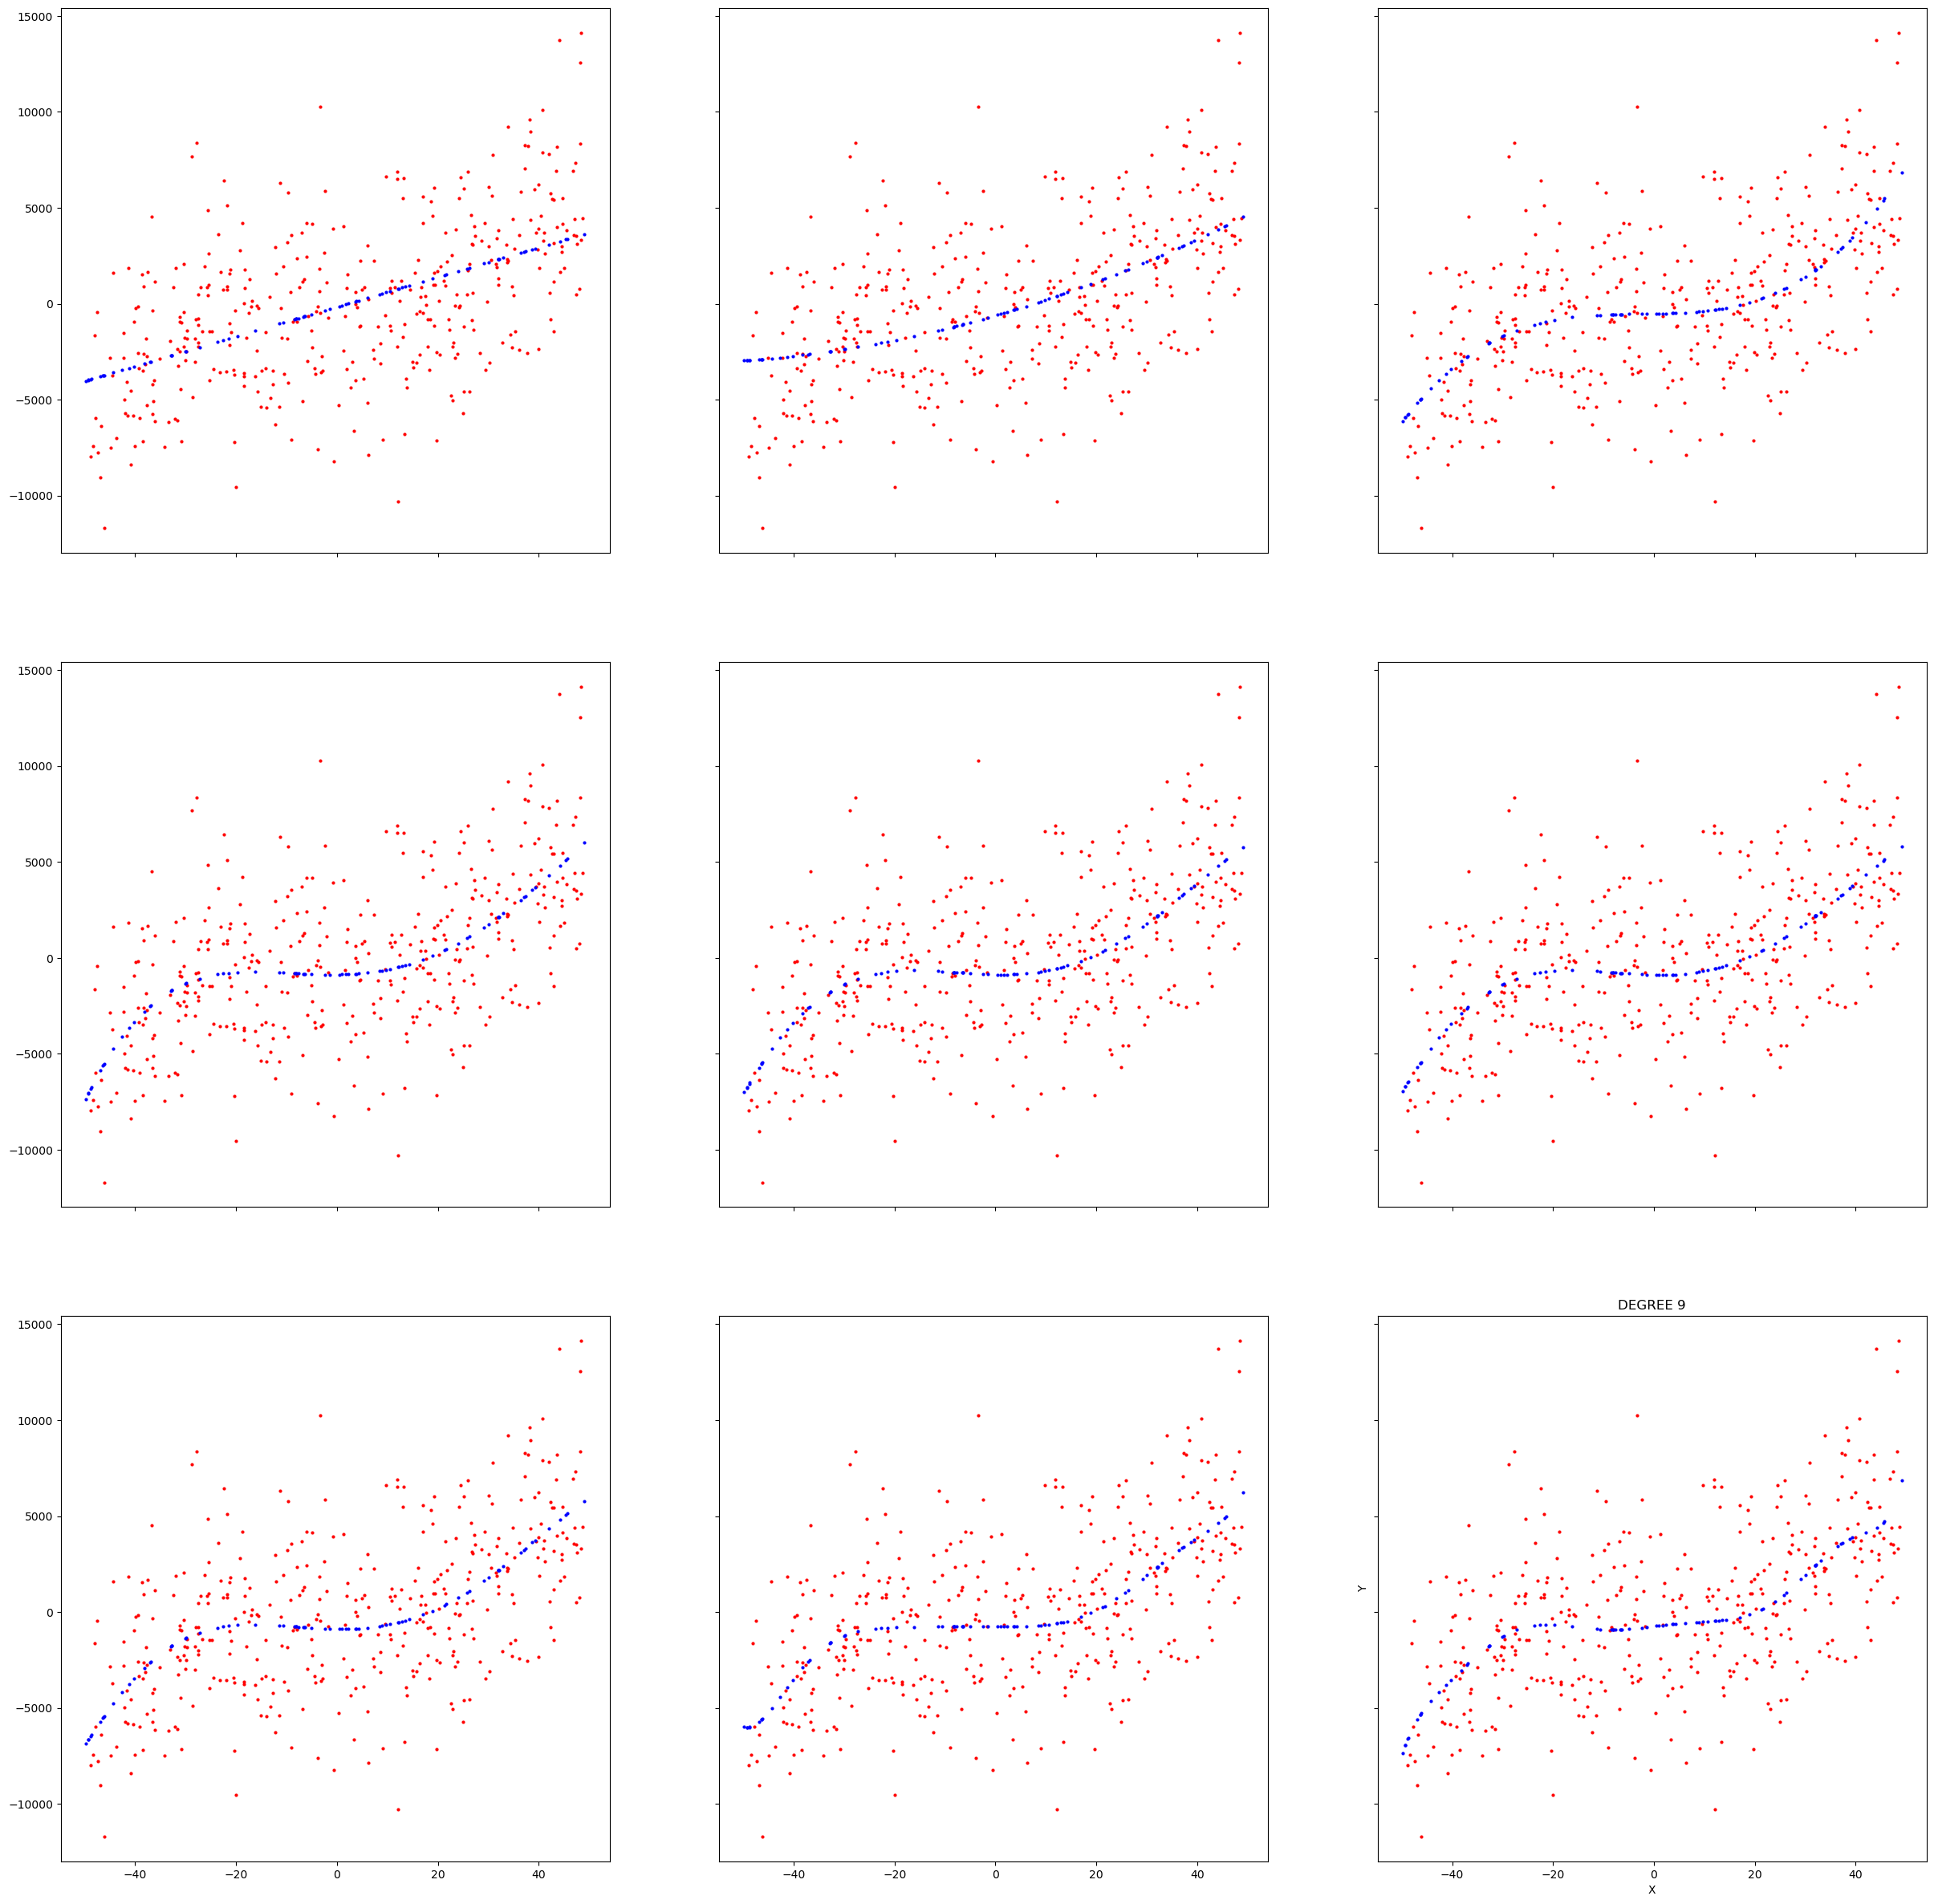

TRAINING SET  14


<Figure size 640x480 with 0 Axes>

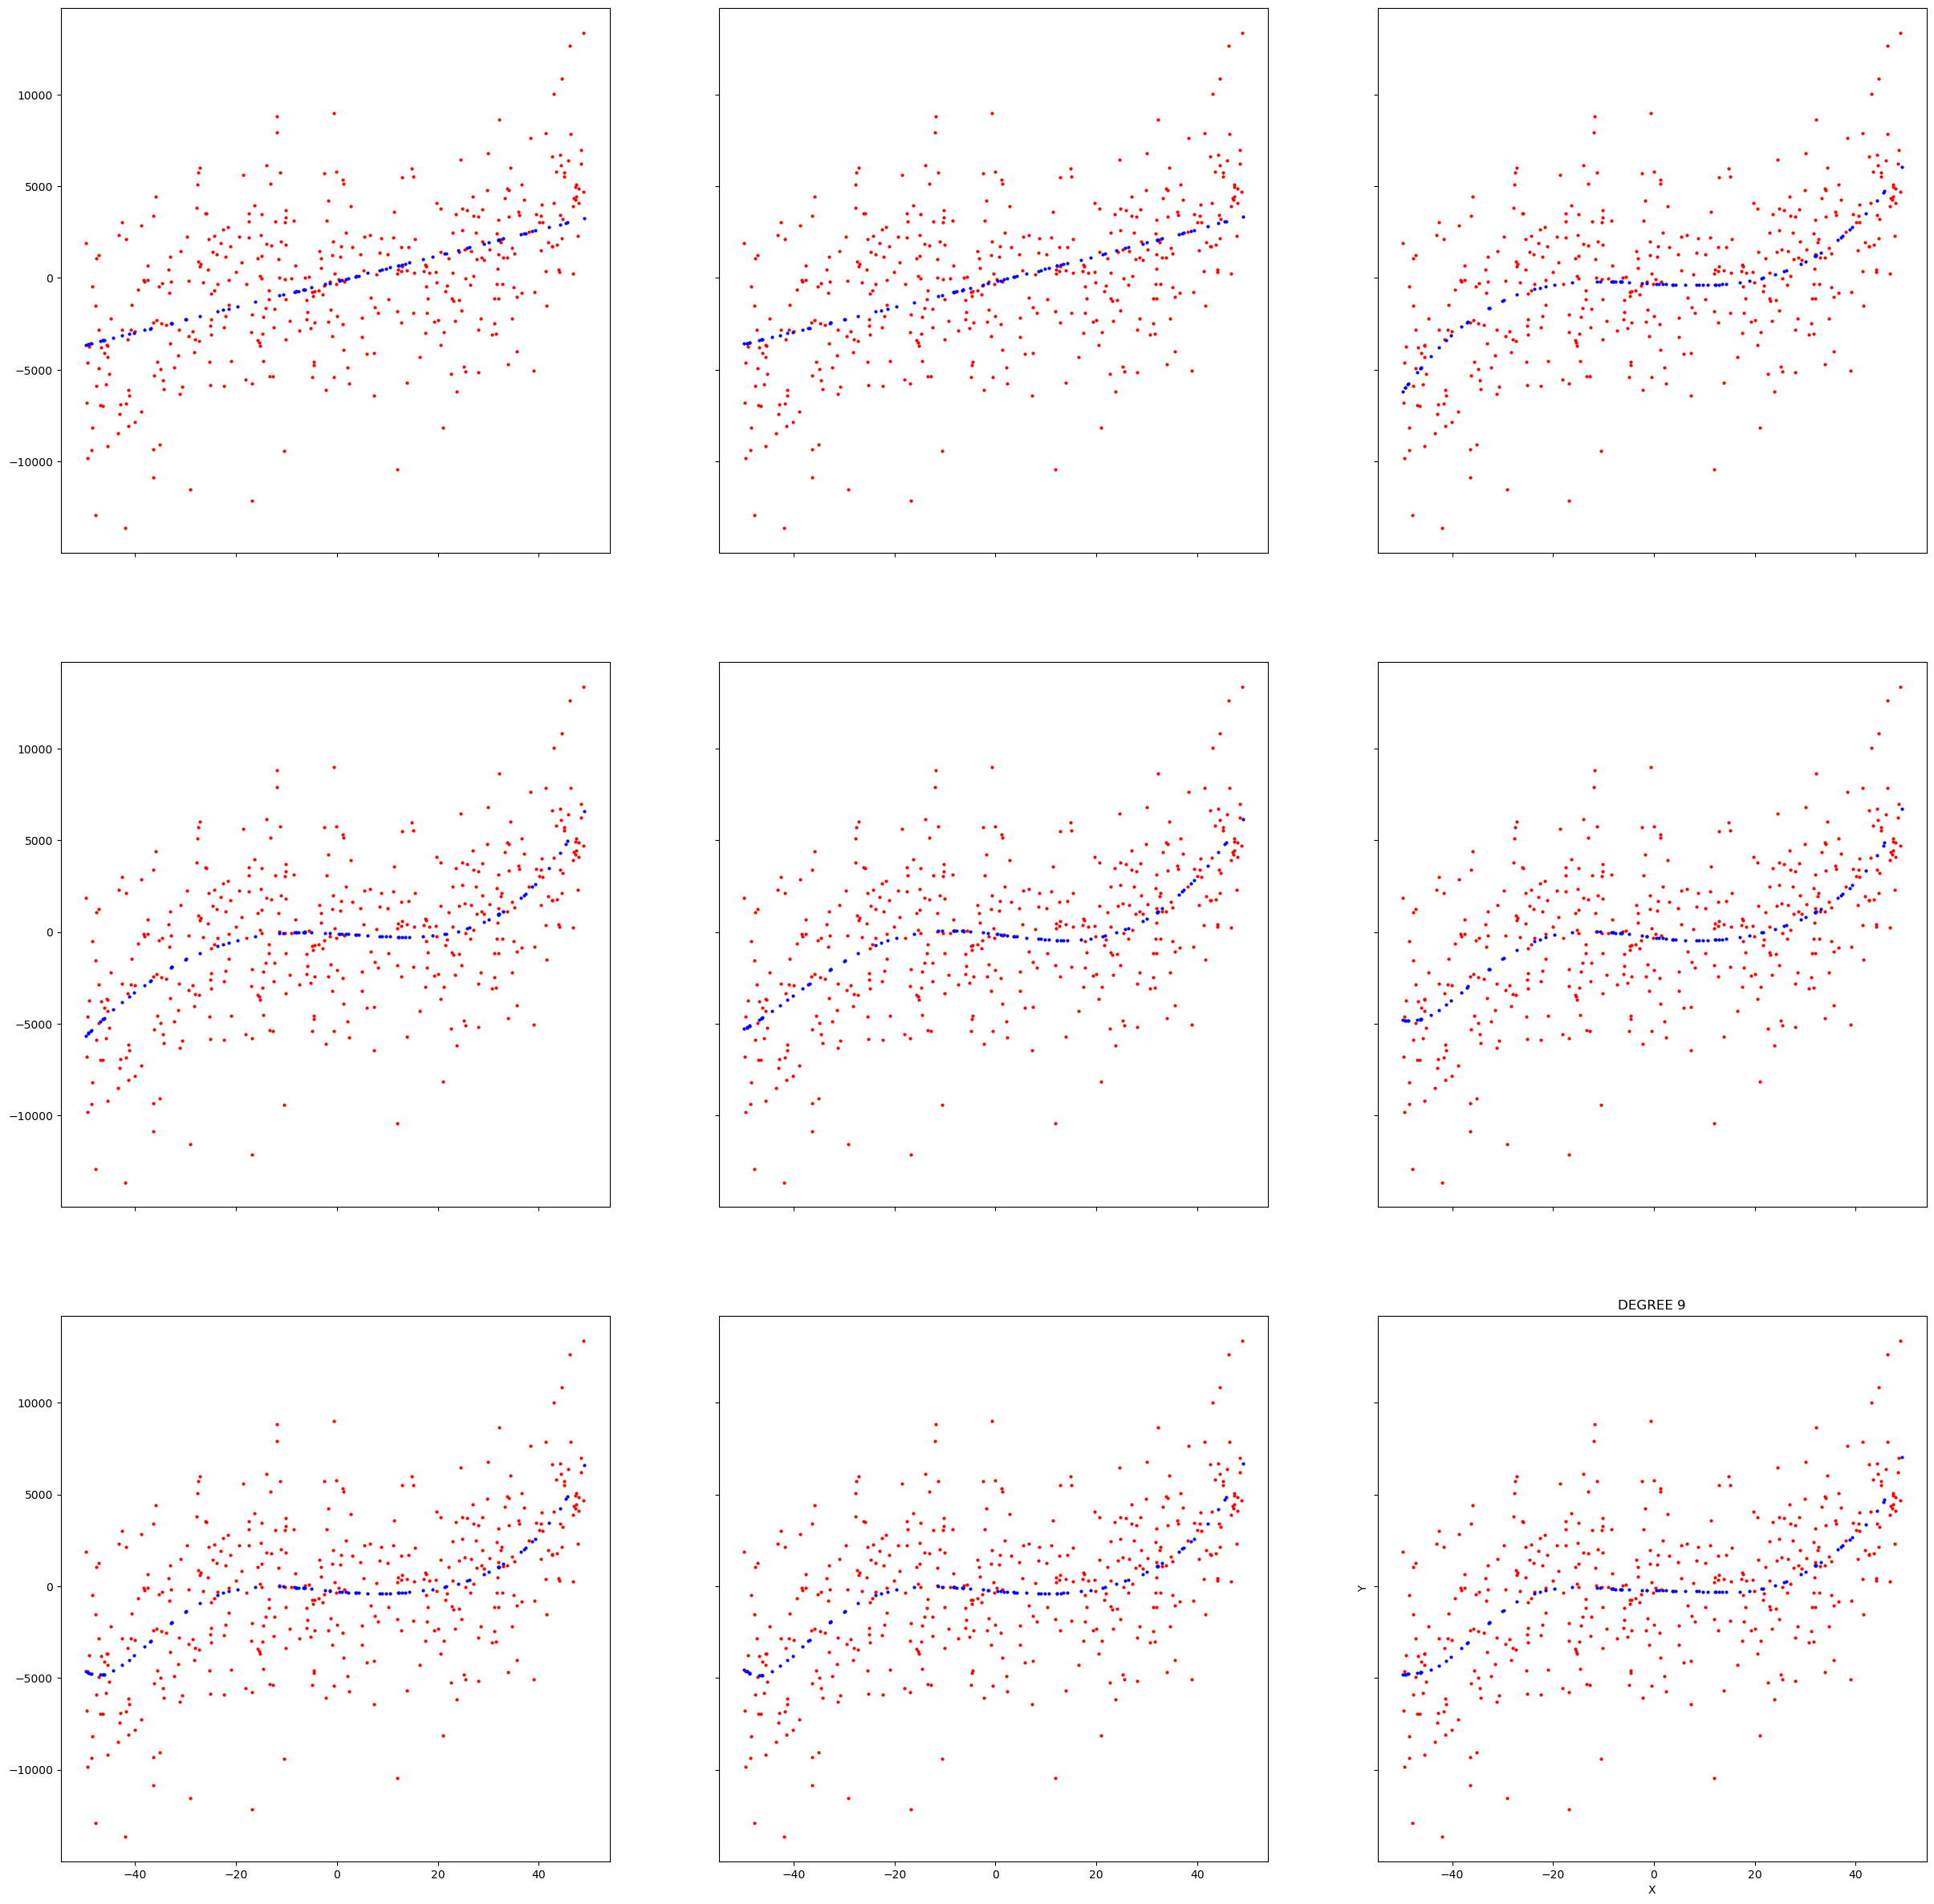

TRAINING SET  15


<Figure size 640x480 with 0 Axes>

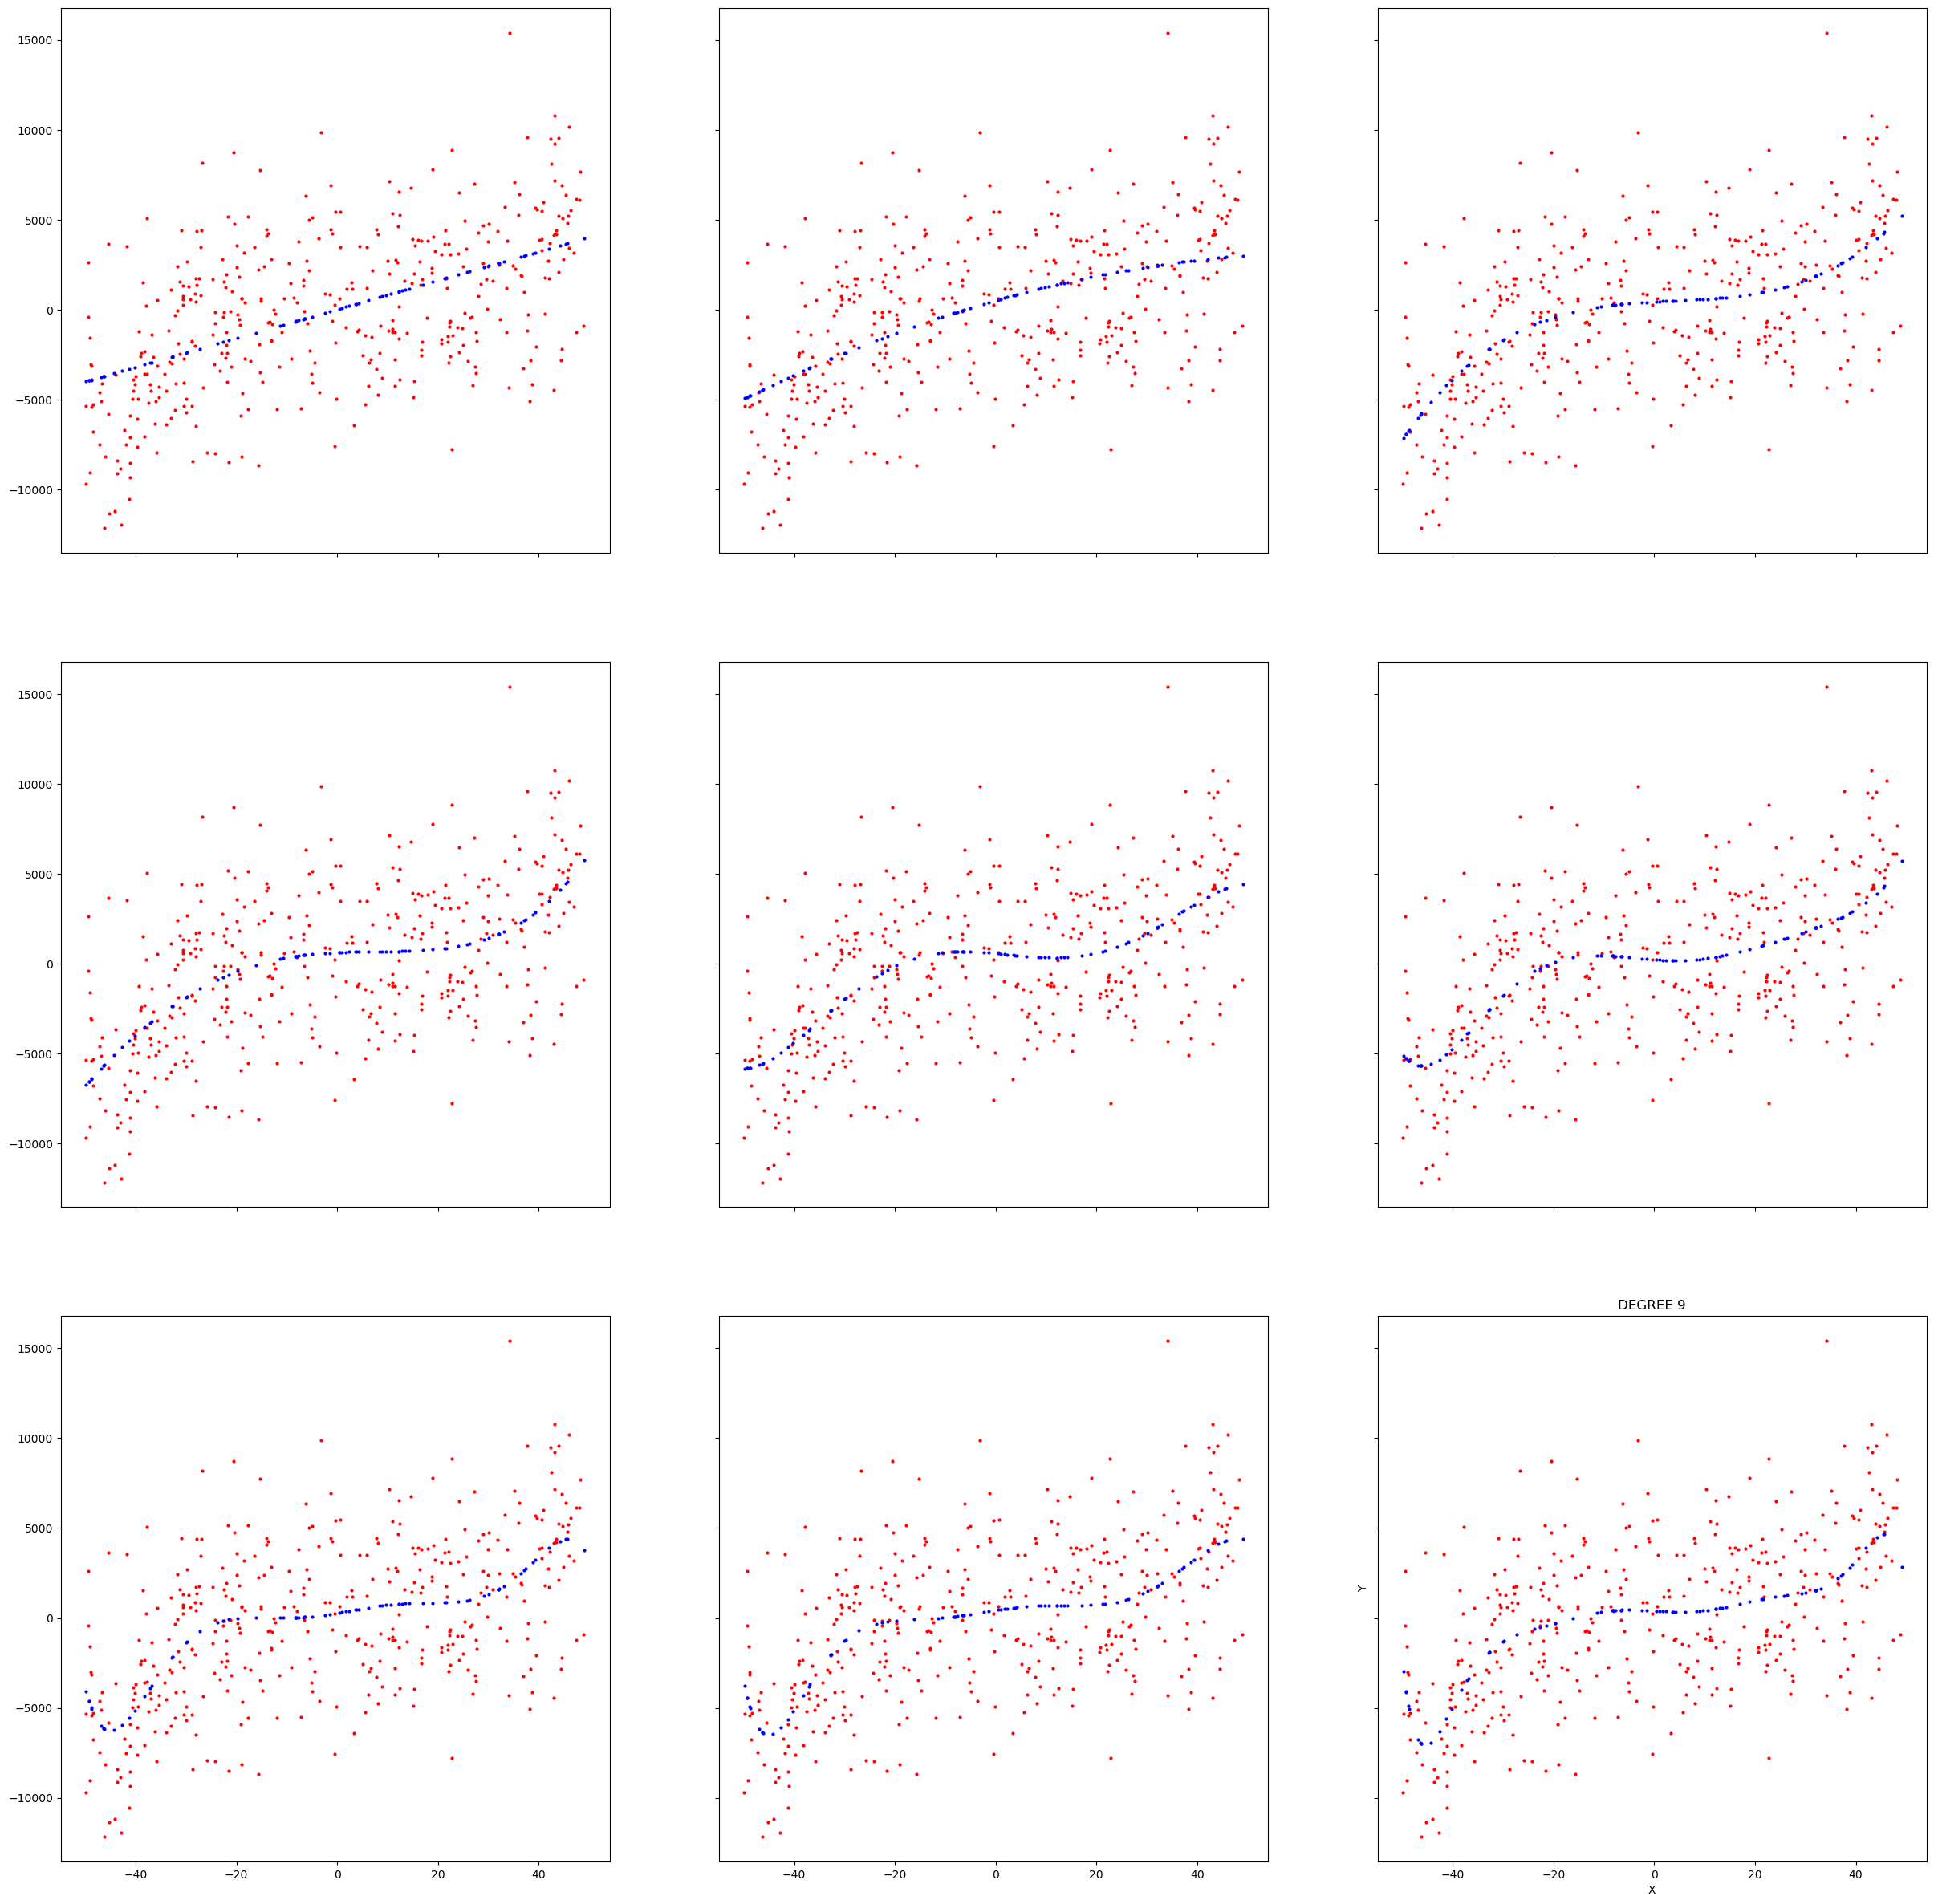

TRAINING SET  16


<Figure size 640x480 with 0 Axes>

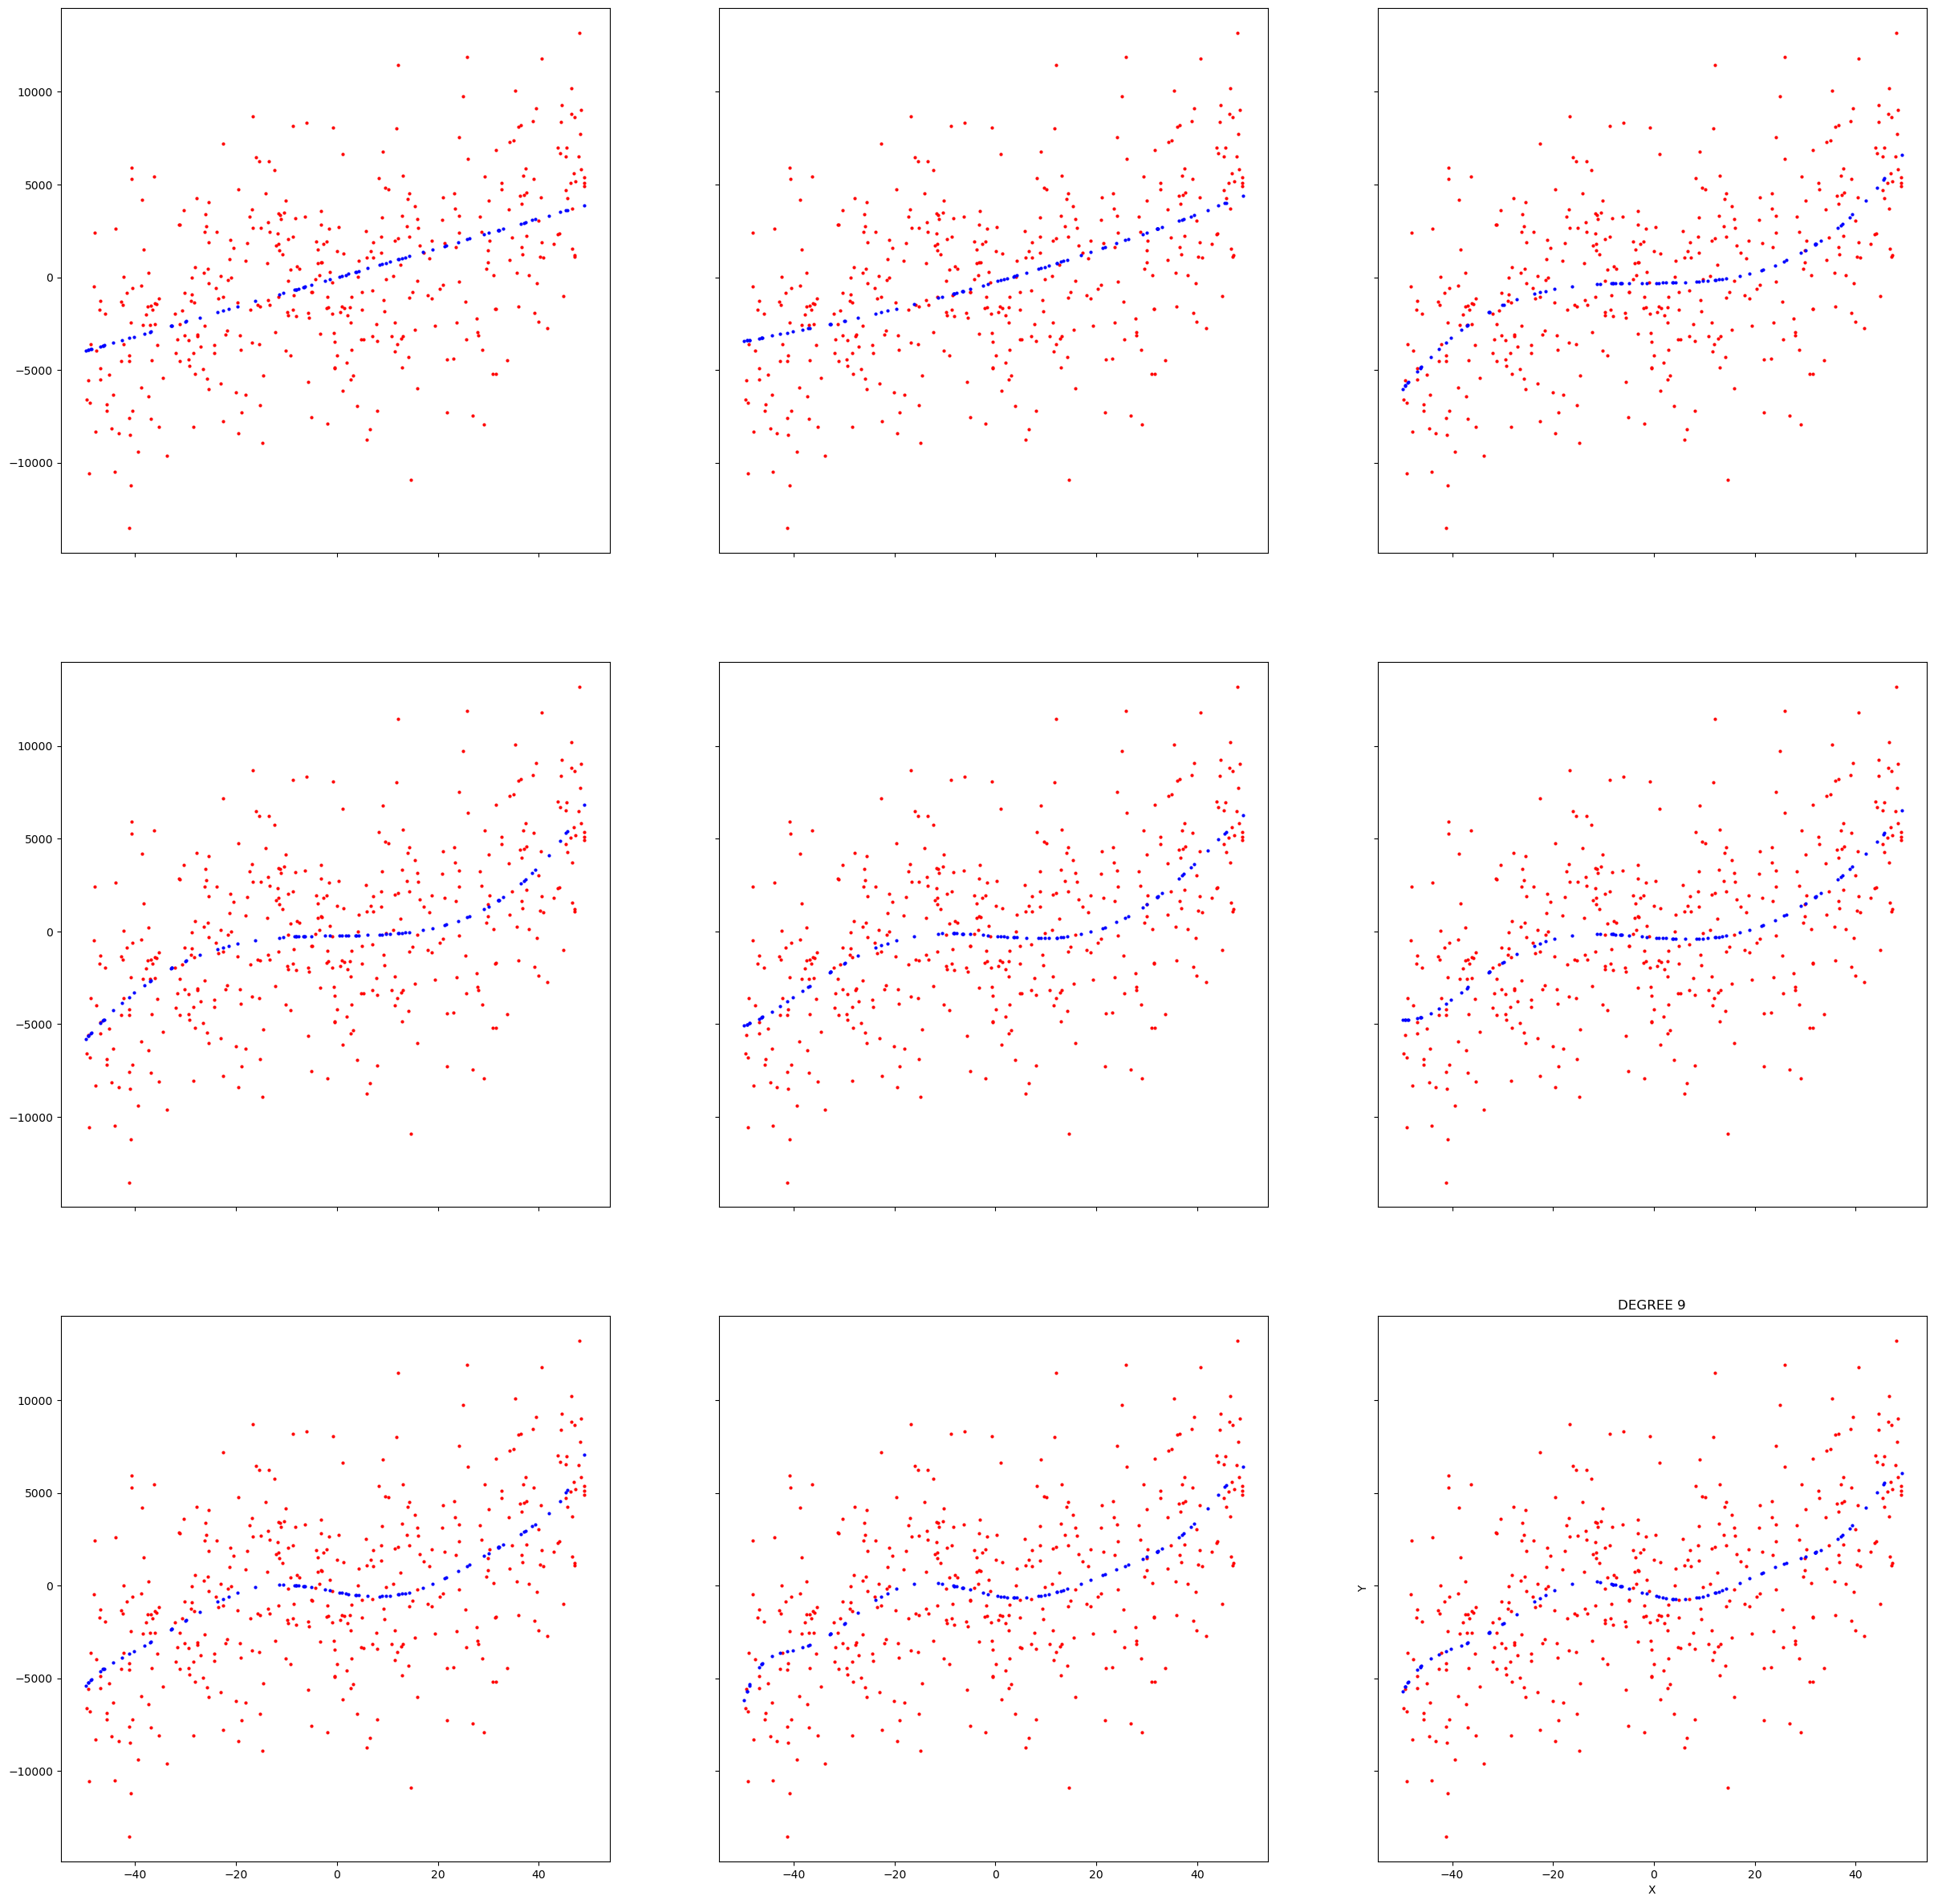

TRAINING SET  17


<Figure size 640x480 with 0 Axes>

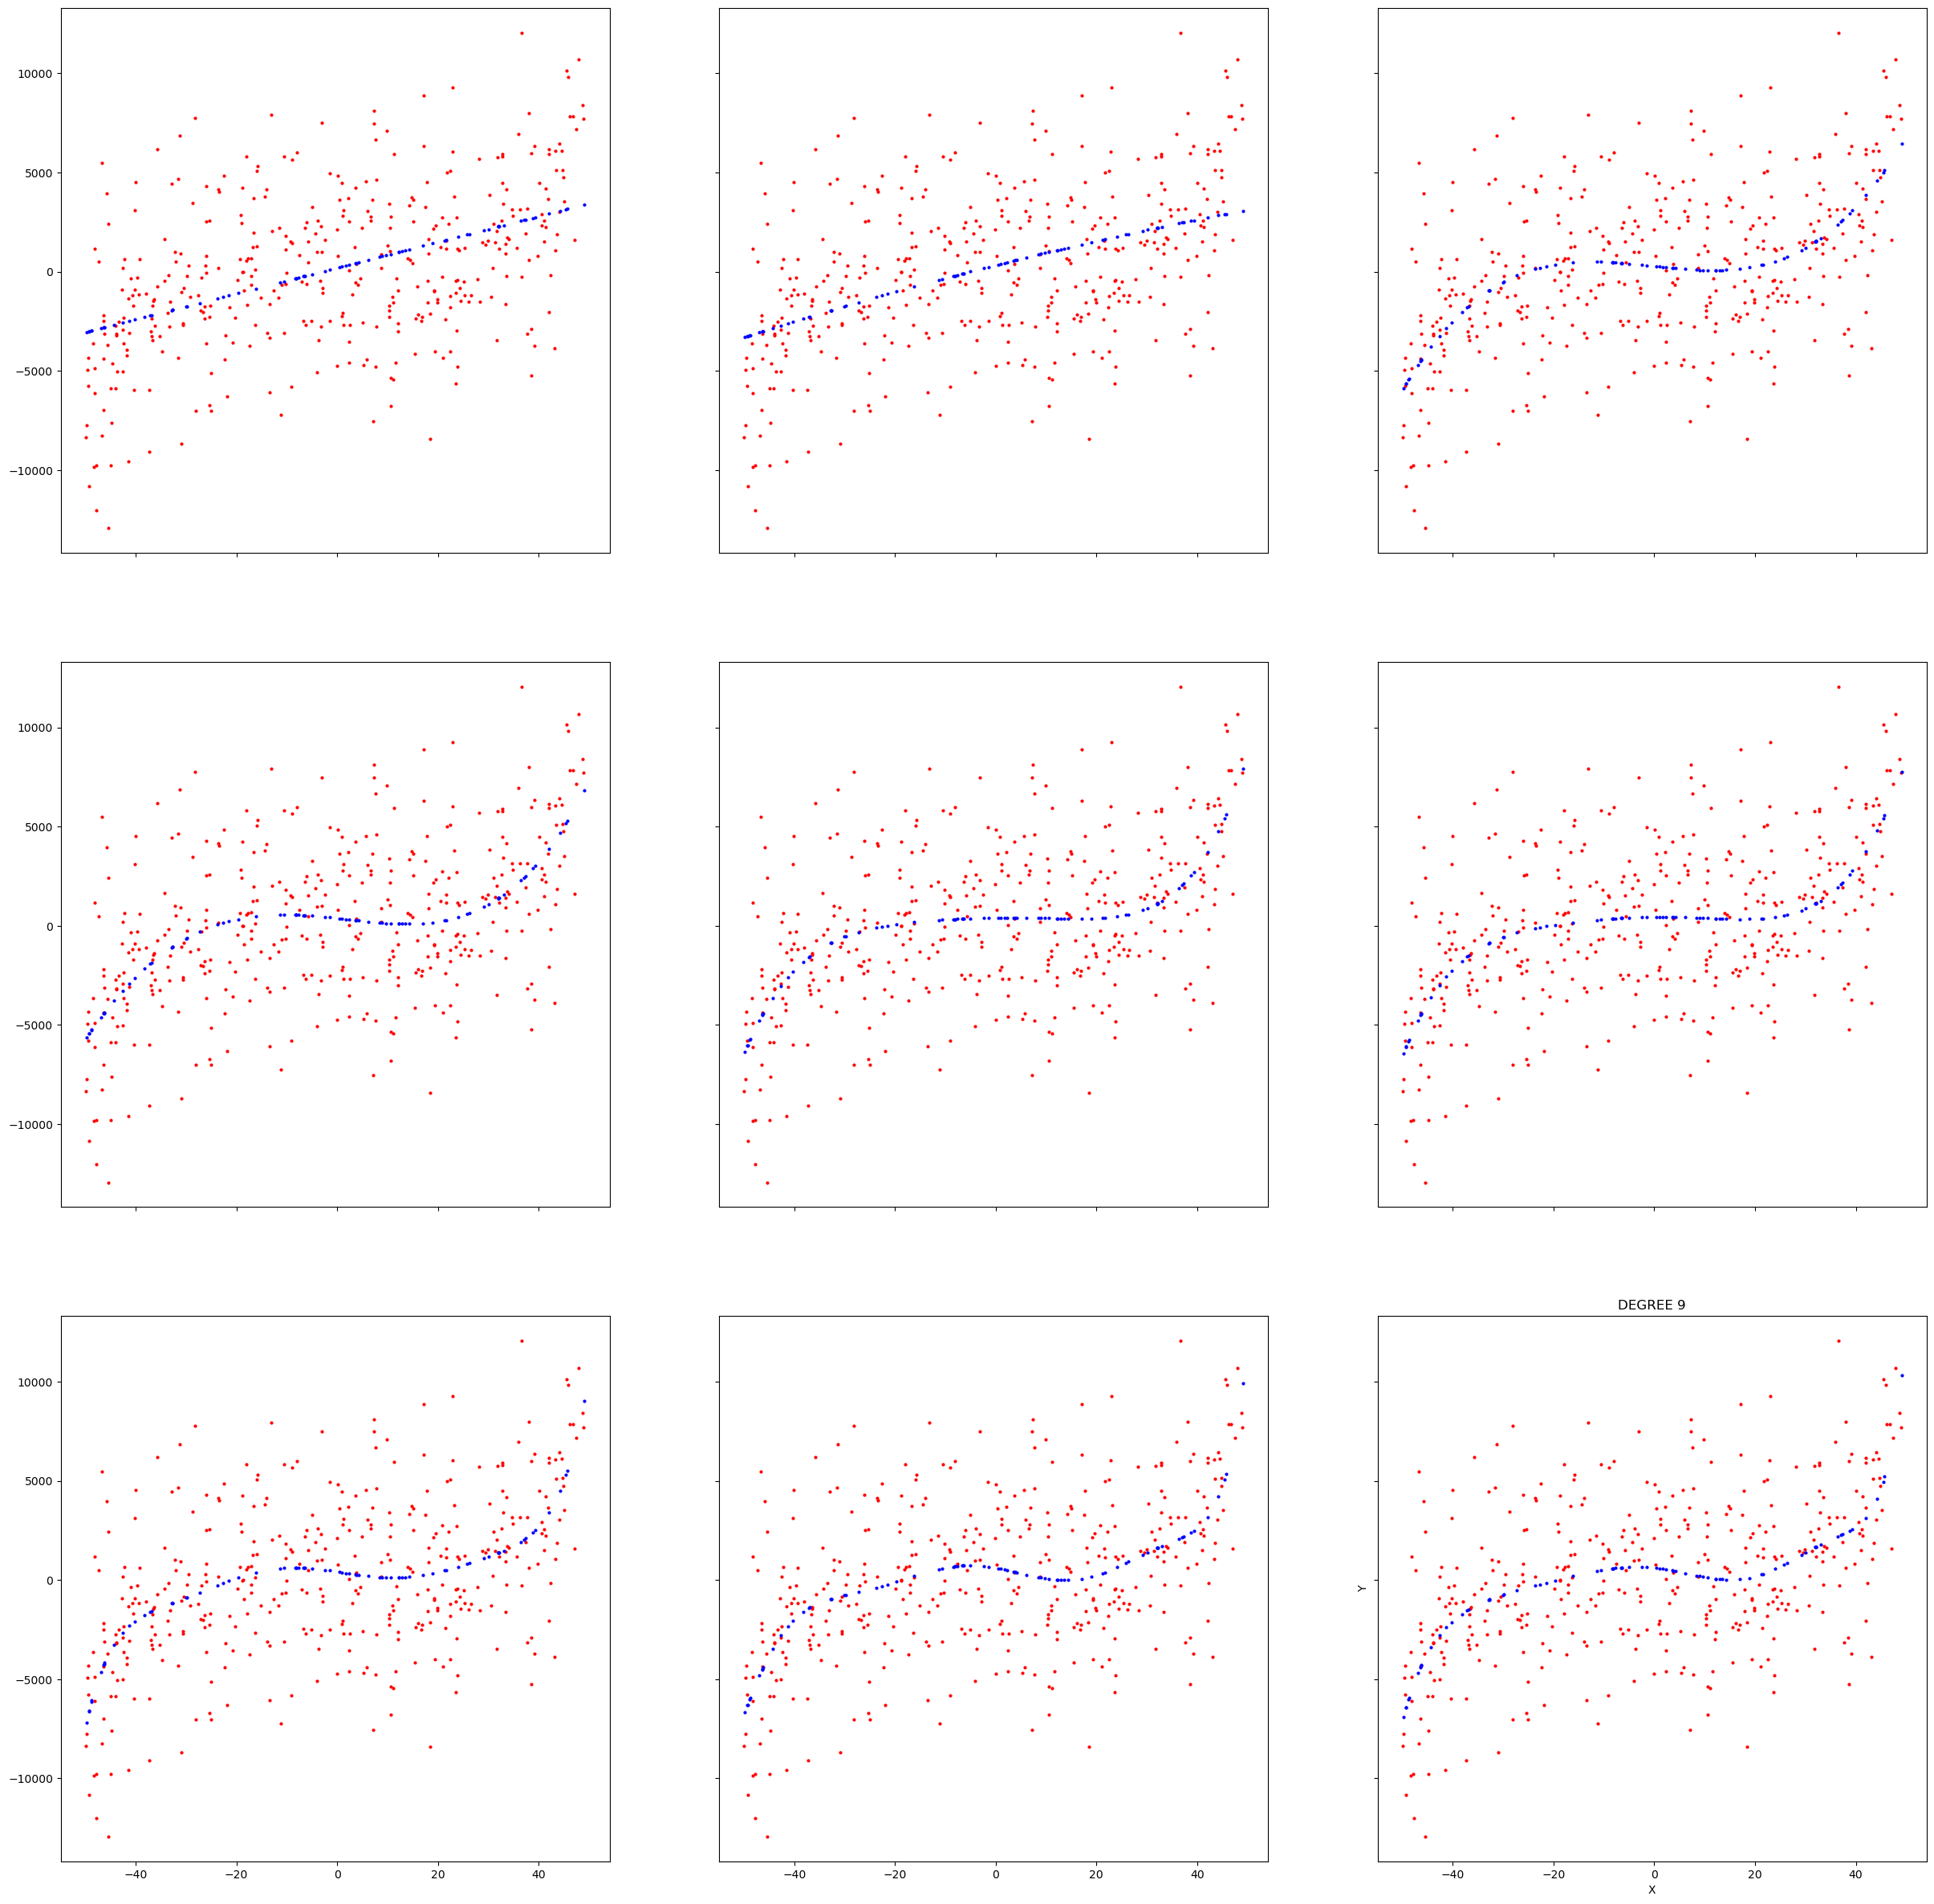

TRAINING SET  18


<Figure size 640x480 with 0 Axes>

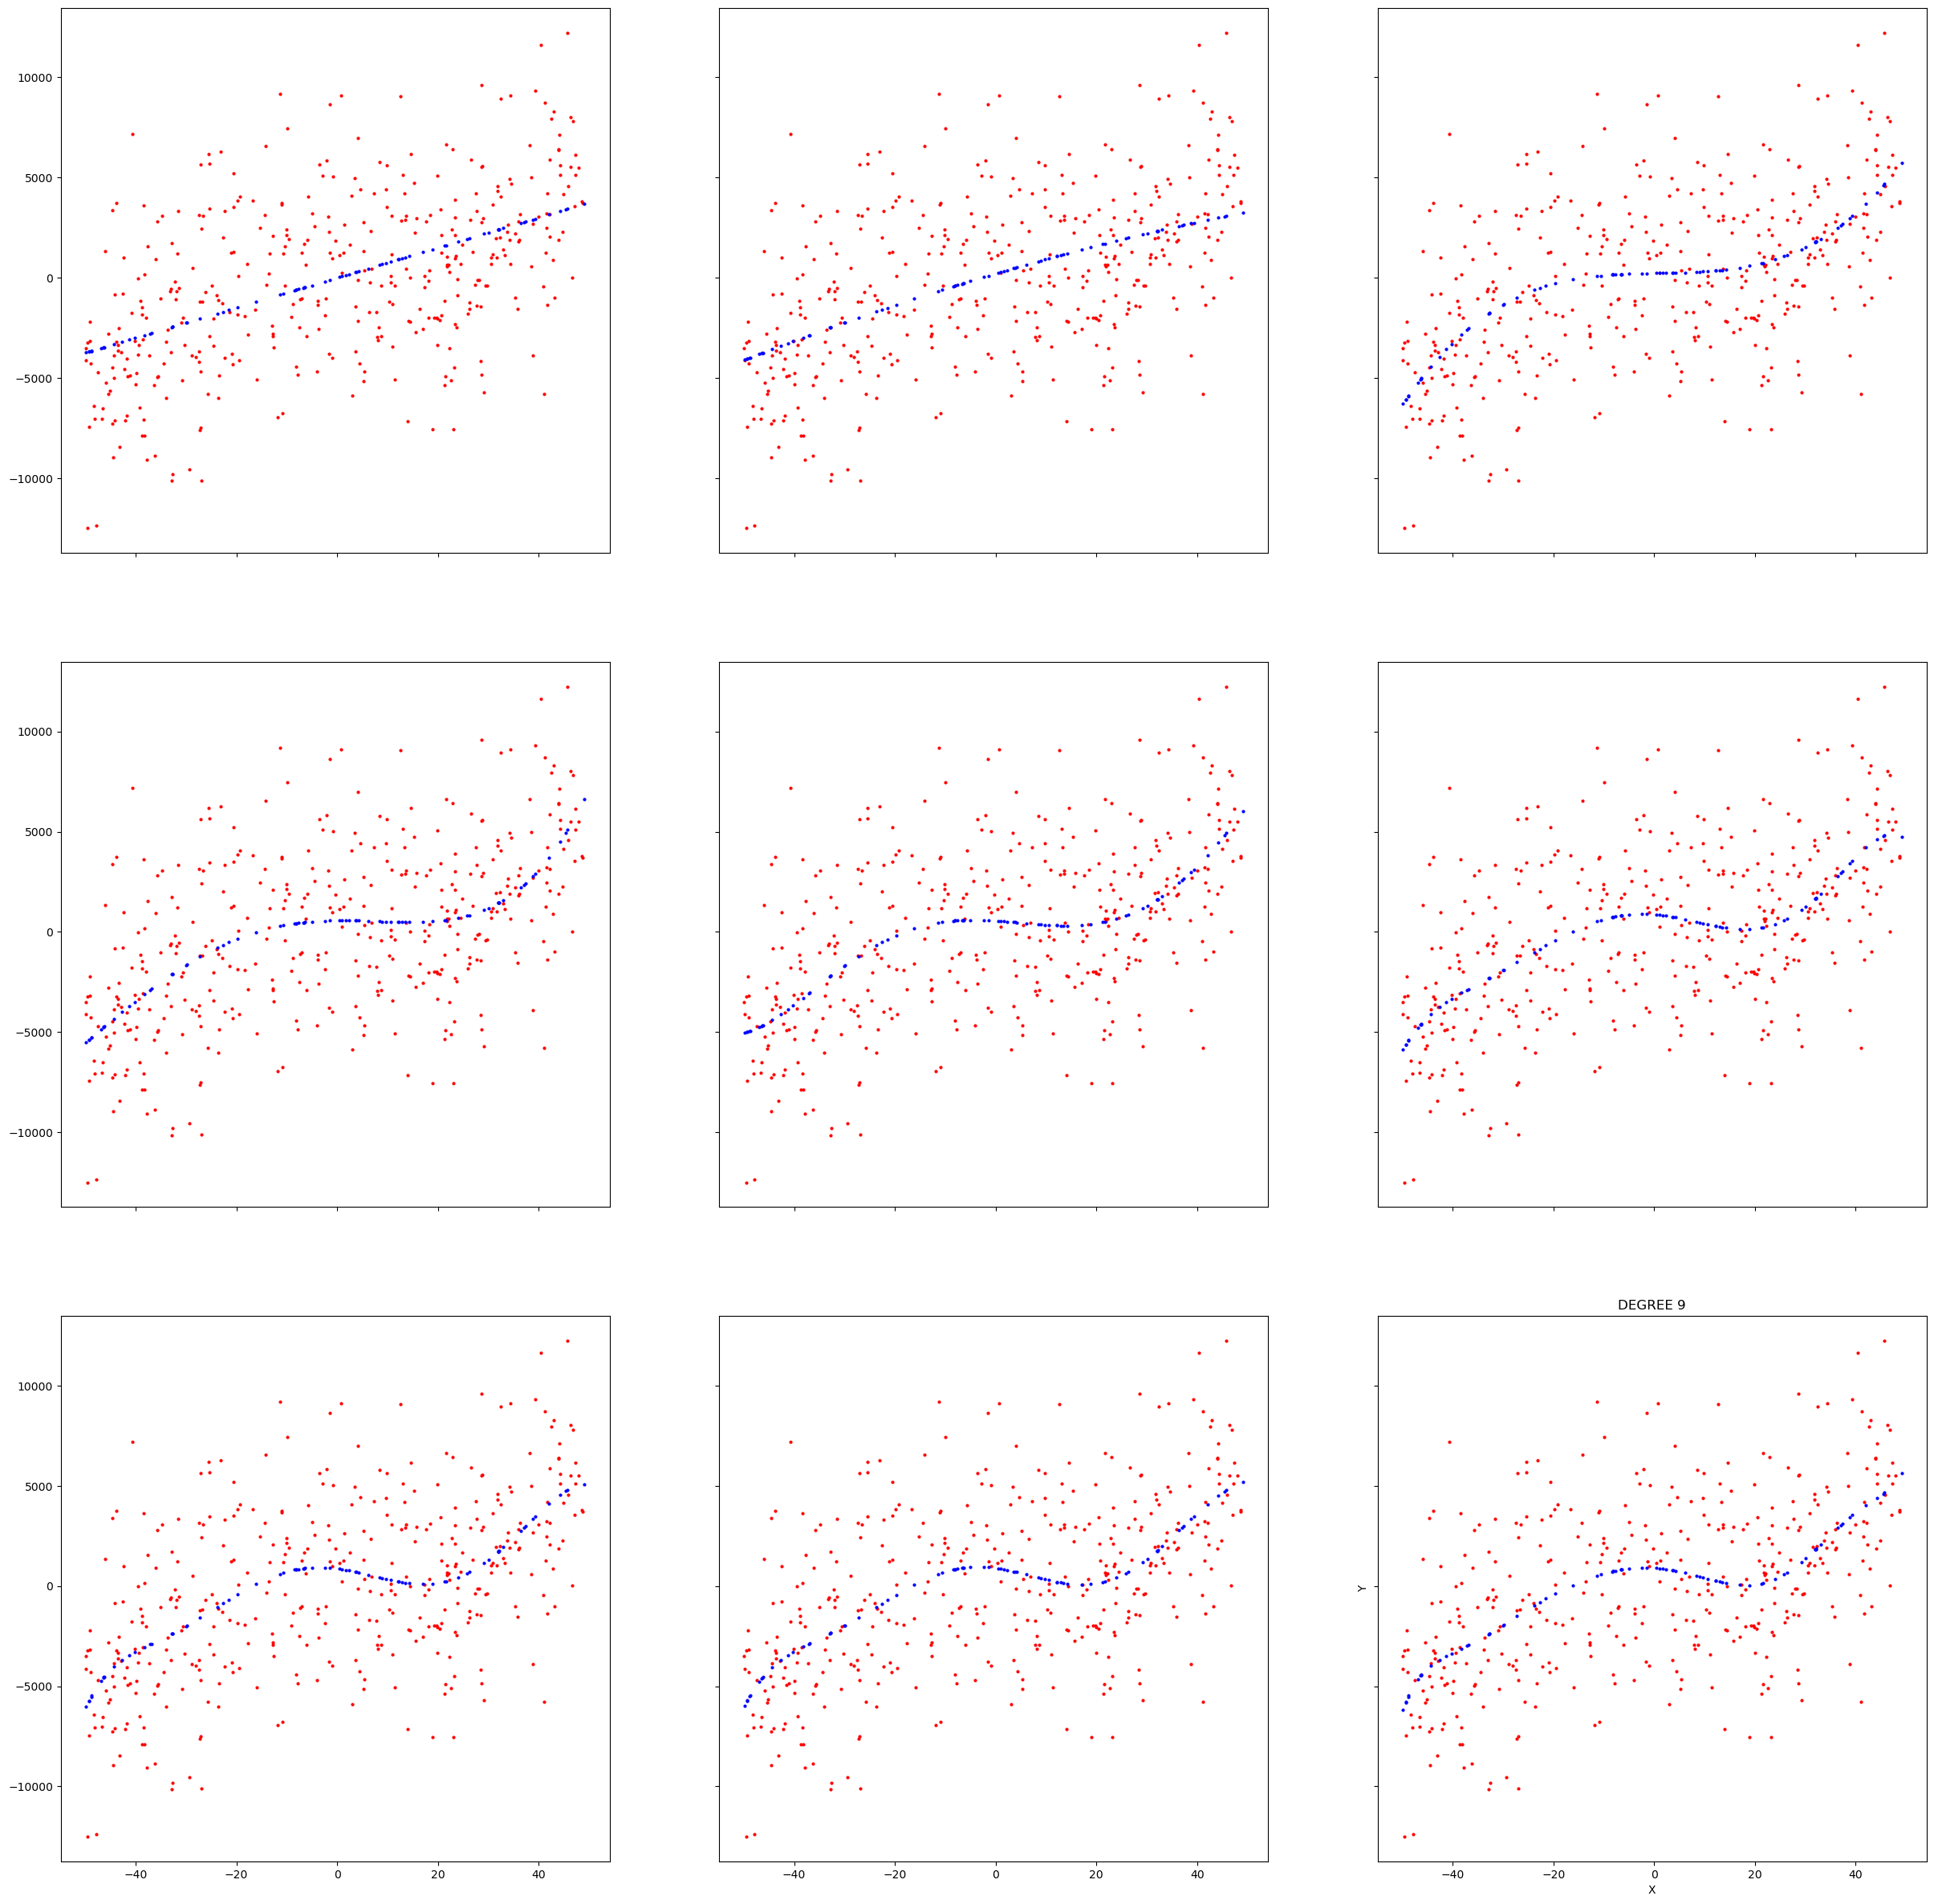

TRAINING SET  19


<Figure size 640x480 with 0 Axes>

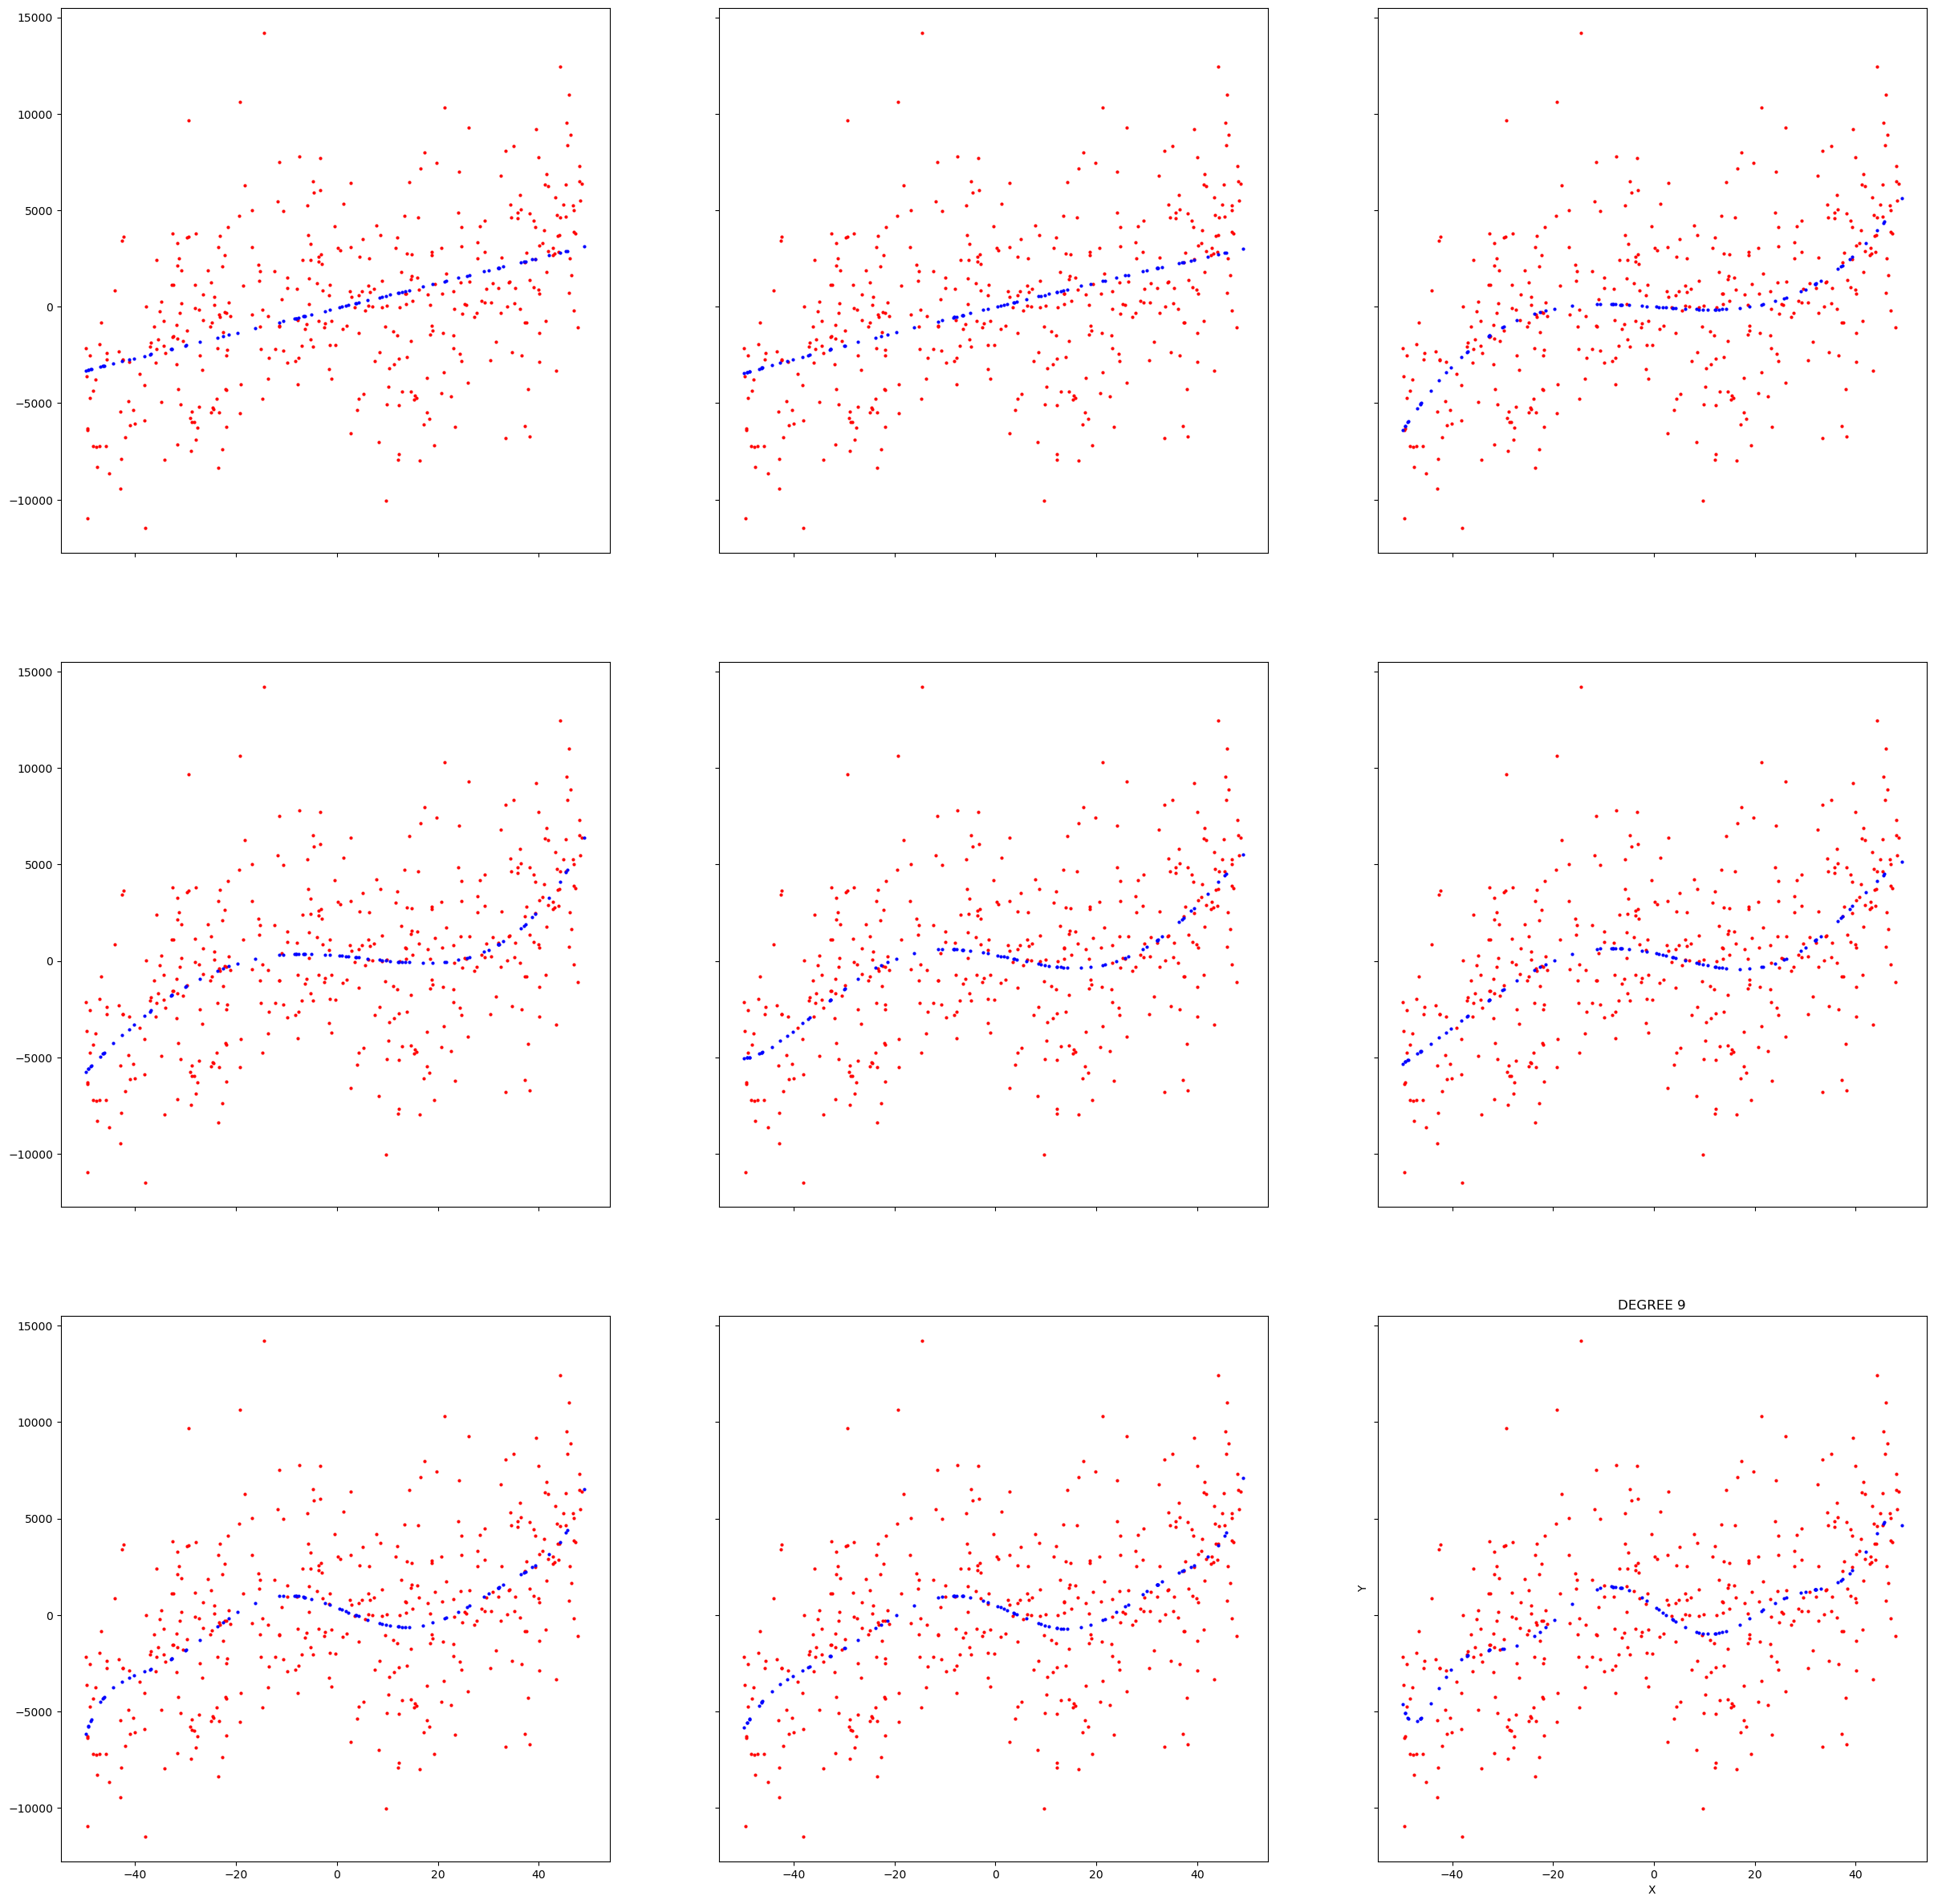

In [30]:
y_predicted = []
for i in range(20):
    print("TRAINING SET ", i)
    f = plt.figure()
    f, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(30, 30))
    x = X_train_data_sets[i][:, np.newaxis]  # transposing it
    y = Y_train_data_sets[i]
    temp = []
    for degree in range(0, 9):
        axes[int(degree/3)][int(degree % 3)].plot(x, y, 'r.', markersize=4)
        #TODO: Create polynomial features of current degree + 1 using PolynomialFeatures function
        poly_features = PolynomialFeatures(degree=degree + 1)
        #TODO: Fit the polynomial features on the current training set using the fit_transform method
        X_train_poly = poly_features.fit_transform(x)
        #TODO: Create a plolynomial regression model using LinearRegression class
        poly_model = LinearRegression()
        #TODO: Fit the model to the current training set
        poly_model.fit(X_train_poly, y)
        #TODO: Predict the value of y for the testing set using the predict method Hint: fit the polynomial features on the xTest[:, numpy.newaxis] then predict the value of y for the polynomial features
        X_test_poly = poly_features.transform(xTest[:, np.newaxis])
        y_test_predict = poly_model.predict(X_test_poly)
        #TODO: append the current prediction to the temp list
        temp.append(y_test_predict)
        axes[int(degree/3)][int(degree % 3)].plot(xTest[:, np.newaxis], y_test_predict, 'b.', markersize=4)
        plt.title("DEGREE "+str(degree+1))
        plt.xlabel("X")
        plt.ylabel("Y")
    #TODO: append the prediction of all 9 models to the y_predicted list Hint: the prediction of all models are saved in temp
    y_predicted.append(temp)
    plt.show()

# STEP 3: CALCULATE THE BIAS AND VARIANCE OF THE MODEL

## Function for calculating the bias and the variance

In [31]:
def find_bias_variance1(order): 
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][order])
    # print(len(y_predicted_part[0]))
    y_predicted_part = np.asarray(y_predicted_part)
    print(y_predicted_part.shape)
    print(yTest.shape)
    #TODO: calculate the bias using np.mean and np.abs
    bias = np.mean(np.abs(y_predicted_part - yTest), axis=1) 
    #TODO: calculate the variance using np.var
    variance = np.var(y_predicted_part, axis=0) 
    return(np.mean(bias), np.mean(variance))
    

In [32]:
#TODO: call the function to calculate the bias and variance for all the degrees of the models
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)

Bias: [847.1870928110623, 843.9506159100089, 290.6671551590056, 337.1888144023968, 377.79216424098433, 418.0494760599634, 440.86203680781557, 482.5703679711496, 497.62125895372594]
Variance: [74599.4784540518, 100503.12083722113, 148983.89625958618, 201219.31167627656, 266225.94714829547, 319399.10348160996, 348141.0049887065, 407636.65714460483, 462380.15414901834]


## Tabulate the values

In [33]:
#TODO: Tabulate the values
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(np.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(np.array(final_table["BIAS^2"])+np.array(variance))
df = pd.DataFrame(final_table)
print(df)

   DEGREE        BIAS         BIAS^2       VARIANCE            MSE
0       1  847.187093  717725.970226   74599.478454  792325.448680
1       2  843.950616  712252.642095  100503.120837  812755.762932
2       3  290.667155   84487.395088  148983.896260  233471.291348
3       4  337.188814  113696.296558  201219.311676  314915.608234
4       5  377.792164  142726.919362  266225.947148  408952.866510
5       6  418.049476  174765.364434  319399.103482  494164.467916
6       7  440.862037  194359.335498  348141.004989  542500.340487
7       8  482.570368  232874.160044  407636.657145  640510.817188
8       9  497.621259  247626.917363  462380.154149  710007.071512


## Plot the bias-variance tradeoff

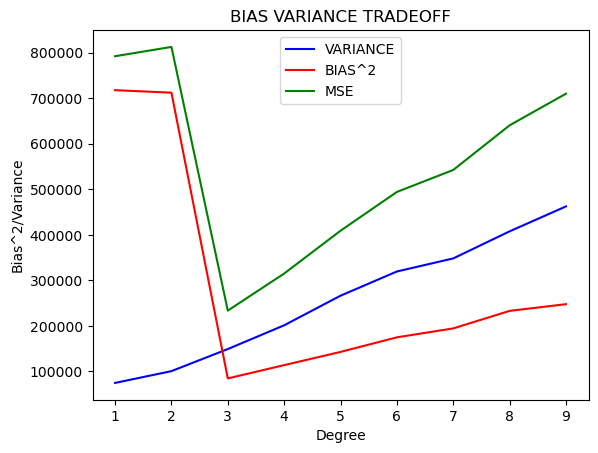

In [34]:
#TODO: Plot the bias^2, variance, and MSE 
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()

# FITTING THE TRAINED MODEL TO THE TESTING DATASET FOR DISPLAYING THE LINE OF BEST FIT

<Figure size 640x480 with 0 Axes>

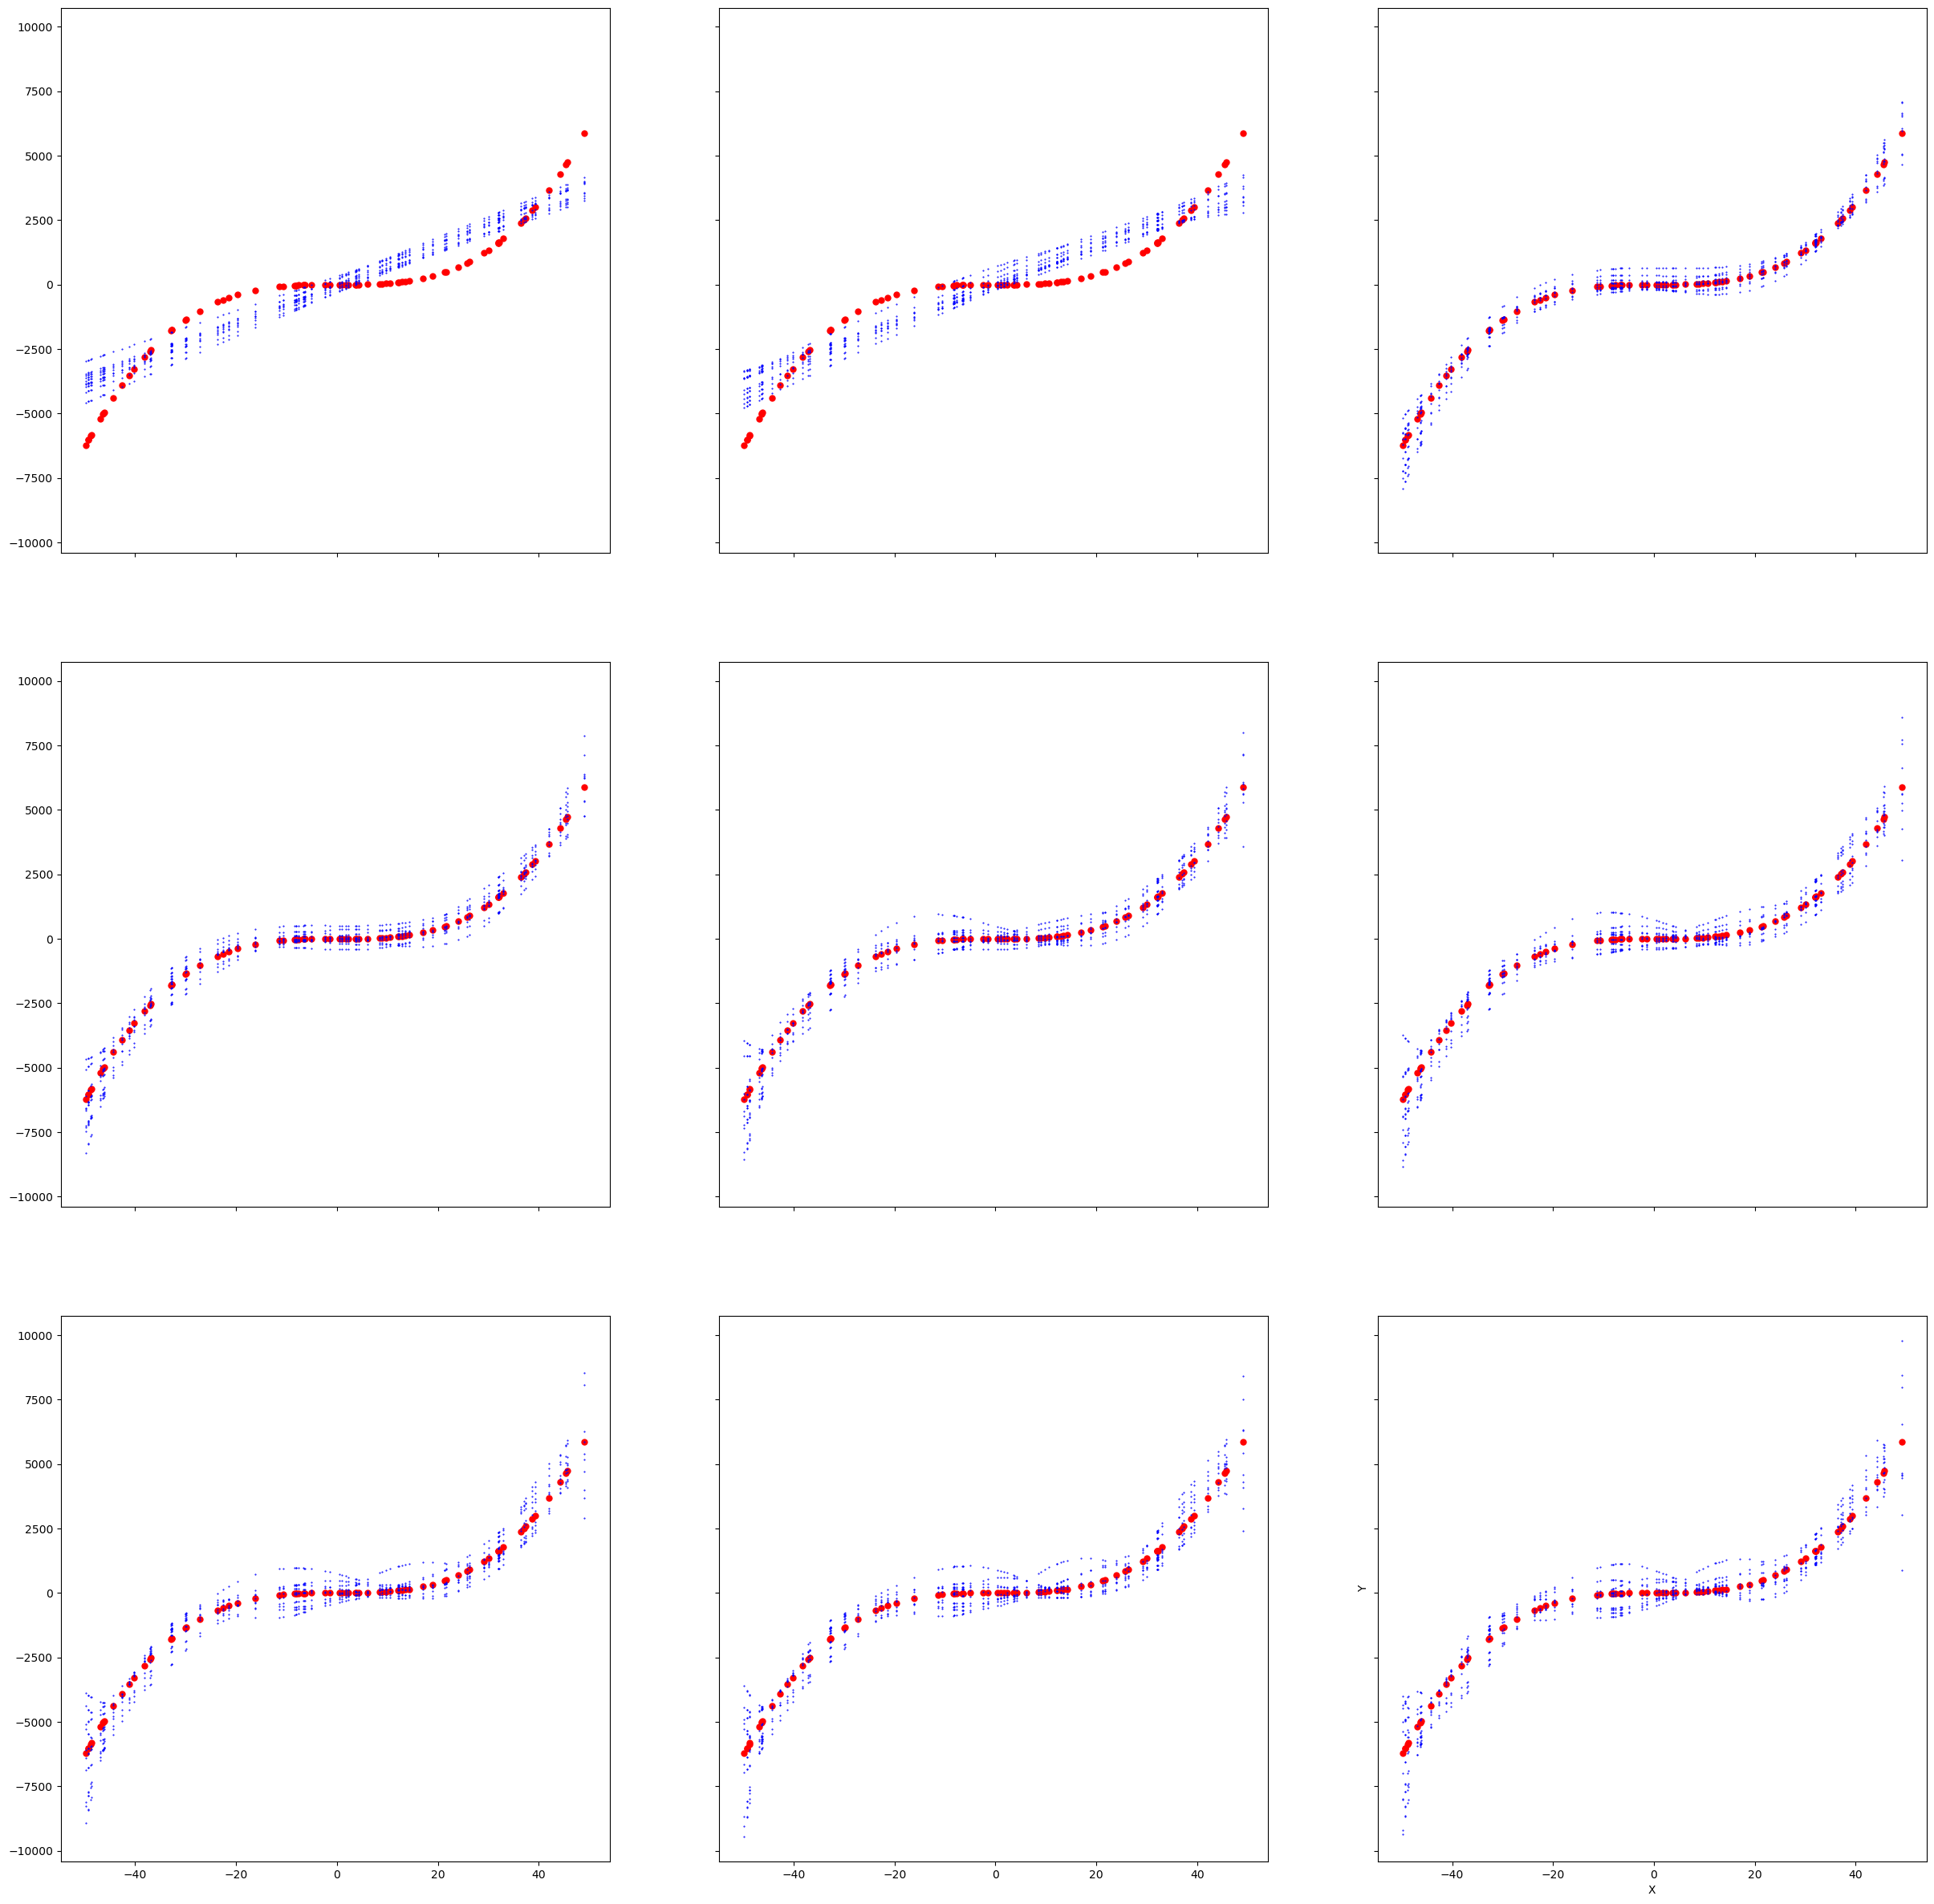

In [35]:
#TODO: Plot the fitting function of all models for the 20 datasets
f = plt.figure()
f, axes = plt.subplots(nrows = 3, ncols = 3, sharex=True, sharey = True,figsize=(30,30))
for degree in range(0,9):
    xtemp=np.concatenate([xTest for i in range(10)])
    y_predicted_part=[]
    for i in range(10):
        #TODO Append the prediction of the model with the current degree for each dataset to y_predicted_part
        y_predicted_part.append(y_predicted[i][degree])
    ytemp=np.array(y_predicted_part).reshape(-1)
    axes[int((degree)/3)][int((degree)%3)].plot(xTest, yTest, 'r.',markersize=10)
    axes[int((degree)/3)][int((degree)%3)].plot(xtemp, ytemp,'b.',markersize=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [51]:
y1 = np.array([[1, 2 ,3],[4,5,6],[7,8,9],[10,11,12]])
y2 = np.array([[1,2,3]])
print(y1.shape)
print(y2.shape)
b = np.mean(np.abs(y1 - y2), axis=1)
print(b.shape)

(4, 3)
(1, 3)
(4,)
